In [1]:
library(regclass)
library(ppcor)
library(tseries)

Loading required package: bestglm

Loading required package: leaps

Loading required package: VGAM

Loading required package: stats4

Loading required package: splines

Loading required package: rpart

Loading required package: randomForest

randomForest 4.7-1

Type rfNews() to see new features/changes/bug fixes.

Important regclass change from 1.3:
All functions that had a . in the name now have an _
all.correlations -> all_correlations, cor.demo -> cor_demo, etc.


Loading required package: MASS

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [2]:
data <- read.csv("./dataset_tsmc2014.num_colo.csv")
data <- data[1:288,-1]

In [3]:
head(data)

Convention.Center Electronics Factory Food...Snack General.Education.Place
1 3                  7          1       61           6                      
2 1                  4          1       75           4                      
3 2                  4          0       76           2                      
4 1                  7          0       87           6                      
5 1                  7          0       77           1                      
6 2                 17          1       68           6                      
  History..Museum...Arts Hotel Indoor.Entertainment Medical.Related.Place
1 29                     19    234                  19                   
2 25                     19    211                  24                   
3 26                     22    185                  20                   
4 18                     19    199                  22                   
5 22                     26    198                  17                   
6 23                     20    151                  13                   
  Neighborhood ⋯ Place.for.Sports Residence Rest.Area Restaurant School
1 22           ⋯ 107              107       0         314        25    
2 33           ⋯  85               97       0         289        20    
3 30           ⋯  62               92       0         292        17    
4 32           ⋯  66               99       1         282        20    
5 26           ⋯  78               93       0         248        22    
6 26           ⋯  82               86       0         260        19    
  Smoke.Shop Store..Market...Fair Transportation Travel.Related.Place
1 0          28                   124            5                   
2 1          24                   122            4                   
3 3          23                   102            3                   
4 9          25                   111            1                   
5 9          23                   111            2                   
6 7          19                    93            3                   
  Vehicle.Related.Place
1  5                   
2 11                   
3 12                   
4 14                   
5  9                   
6  5

In [4]:
vw <- data[1:288,1]

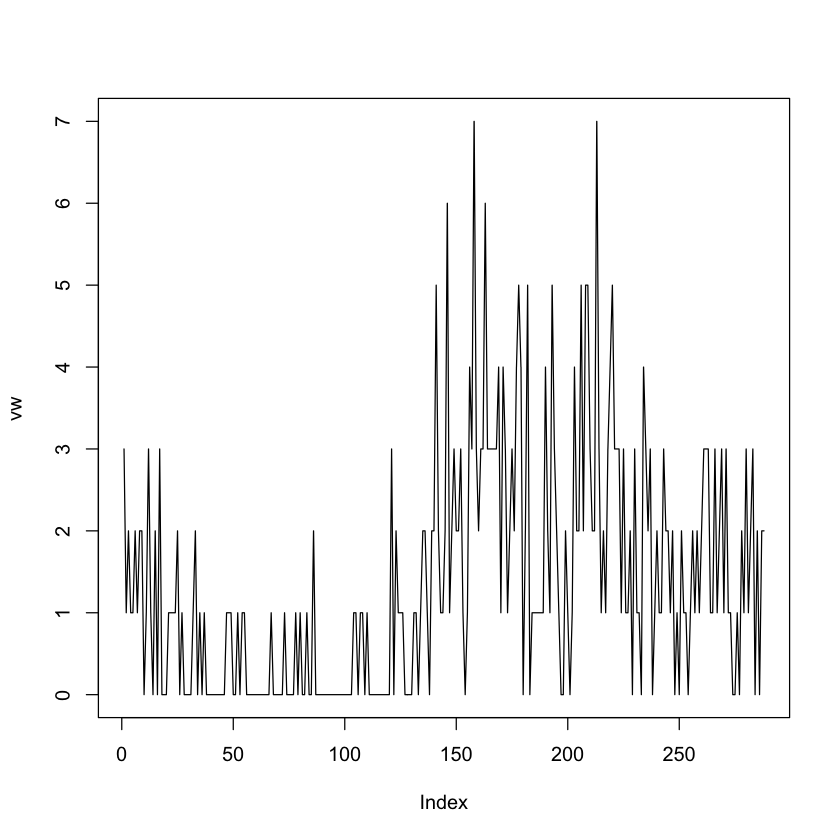

In [5]:
plot(vw,type = "l")

In [6]:
z <- diff(vw)

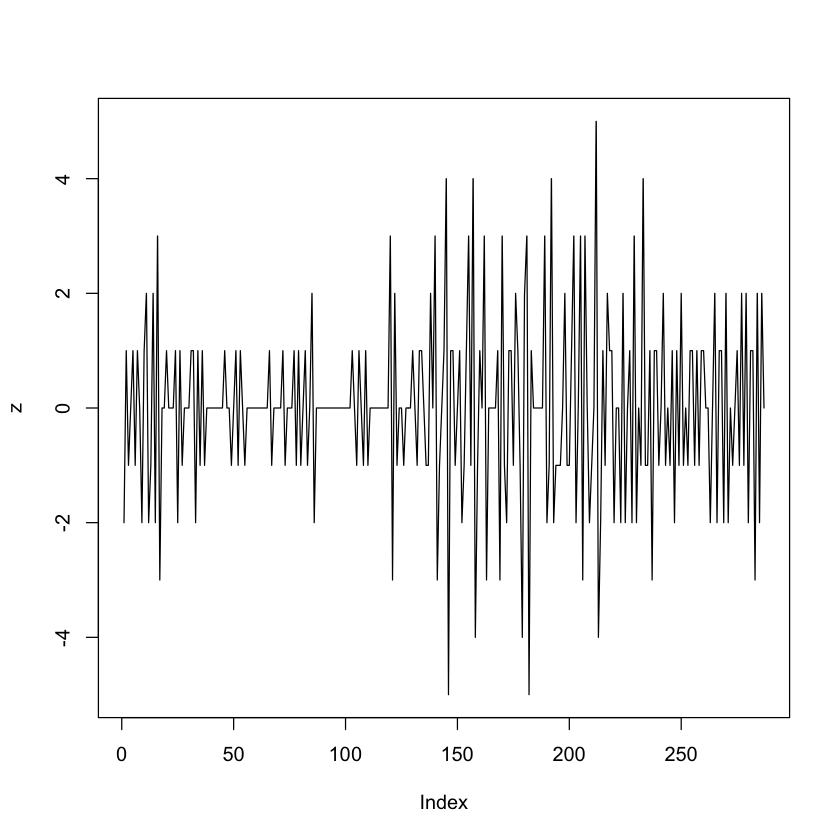

In [7]:
plot(z,type = "l")

In [8]:
adf.test(vw)


	Augmented Dickey-Fuller Test

data:  vw
Dickey-Fuller = -3.4132, Lag order = 6, p-value = 0.05257
alternative hypothesis: stationary


In [9]:
adf.test(z)

Warning message in adf.test(z):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  z
Dickey-Fuller = -8.5416, Lag order = 6, p-value = 0.01
alternative hypothesis: stationary


In [2]:
# return the R squared value of guo ~ guo_history + yin_history
self_autoregression <- function(x,y,lags){
    n <- length(x)
    x_hist <- x[1:(n-lags)]
    y_hist <- y[1:(n-lags)]
    Y <- y[(lags+1):n]
    m <- lm(Y~x_hist+y_hist+0)
    return (summary(m)$r.squared)
}

# select best time lags
select_time_lags <- function(z,thres = 0.1){
    pacf = pacf(z,20)
    for (i in c(1:20)){
        if (abs(pacf$acf[i])<=thres){
            return (i)
        }
    }
    return (-1)
}

# a helper function to remove an element with certain value from a list
remove <- function(arr,value){
    for(i in c(1:length(arr))){
        if(arr[i]==value){
            r_arr <- arr[-i]
            return (r_arr)
        }
    }
    print("remove failure")
    cat(arr," ",value,"\n")
    return (arr)
}

filter_cause <- function(X,y, thres = 0.1){
    n <- dim(X)[2]
    lags <- c()
    R_squared = c()
    for (i in c(1:n)){
        lag = select_time_lags(X[,i])
        r_sq <- self_autoregression(X[,i],y,lag)
        R_squared = append(R_squared,c(r_sq))
    }

    cause_indices <- c()
    remain <- c(1:n)
    while(length(remain)>0){
        
        j <- which.max(R_squared)
        cause_indices <- append(cause_indices,c(j))
        remain <- remove(remain,j)
        R_squared[j] <- 0
        
        # pruning
        to_remove <- c()
        for(i in remain){
            df <- data.frame(x=X[,j],y=y,z=X[,i])
            pcor <- pcor(df)$estimate[2,3]
            
            if(abs(pcor)<=thres){
                #cat(i," ",pcor,"\n")
                to_remove <- append(to_remove,c(i))
                R_squared[i] <- 0
            }
        }
        for(rm in to_remove){
            remain <- remove(remain,rm)
        }
    }
    return (cause_indices)
}

In [32]:
patterns = c('Convention Center', 'Electronics', 'Factory', 'Food & Snack', 'General Education Place', 'History, Museum & Arts', 'Hotel', 'Indoor Entertainment', 'Medical-Related Place', 'Neighborhood', 'Office', 'Outdoor Entertainment', 'Place for Sports', 'Residence', 'Rest Area', 'Restaurant', 'School', 'Smoke Shop', 'Store, Market & Fair', 'Transportation', 'Travel-Related Place', 'Vehicle-Related Place')

Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”


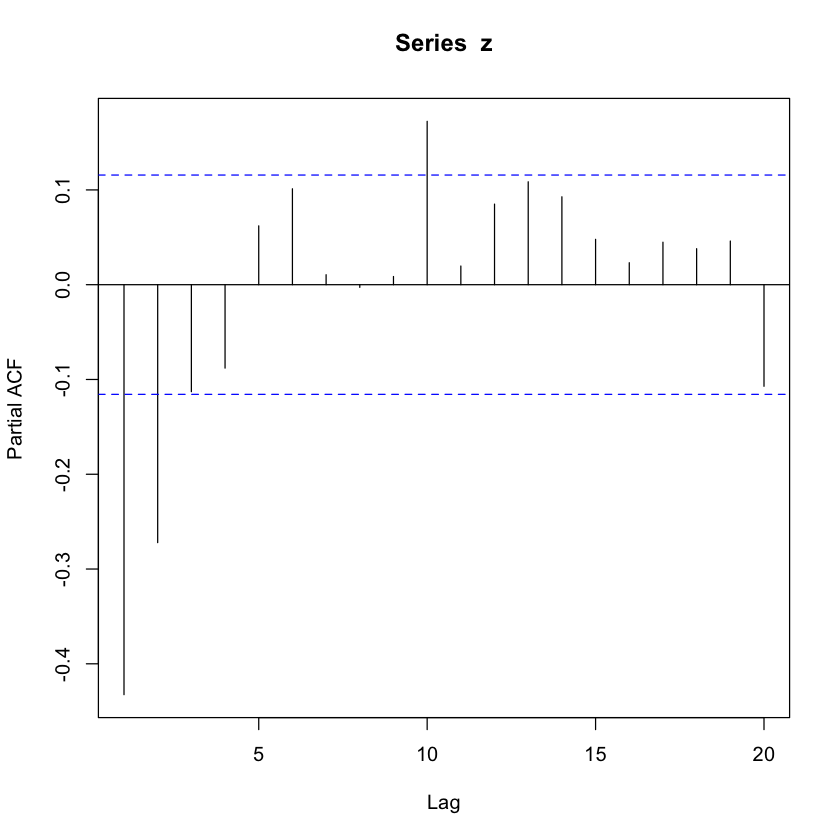

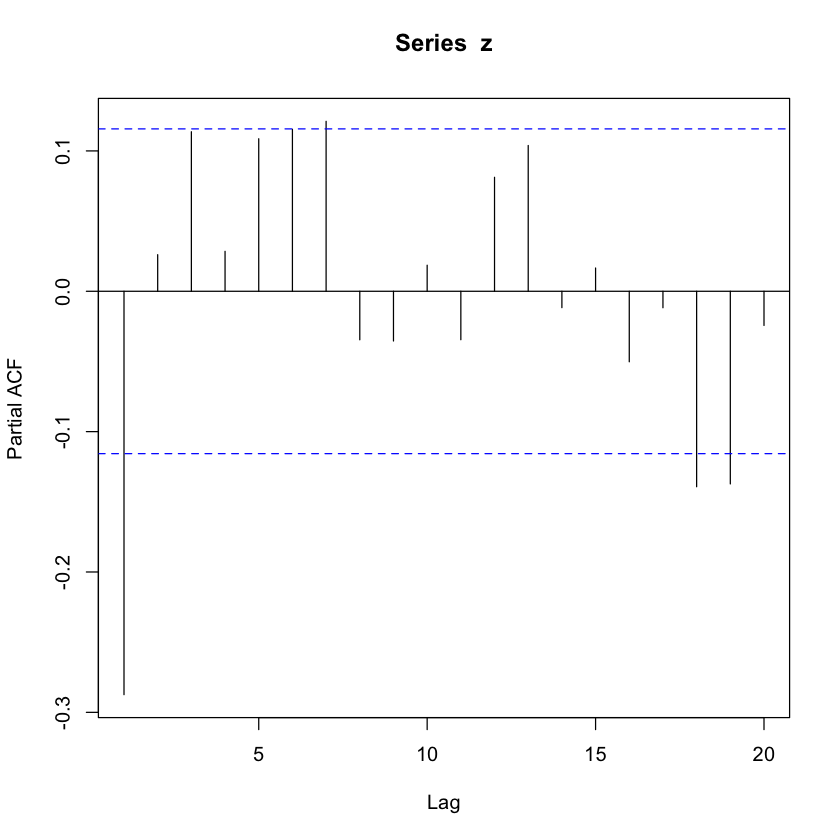

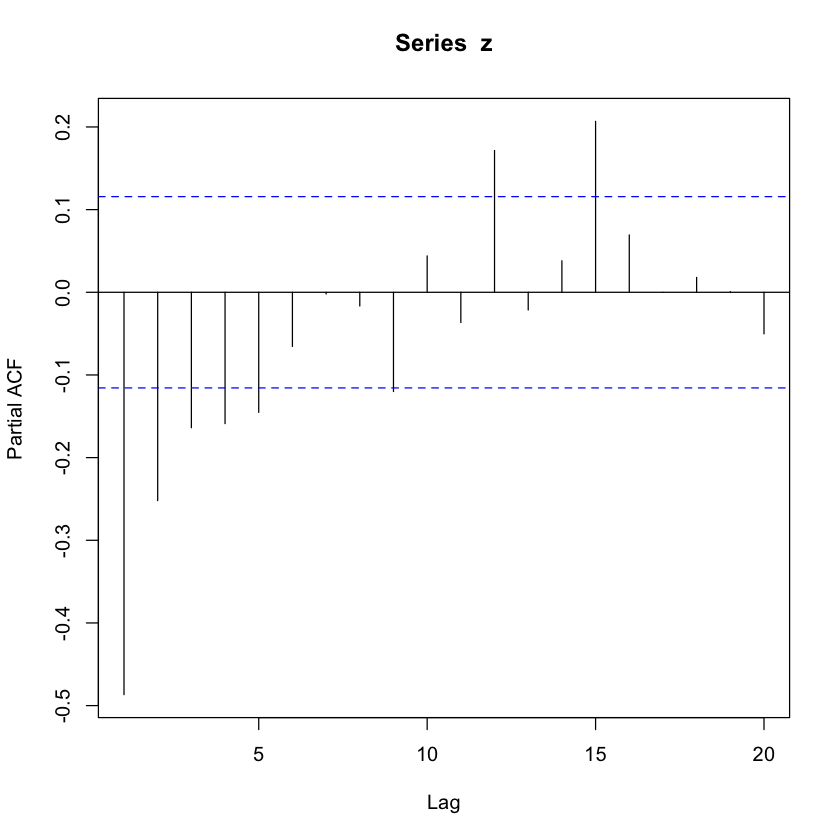

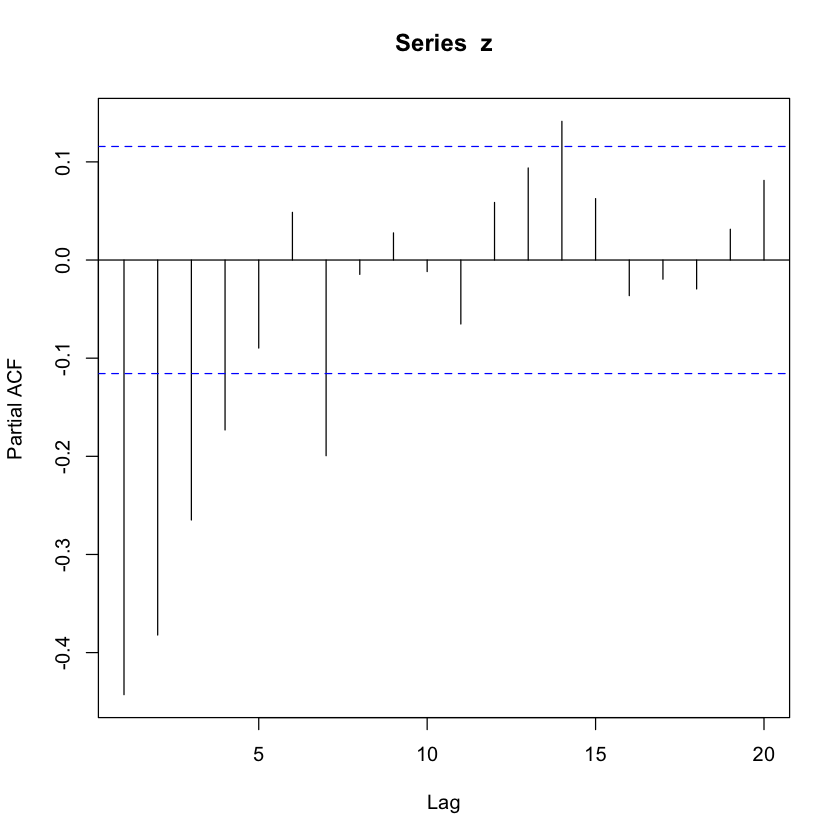

[1] "Convention Center 2 3"


Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”


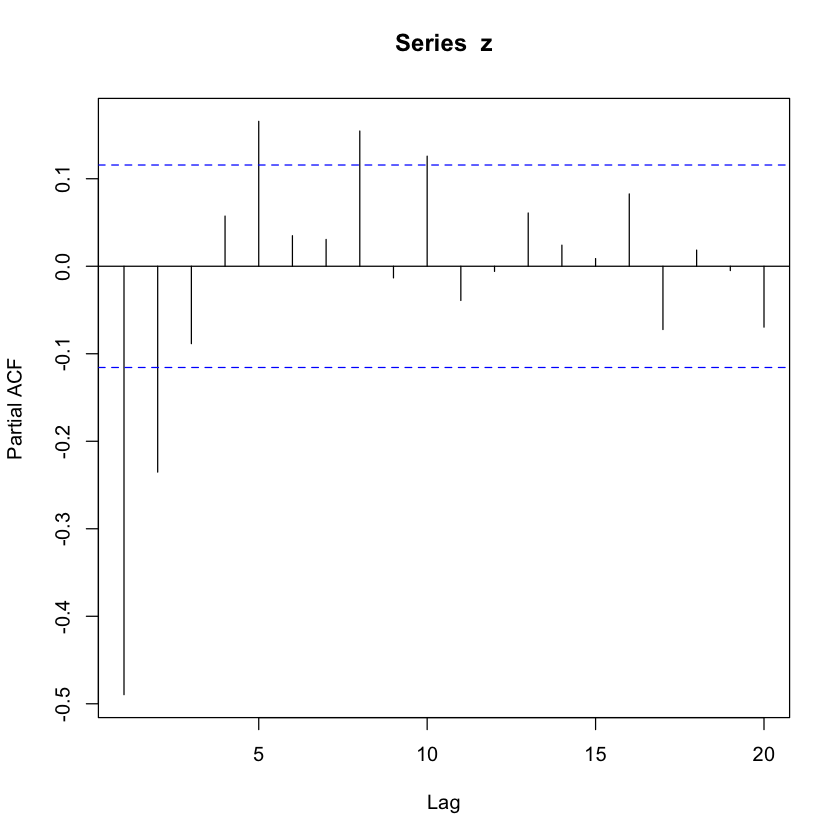

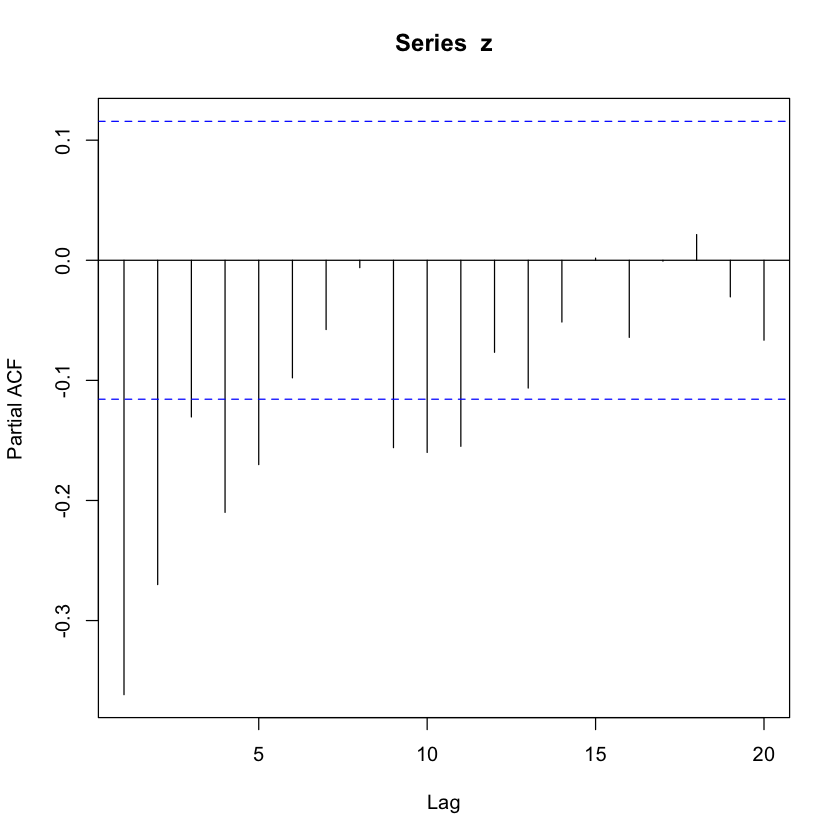

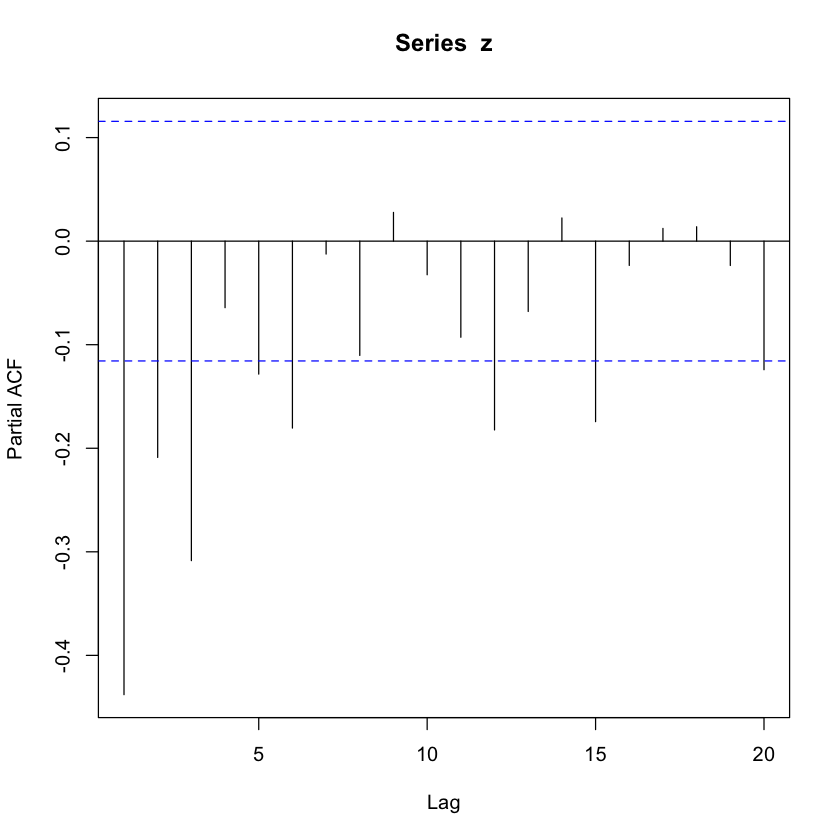

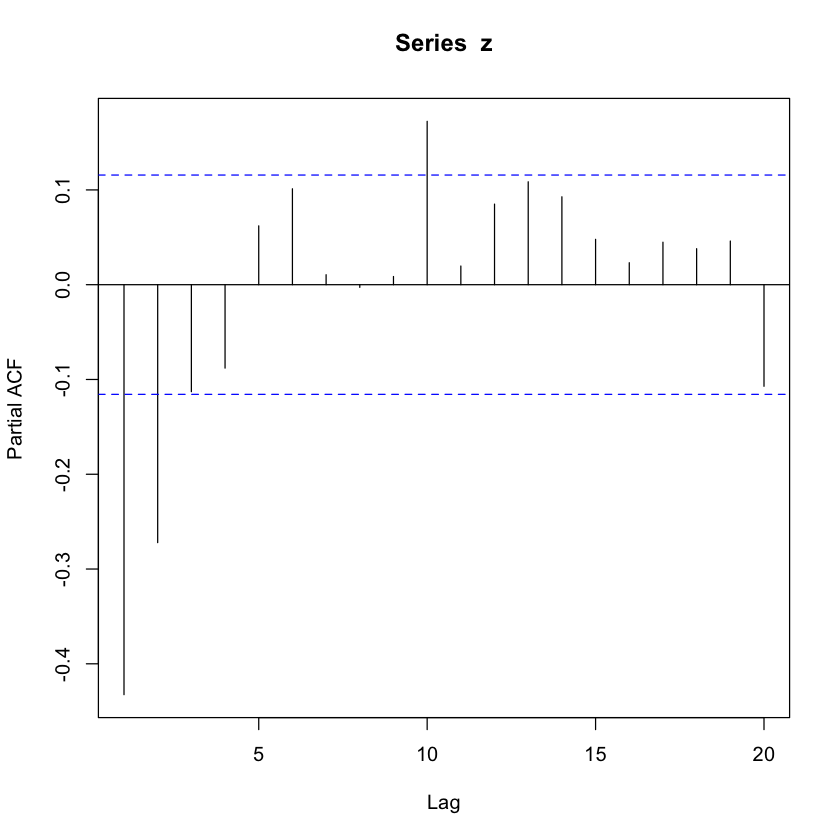

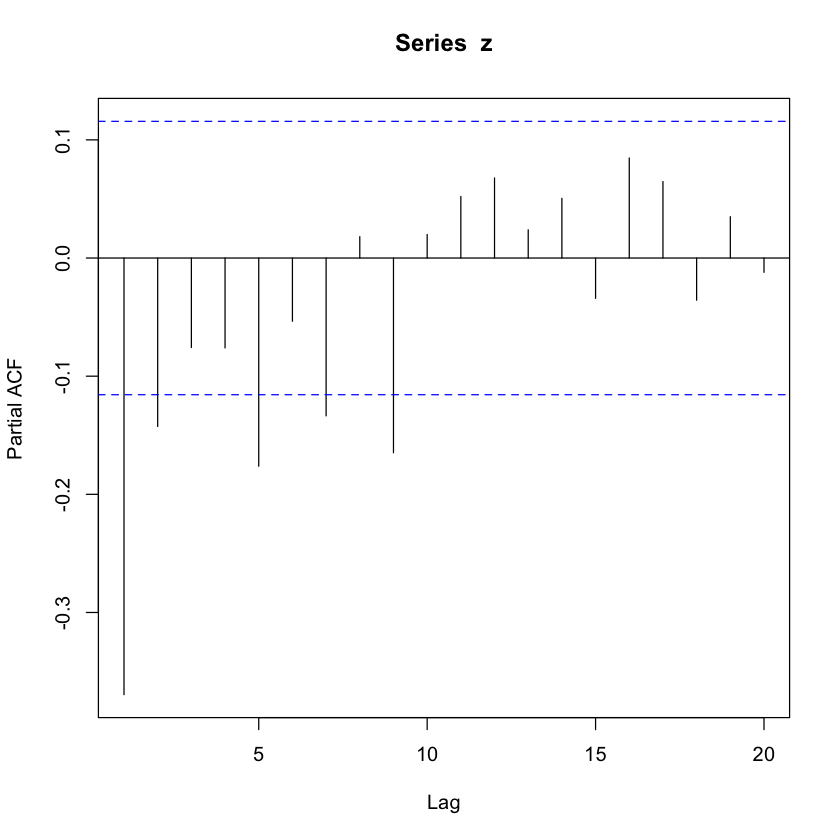

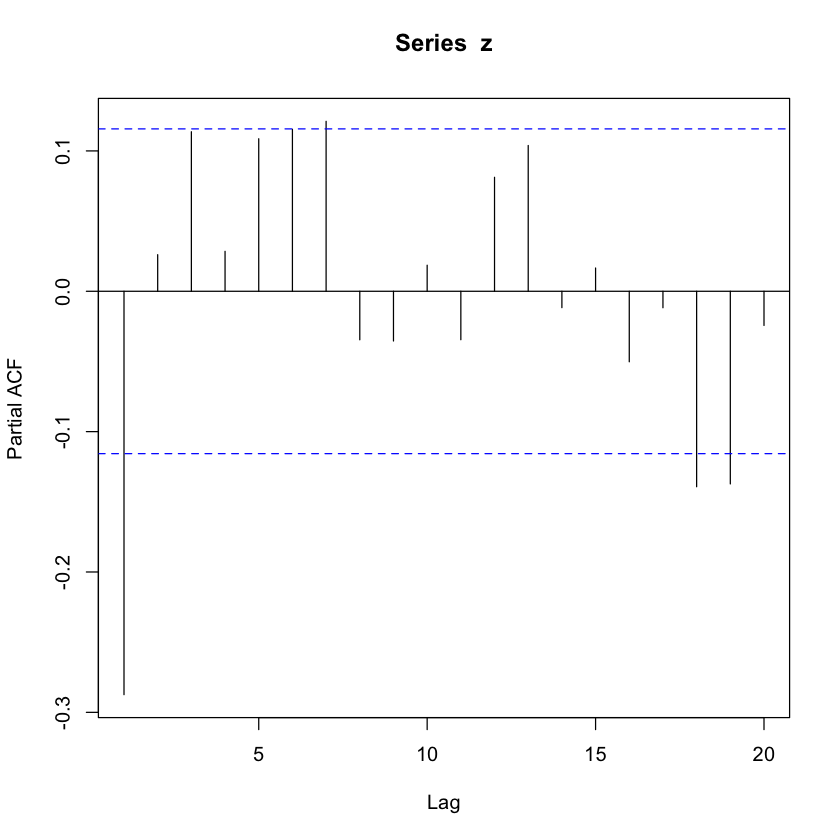

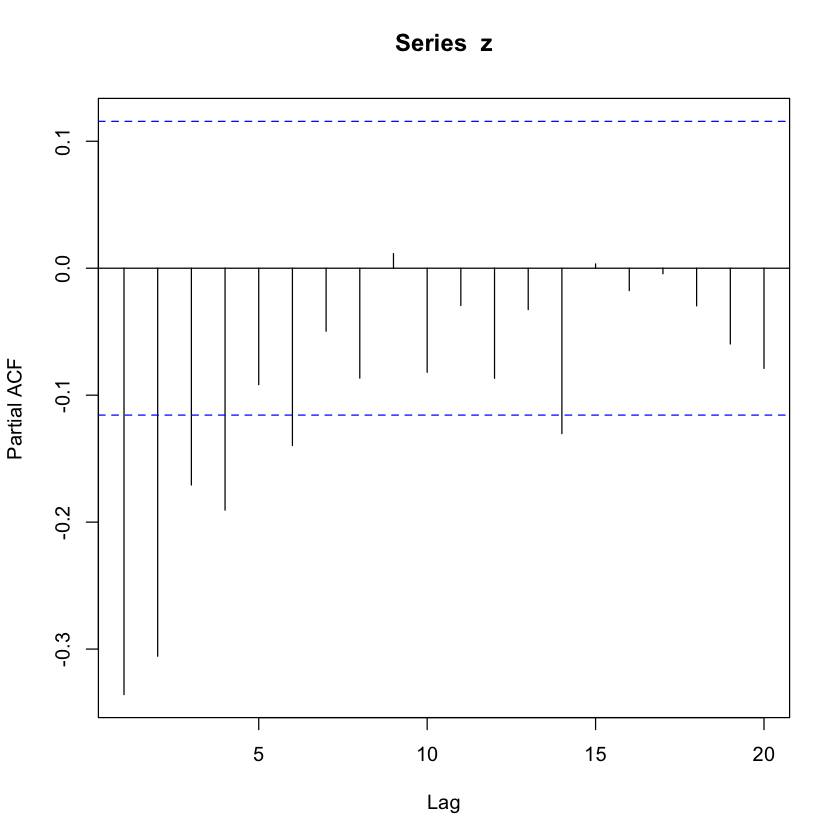

[1] "Electronics 4 2 5"


Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”


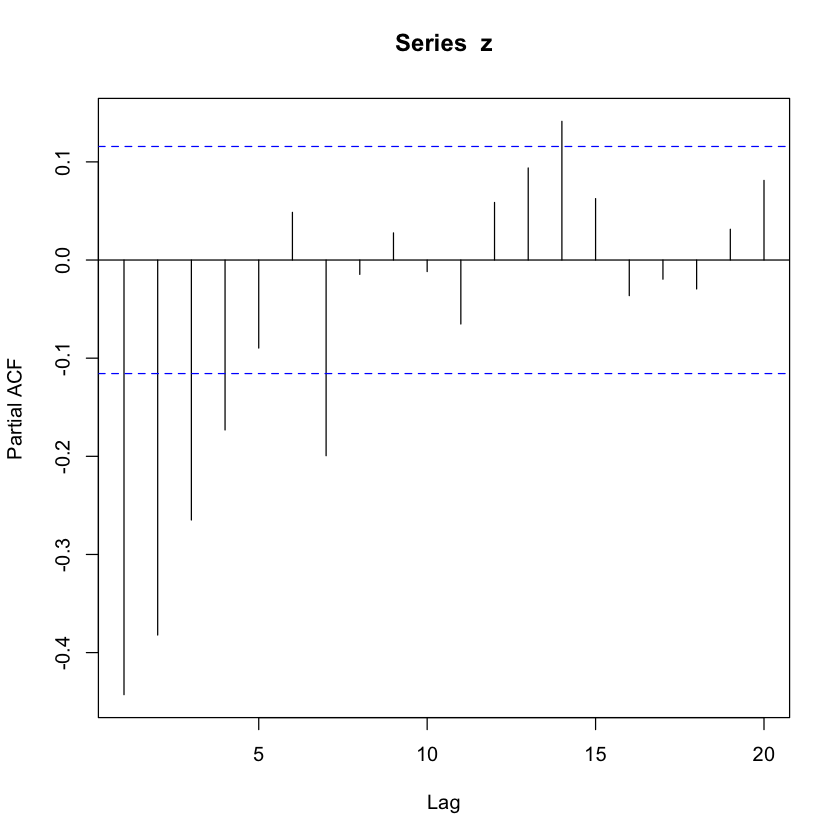

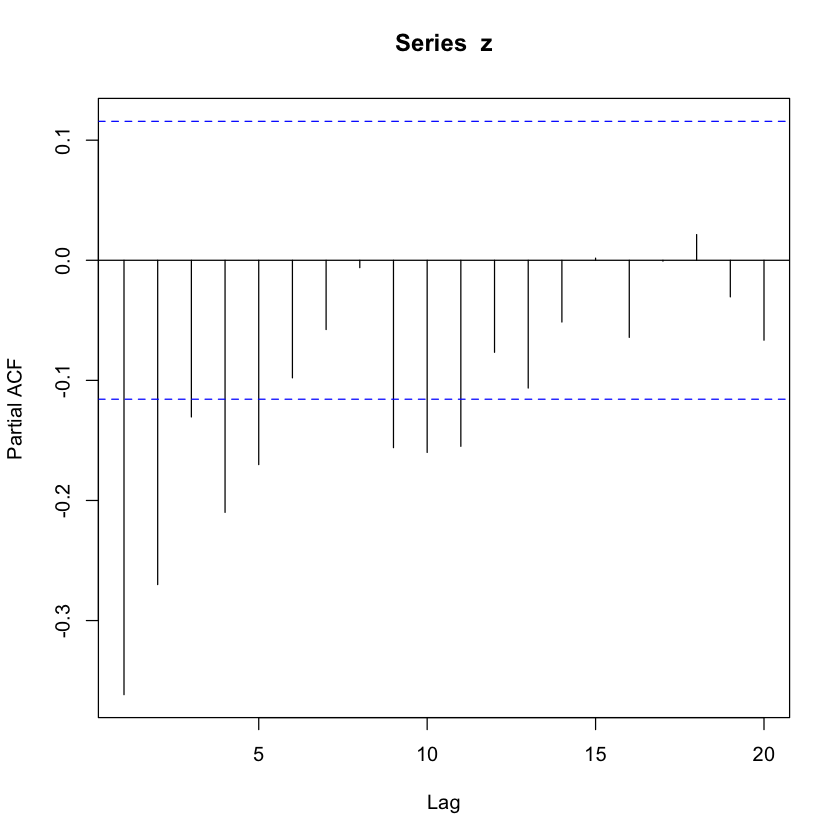

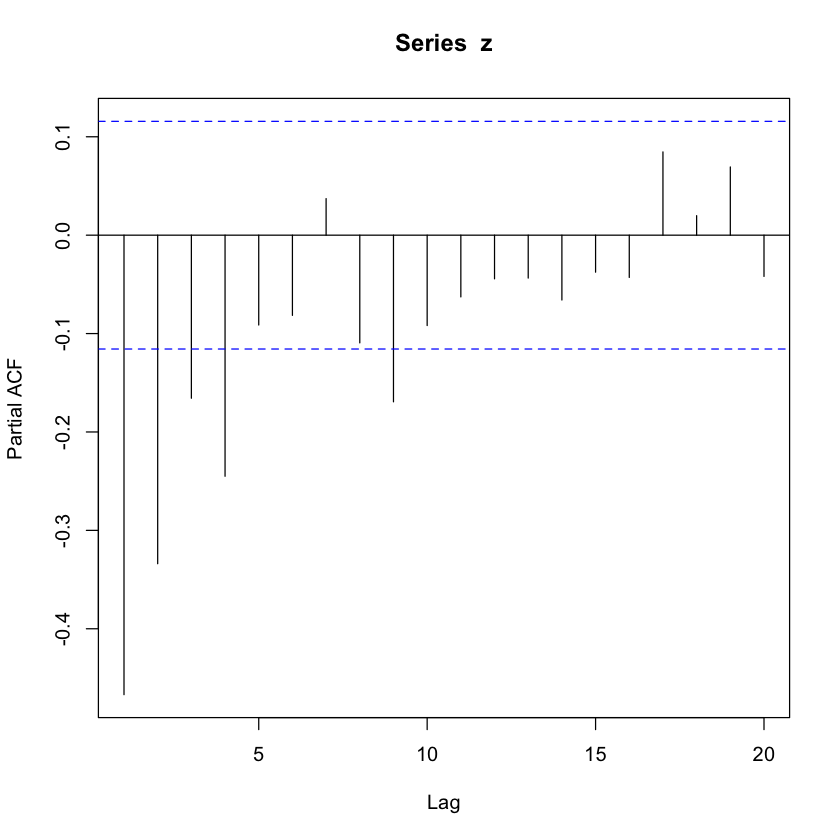

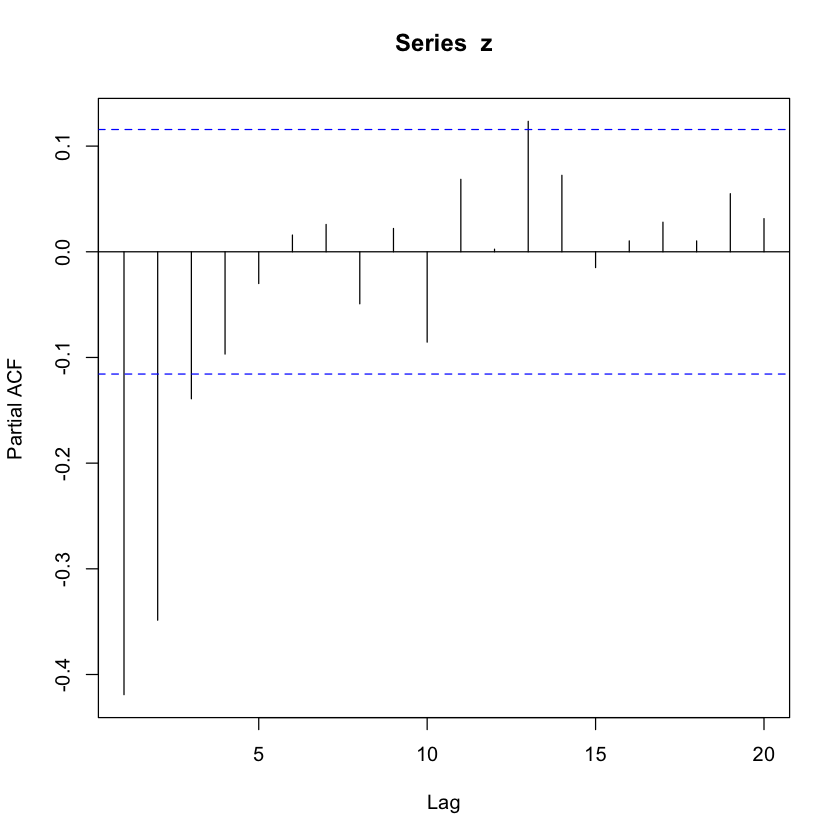

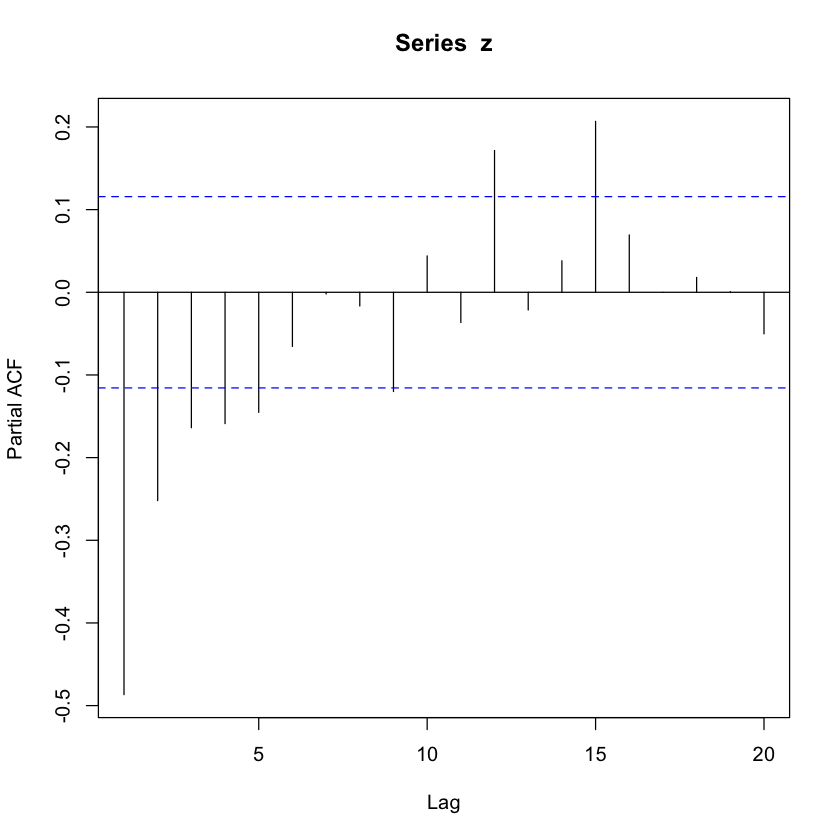

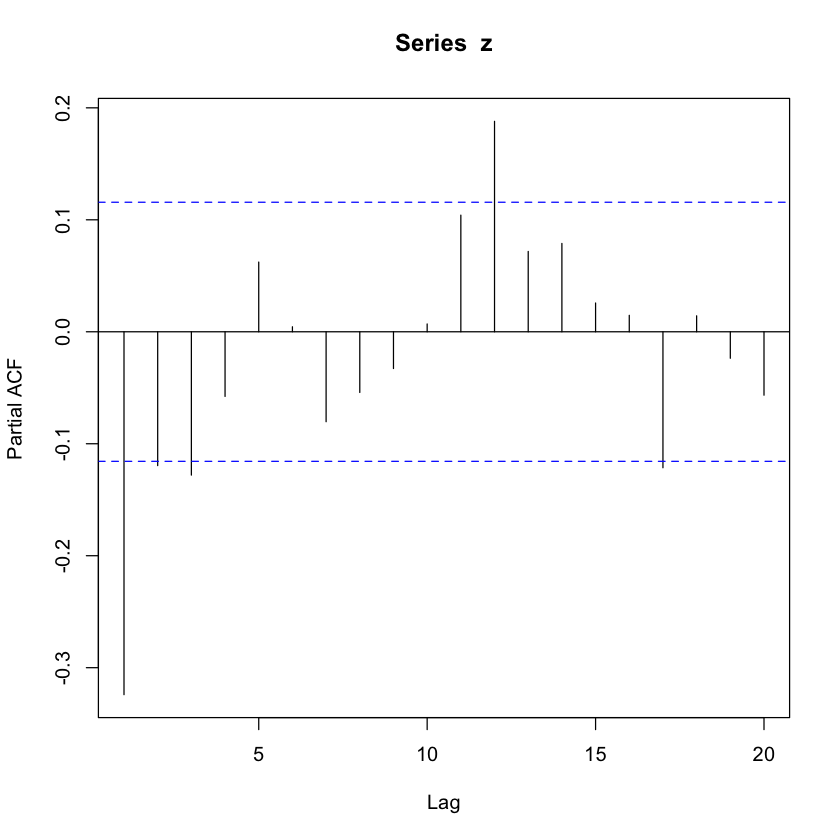

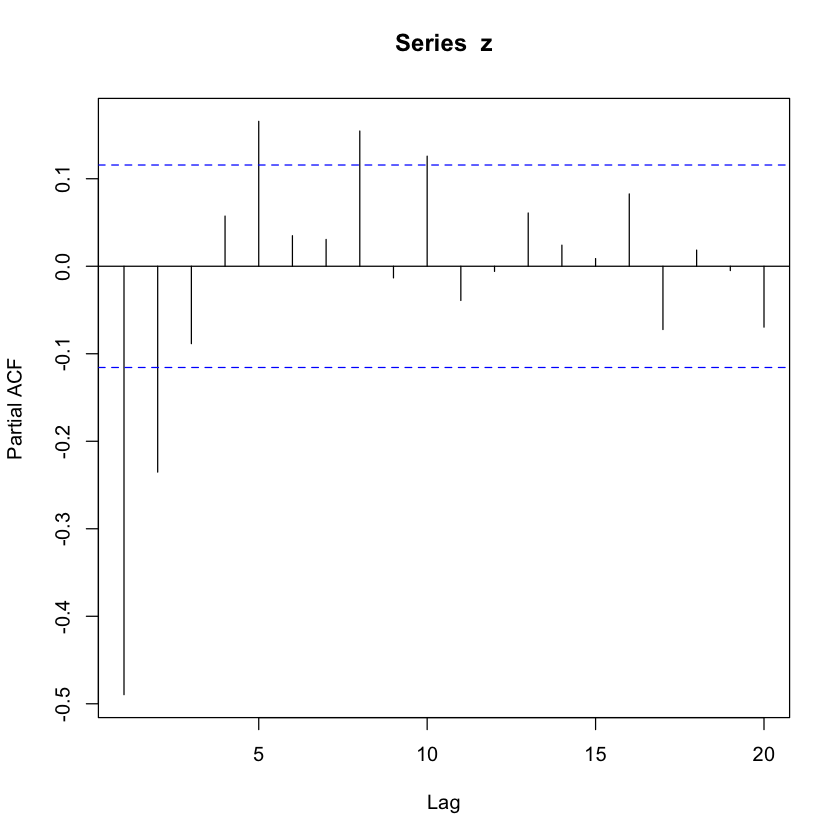

[1] "Factory 5"


Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”


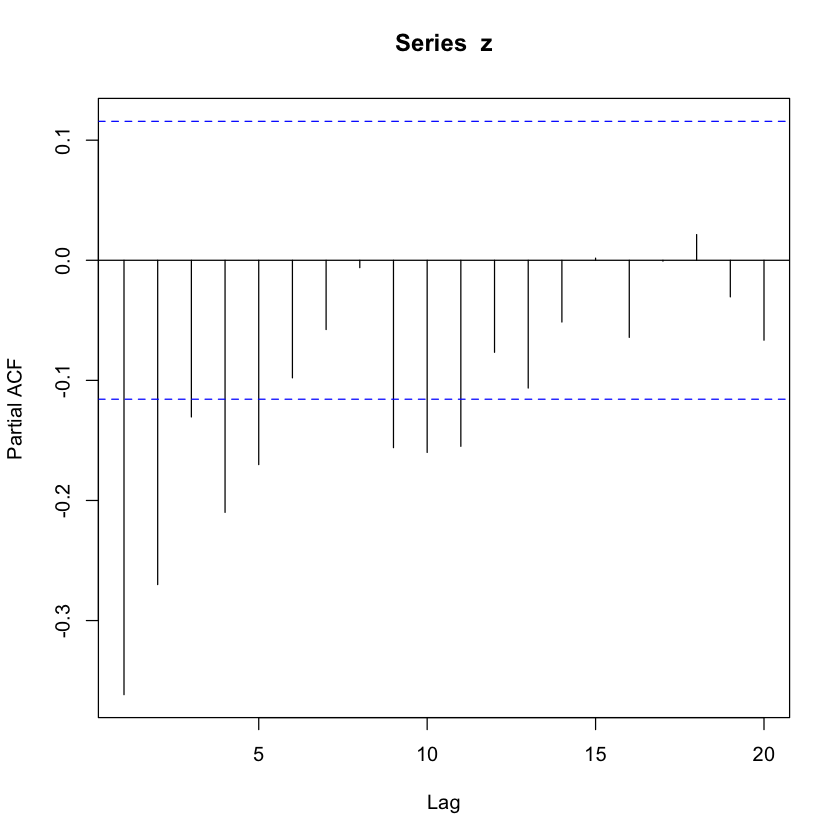

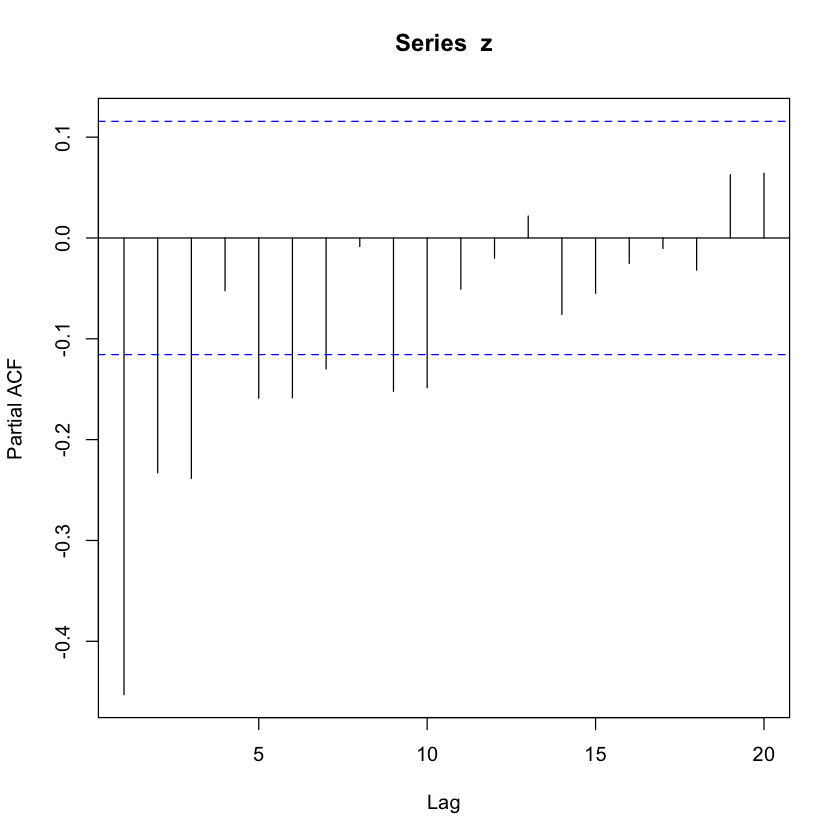

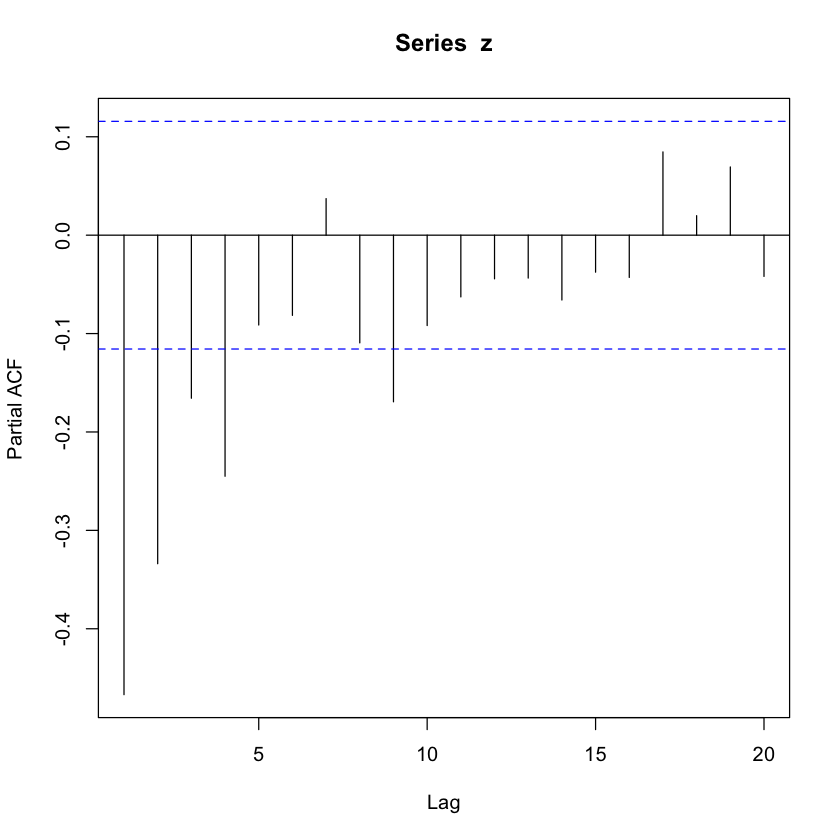

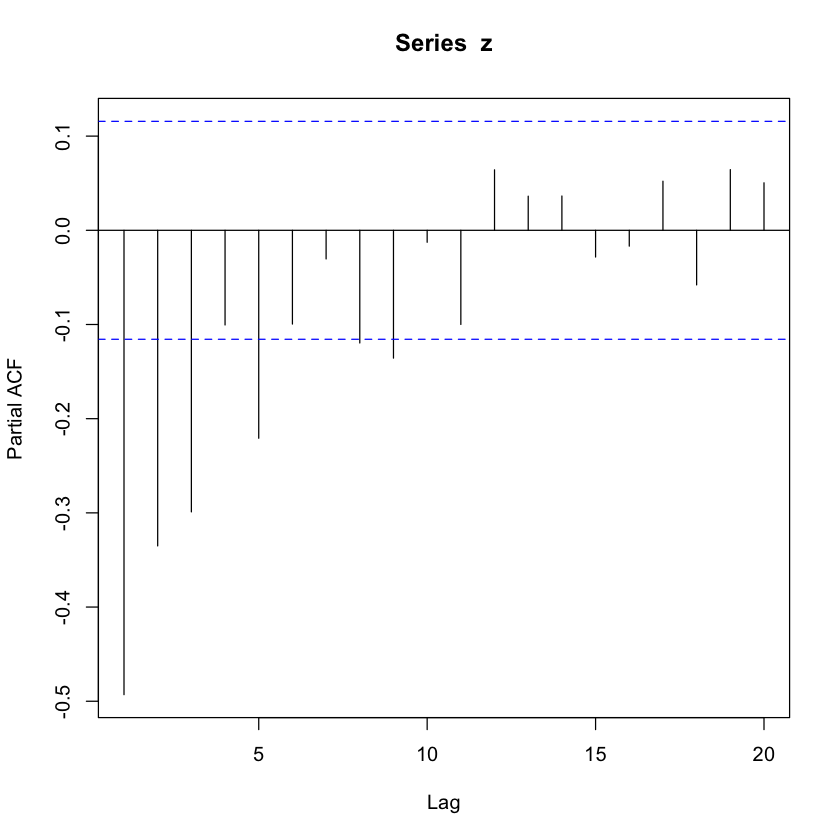

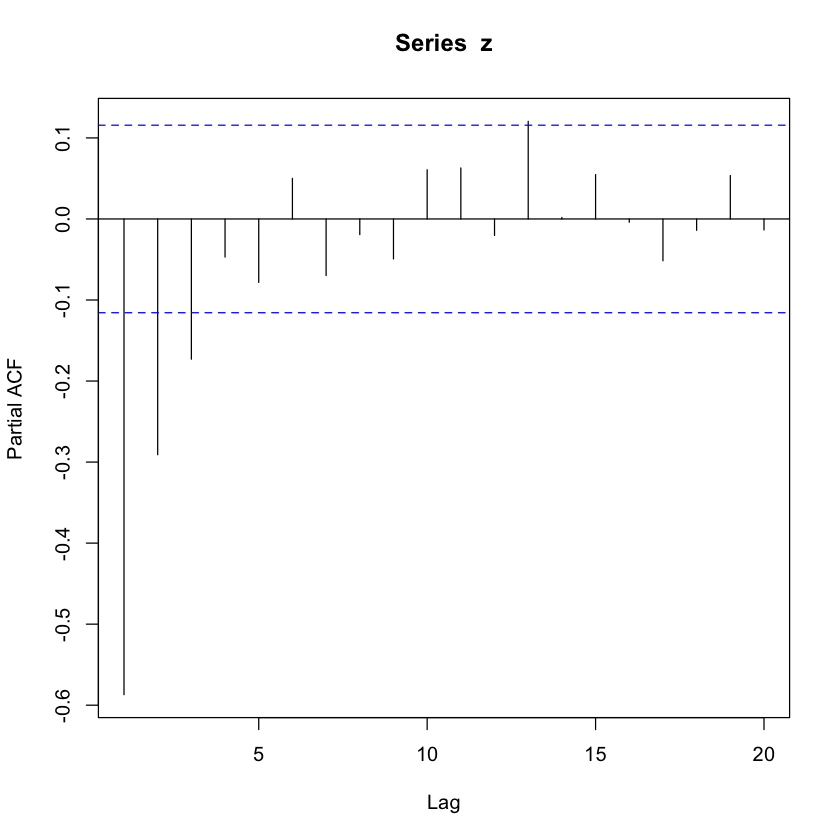

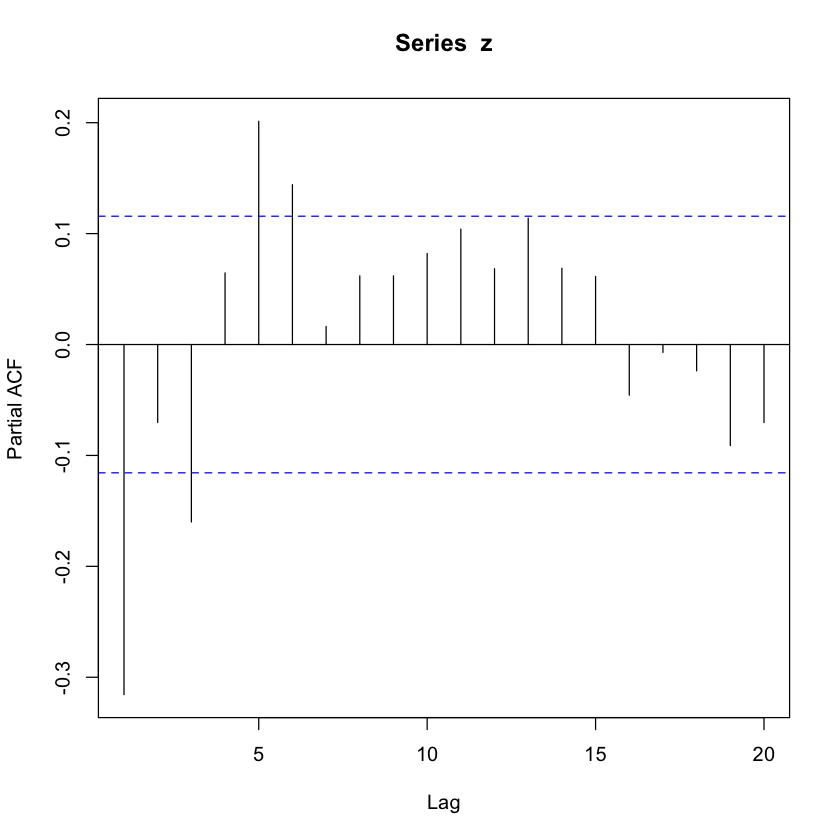

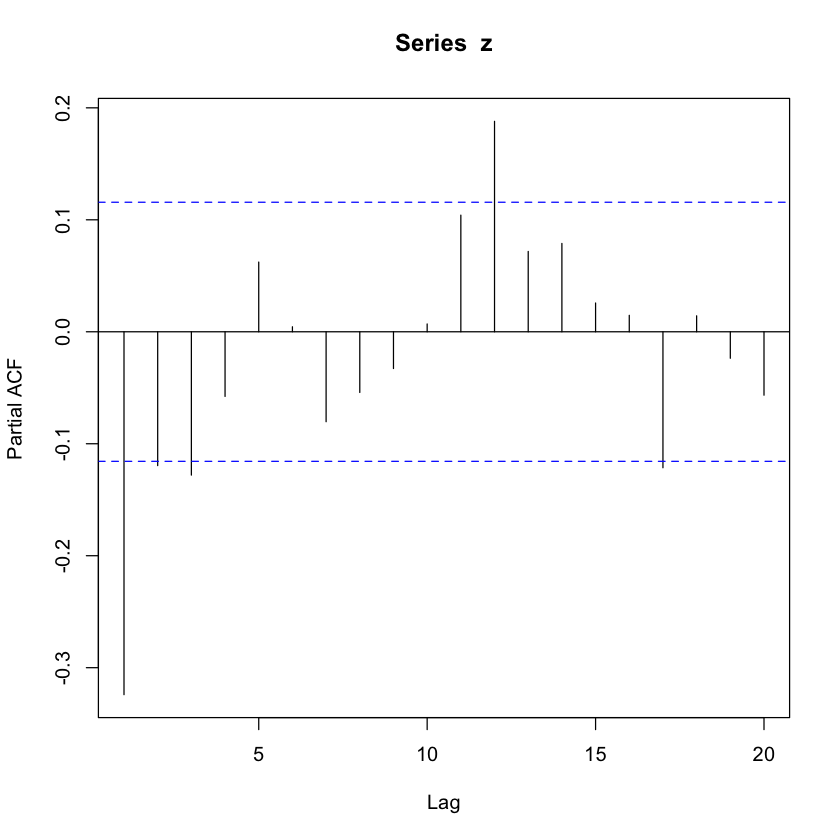

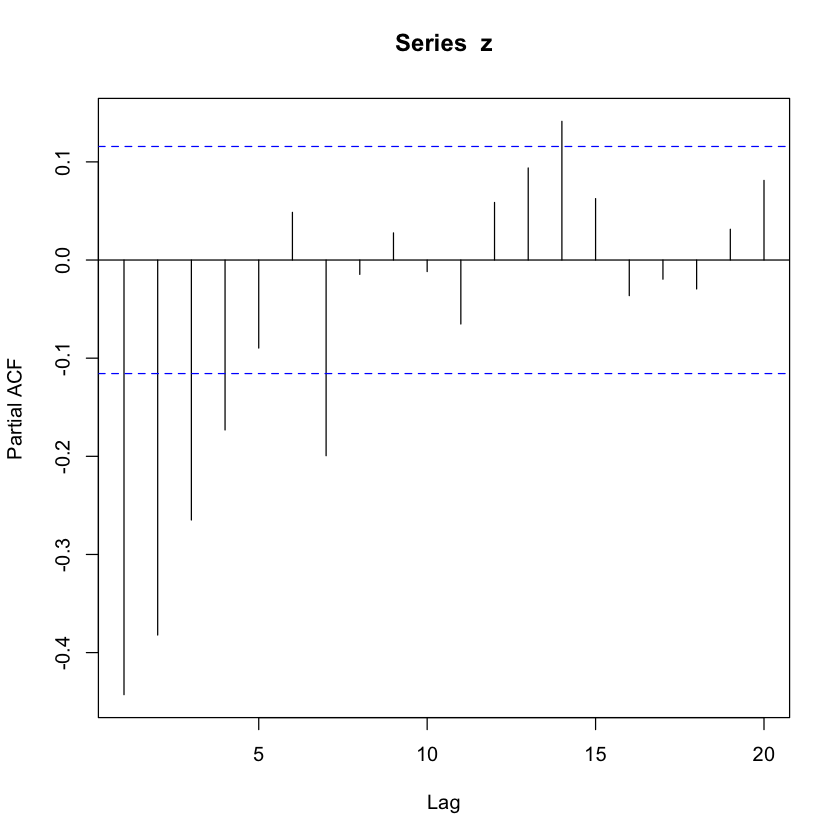

[1] "Food & Snack 7 6 3 5"


Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”


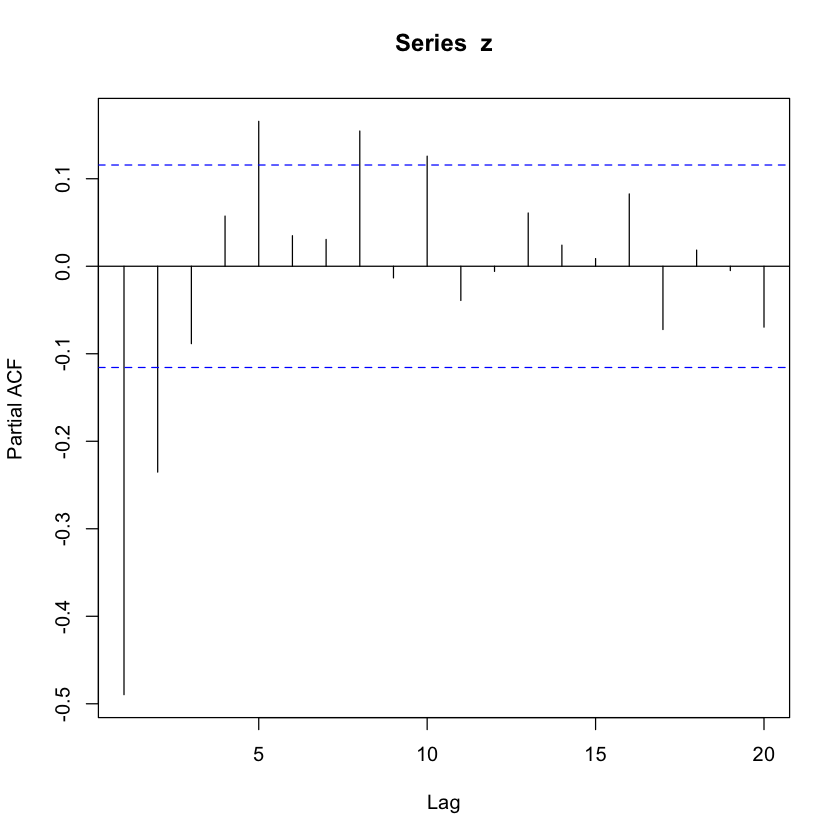

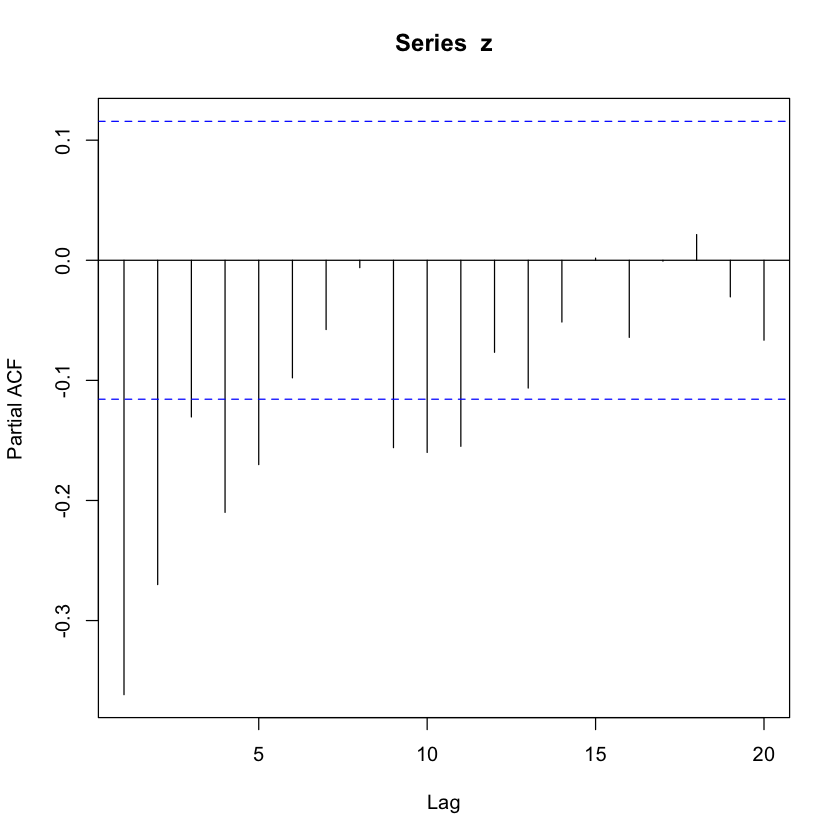

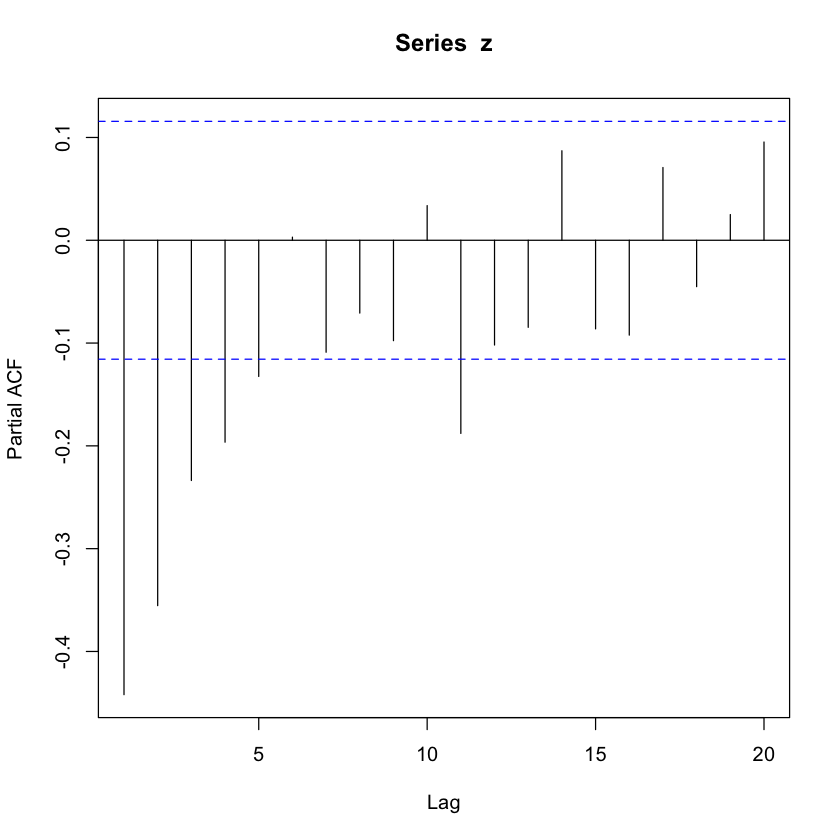

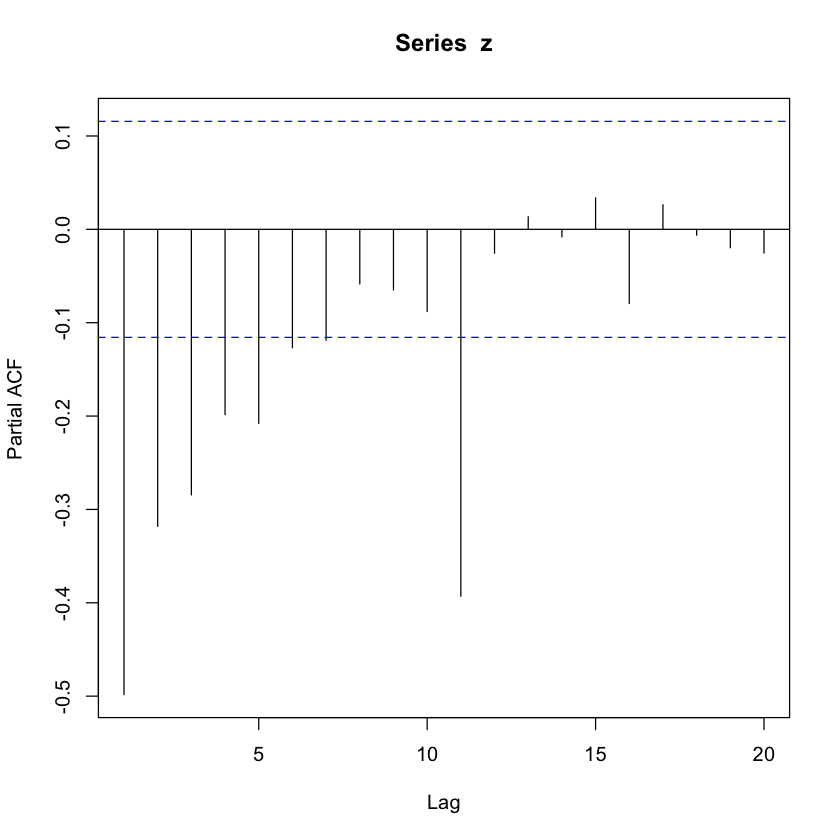

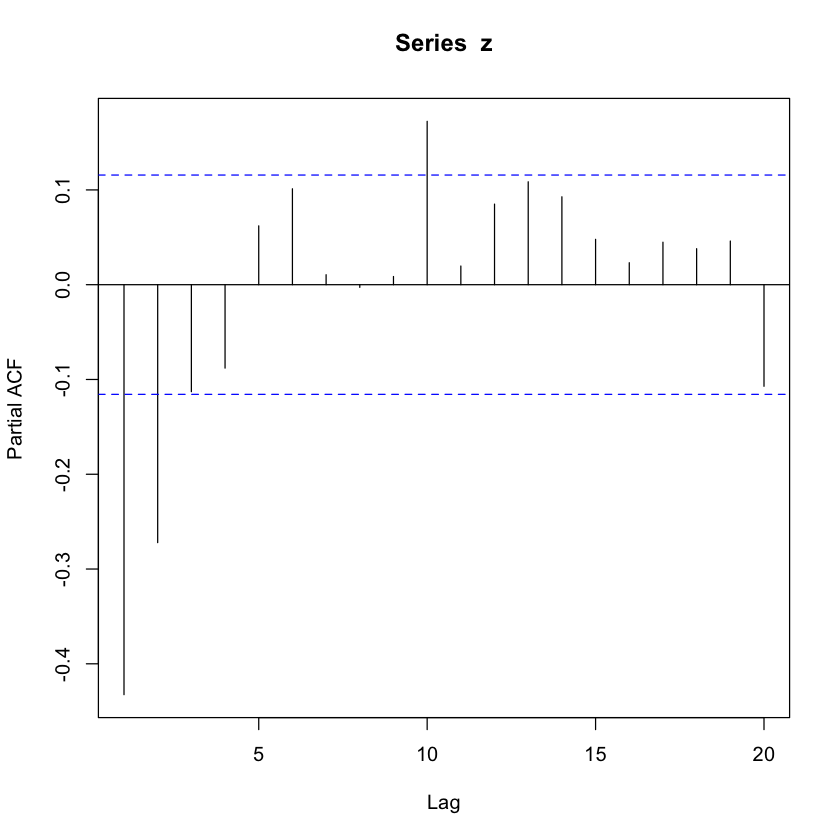

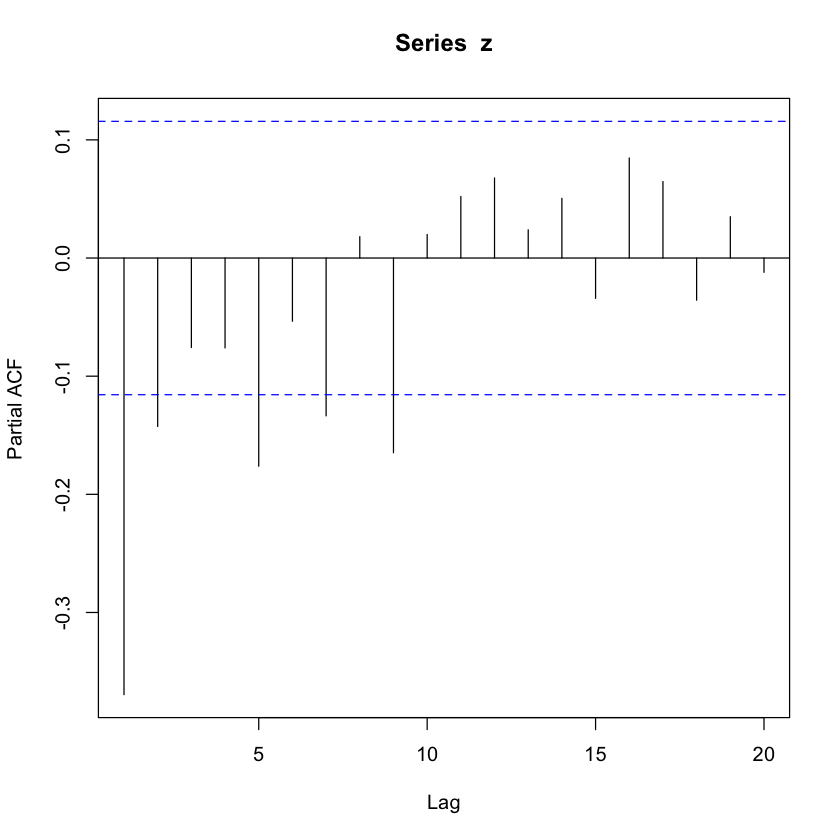

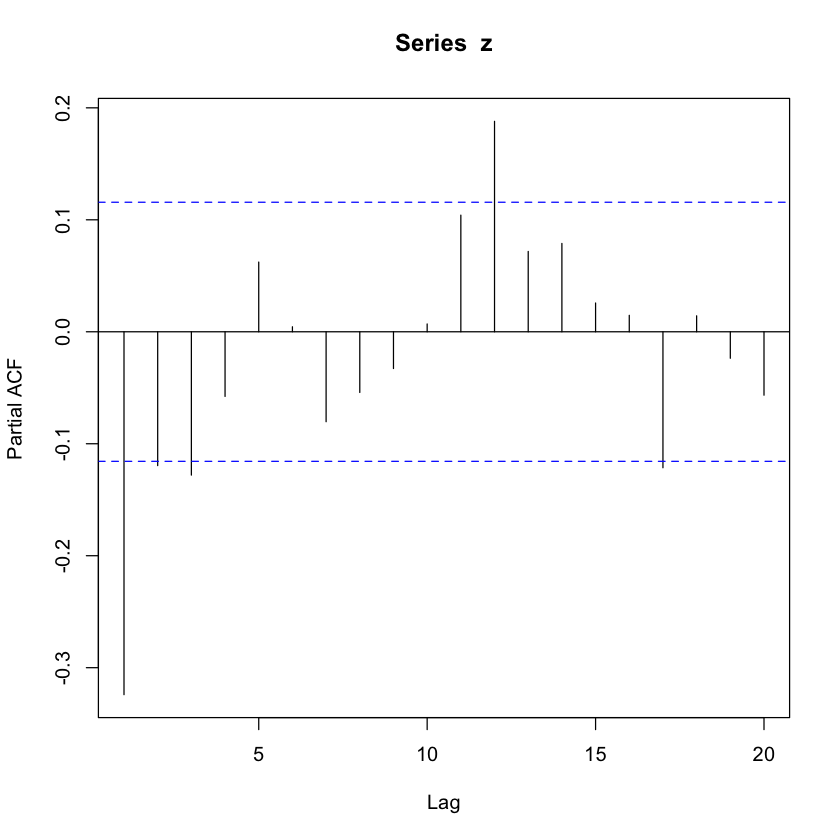

[1] "General Education Place 4 5 7"


Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”


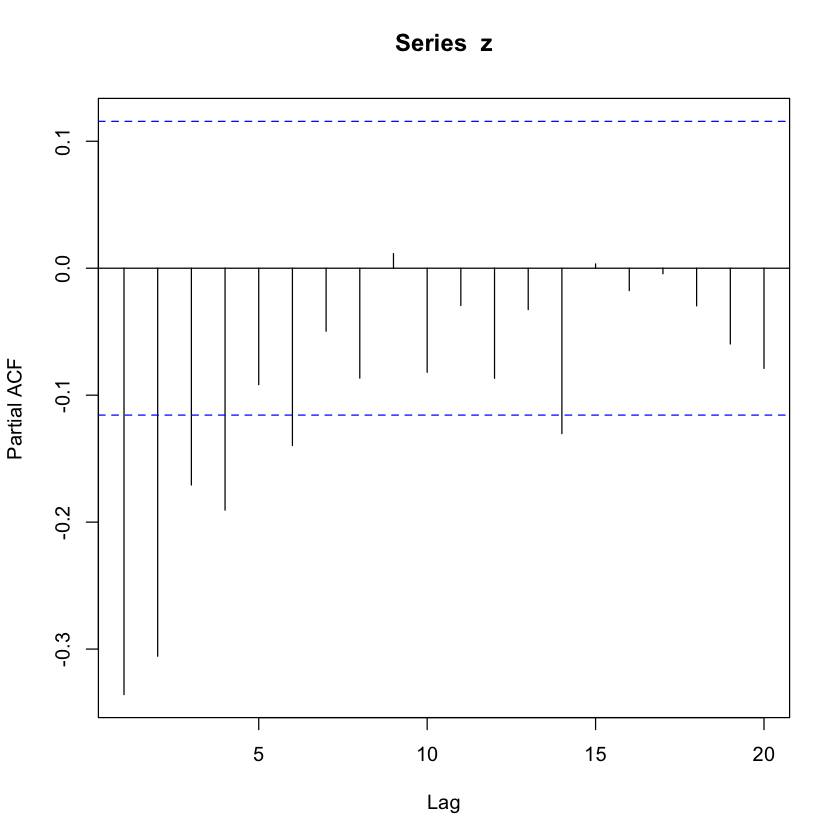

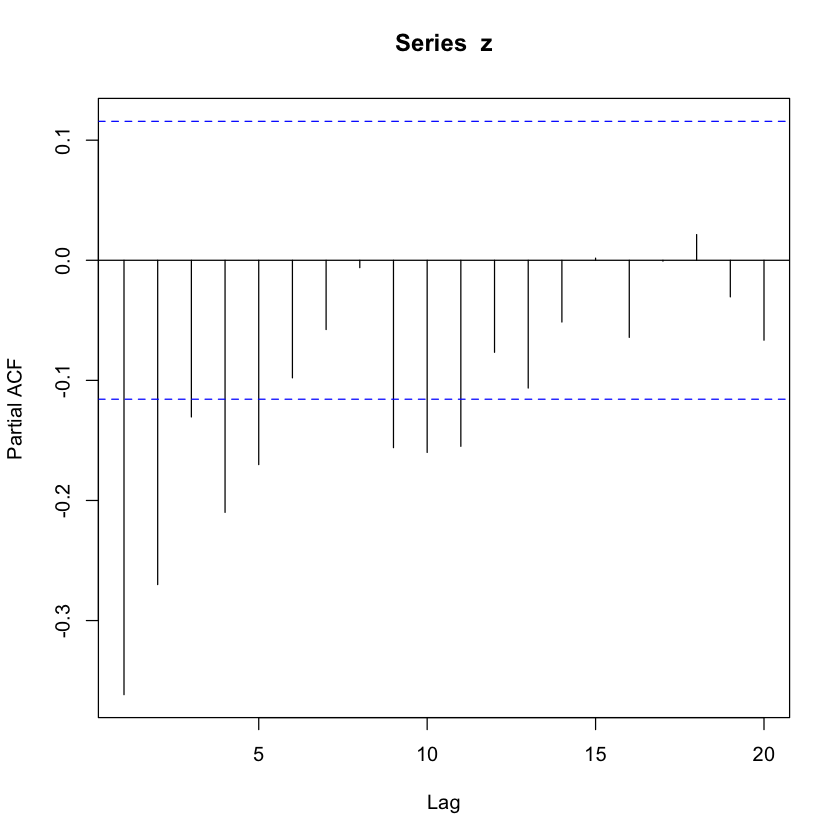

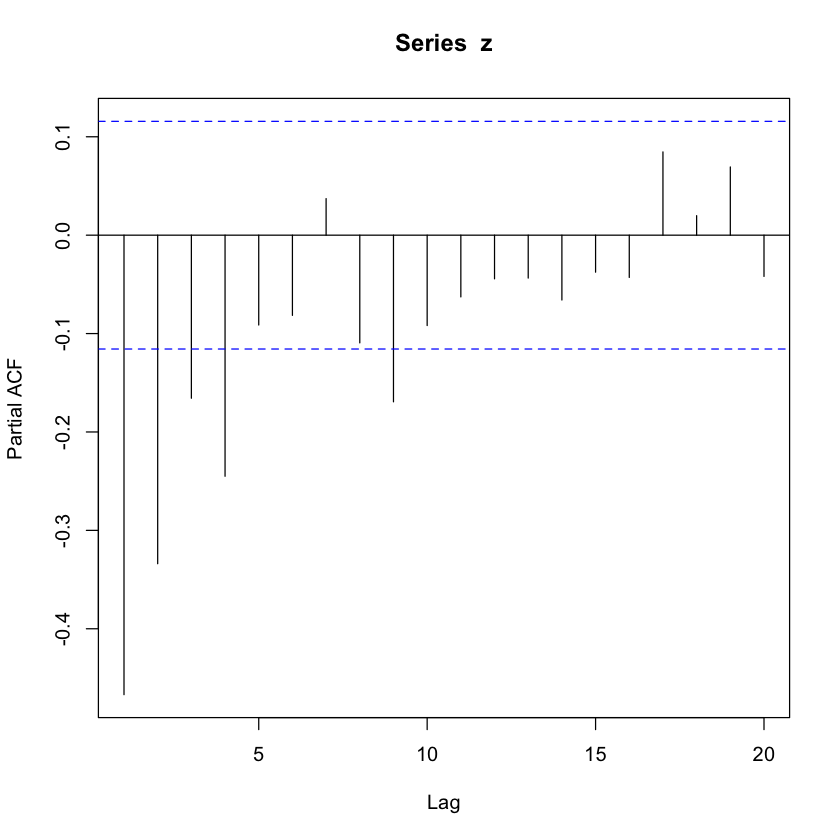

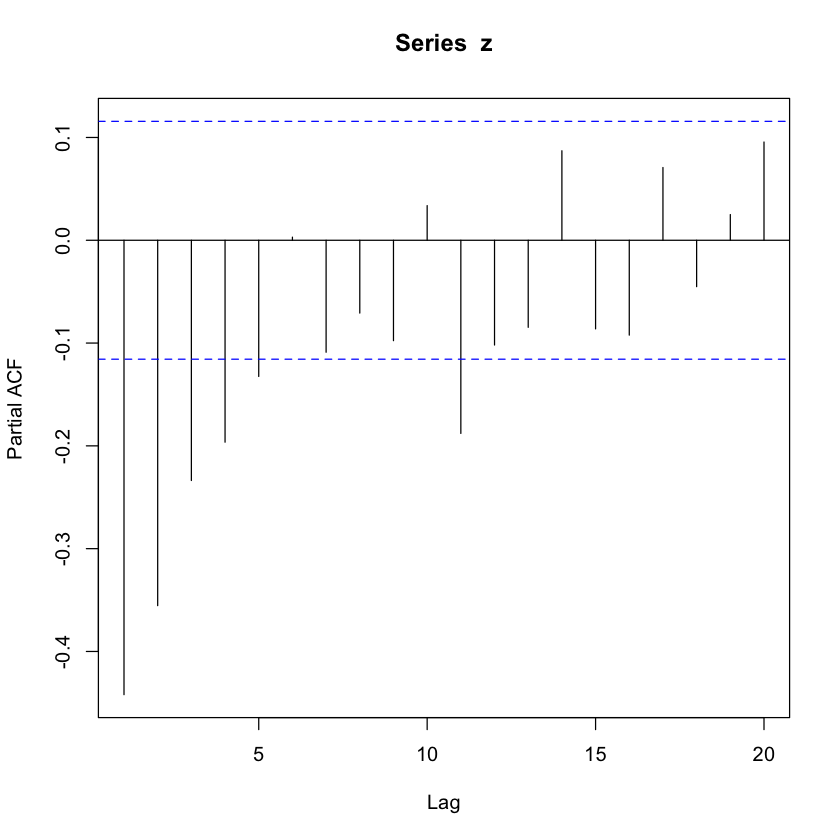

[1] "History, Museum & Arts 3 4"


Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”


[1] "Hotel 1"


Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”


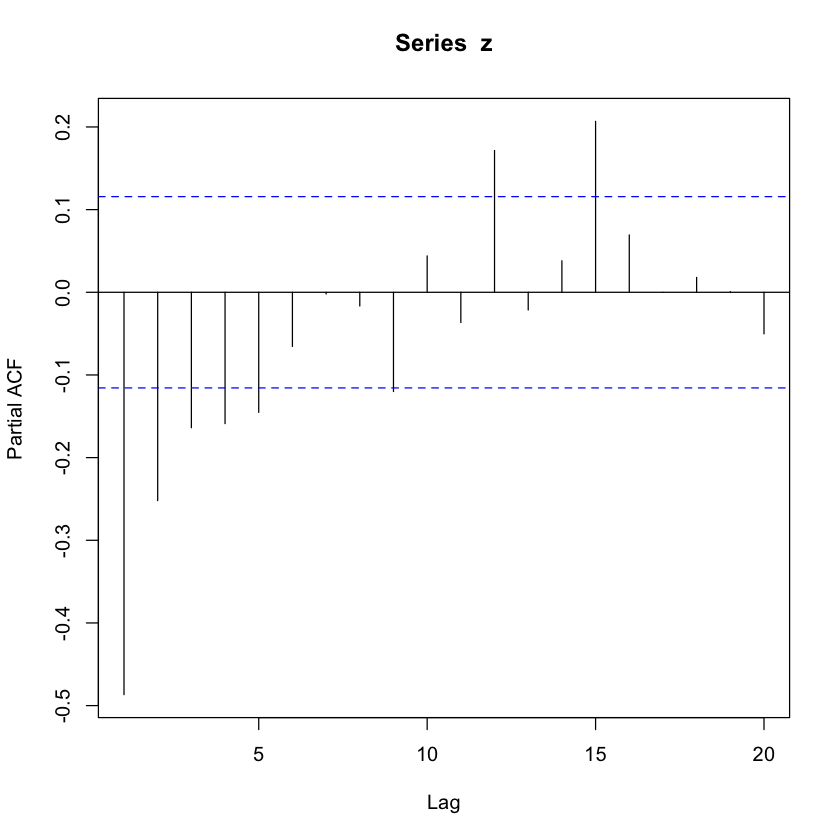

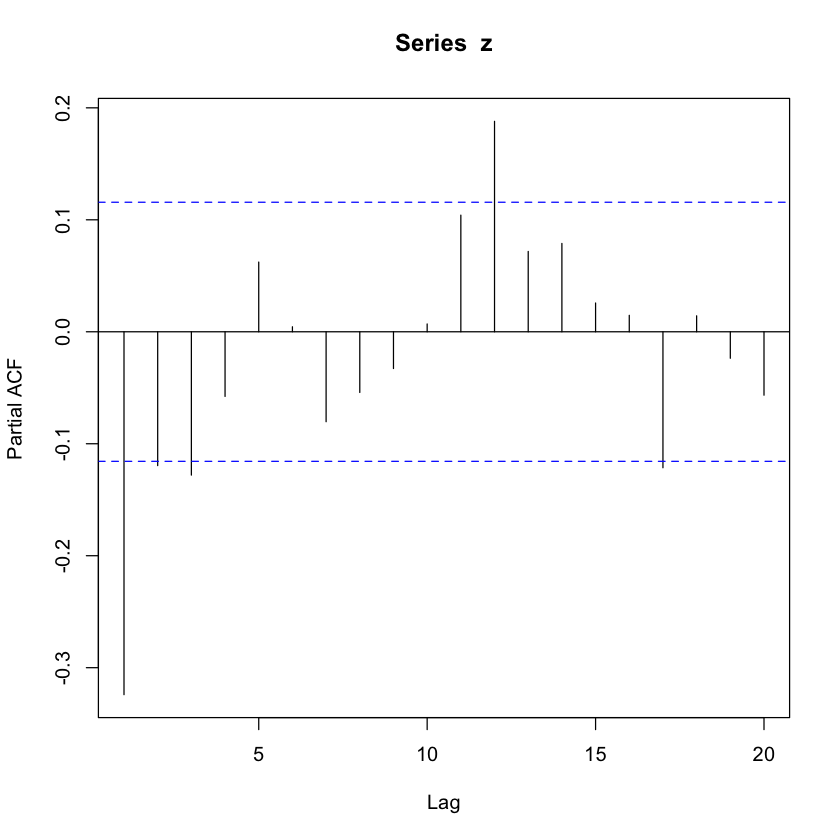

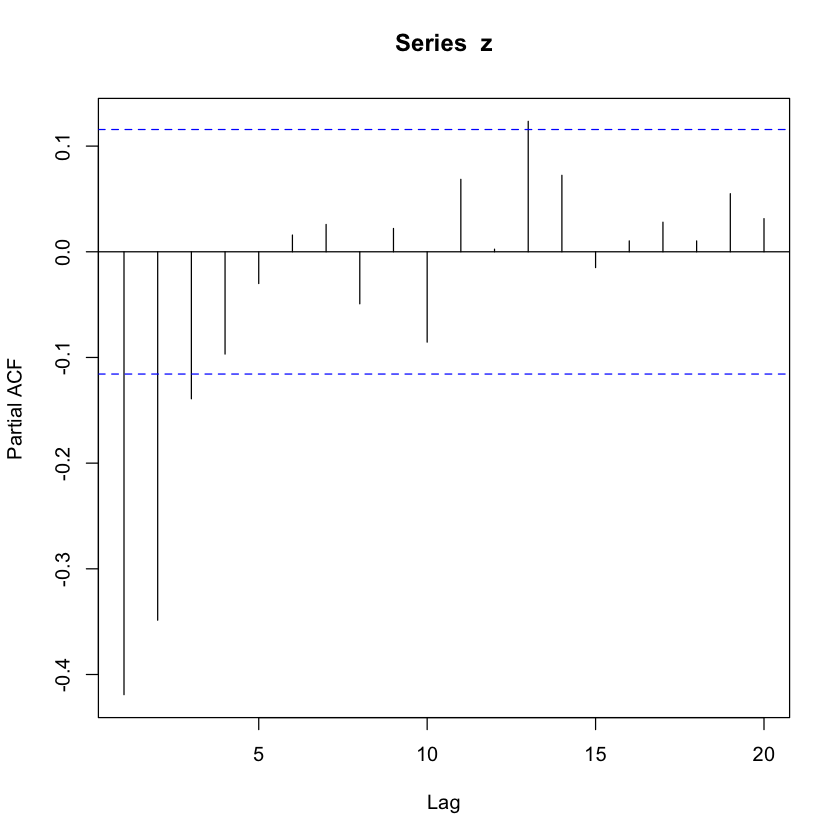

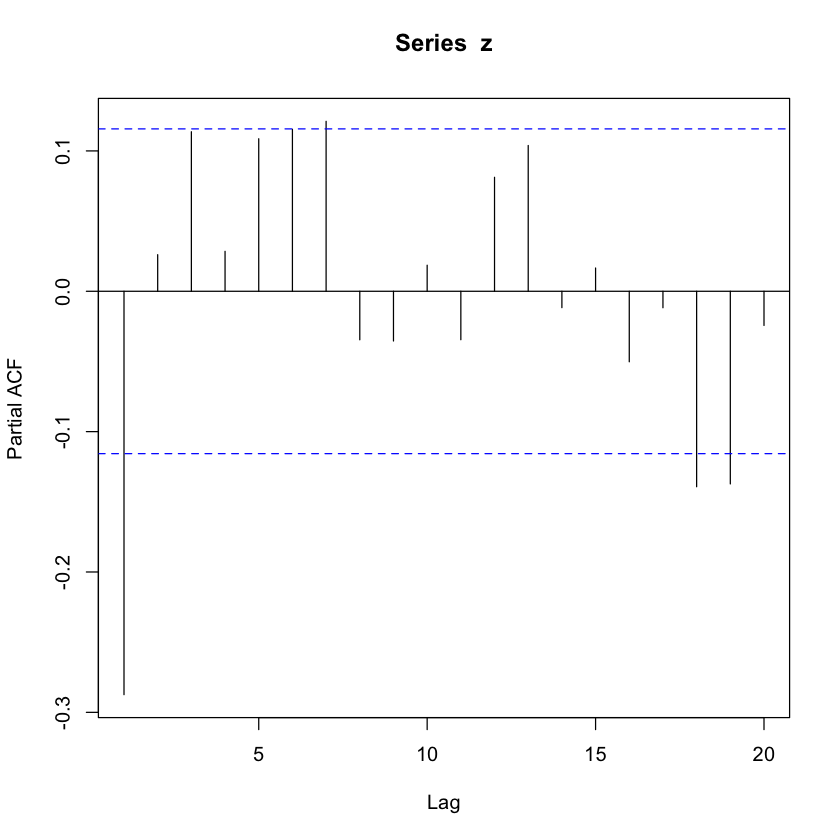

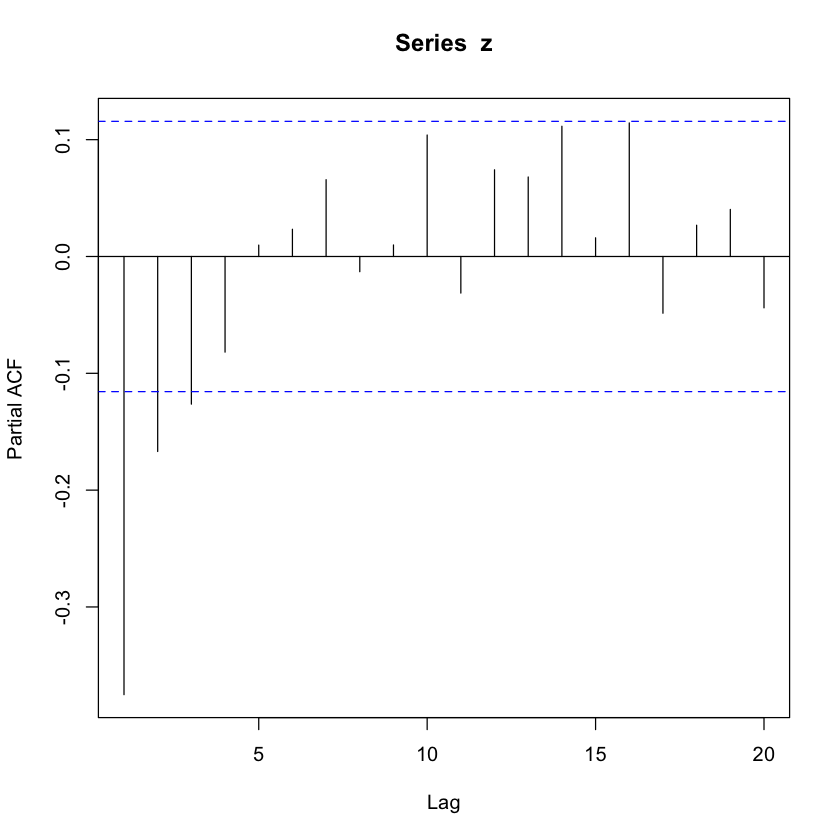

[1] "Indoor Entertainment 5"


Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”


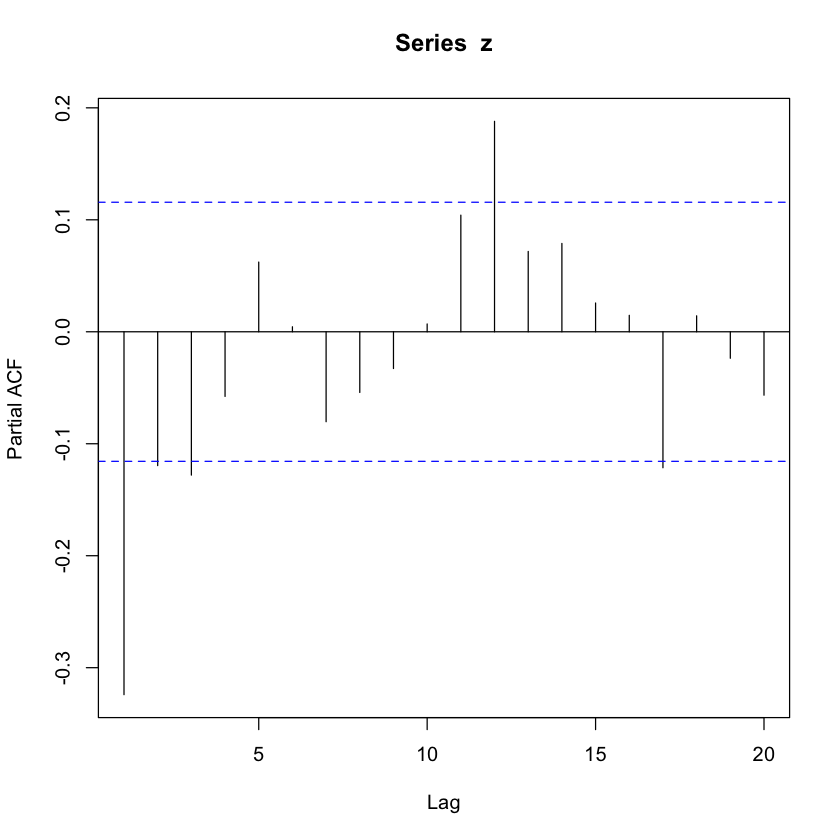

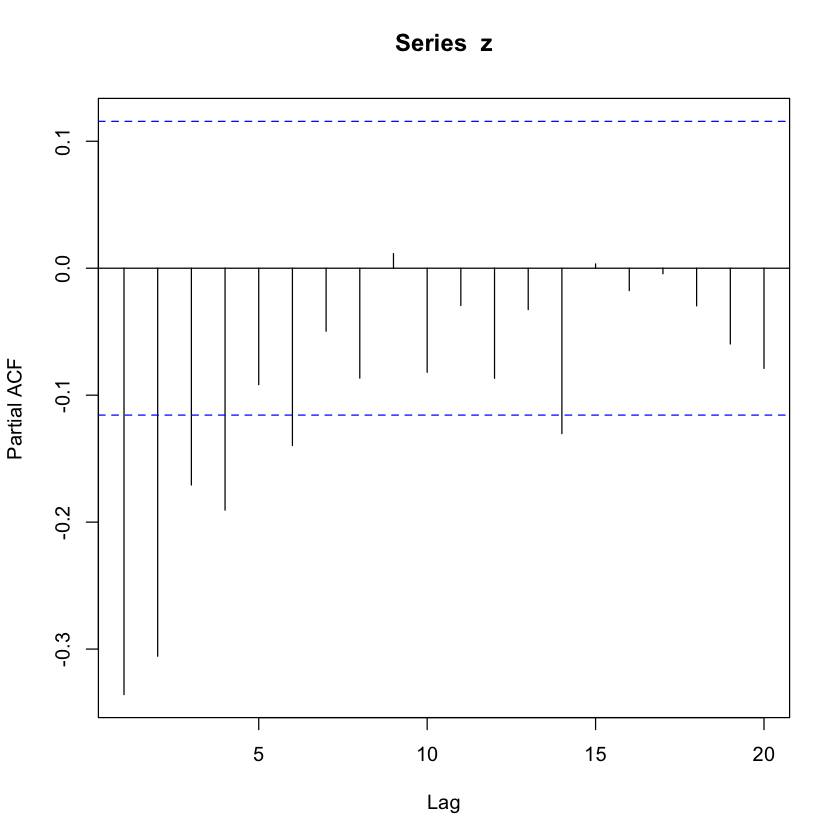

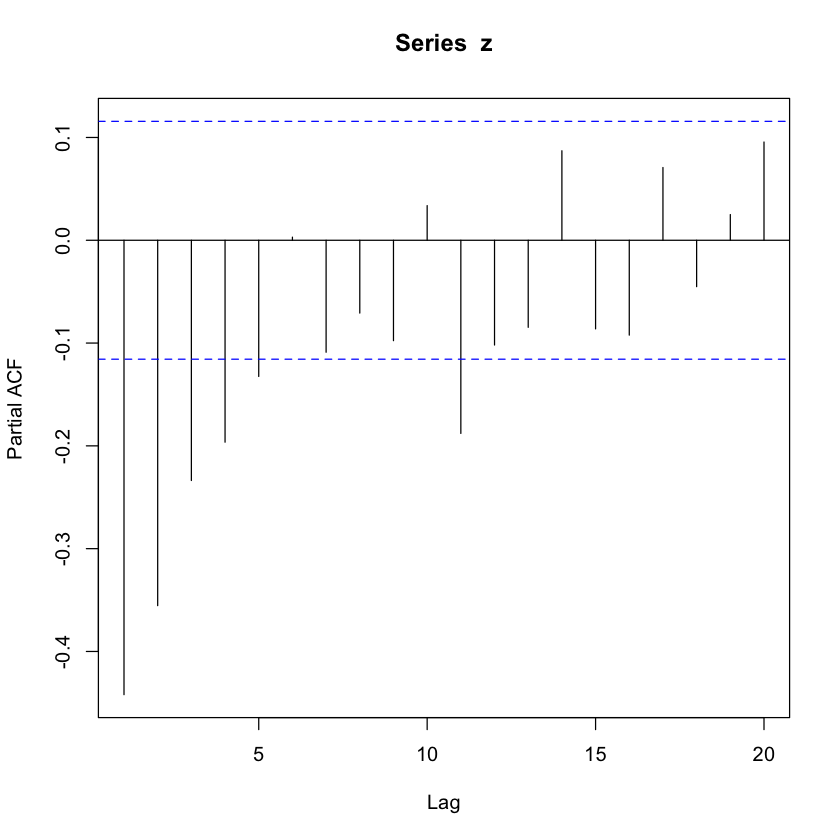

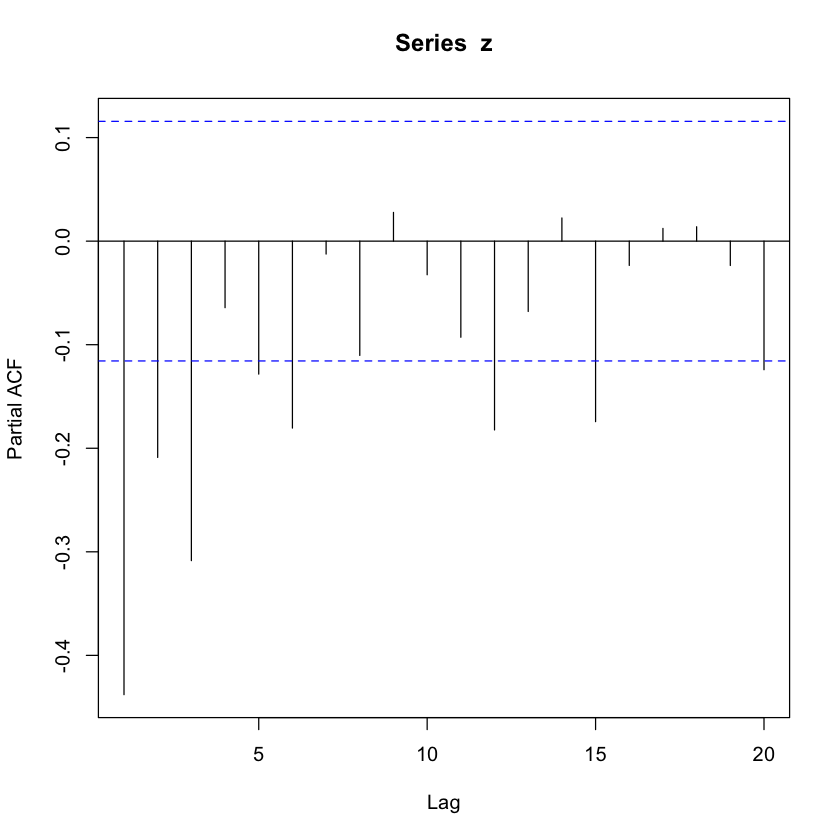

[1] "Medical-Related Place 3 4"


Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”


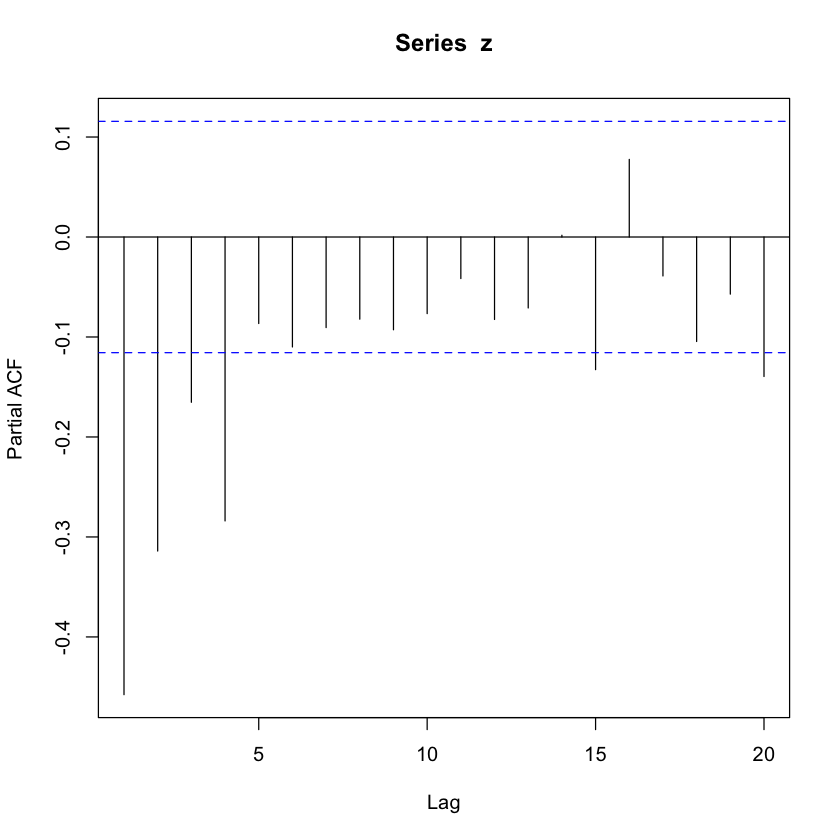

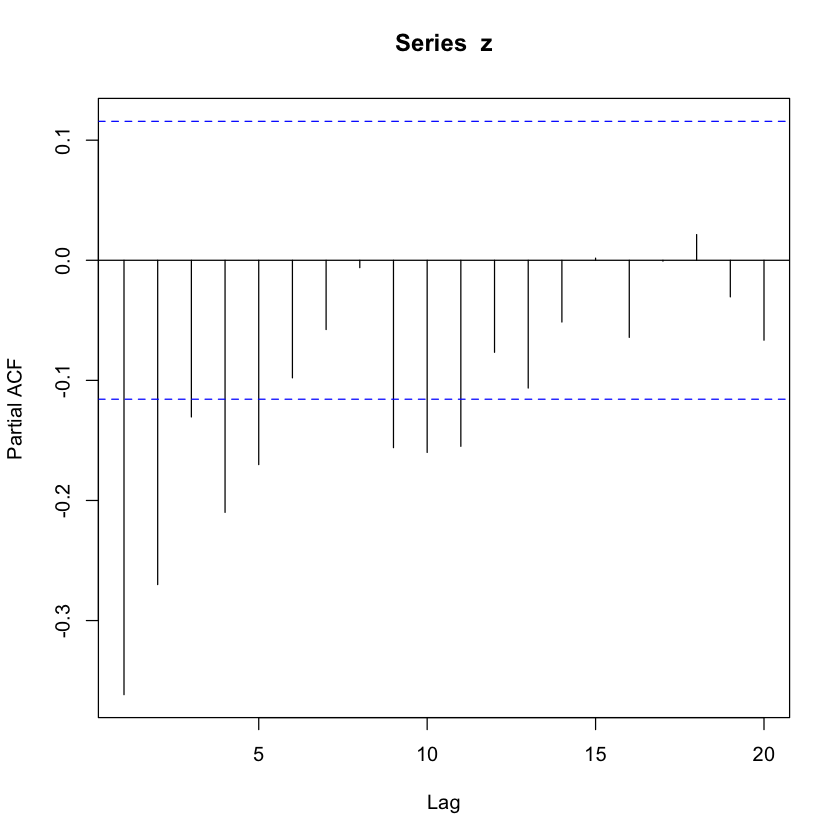

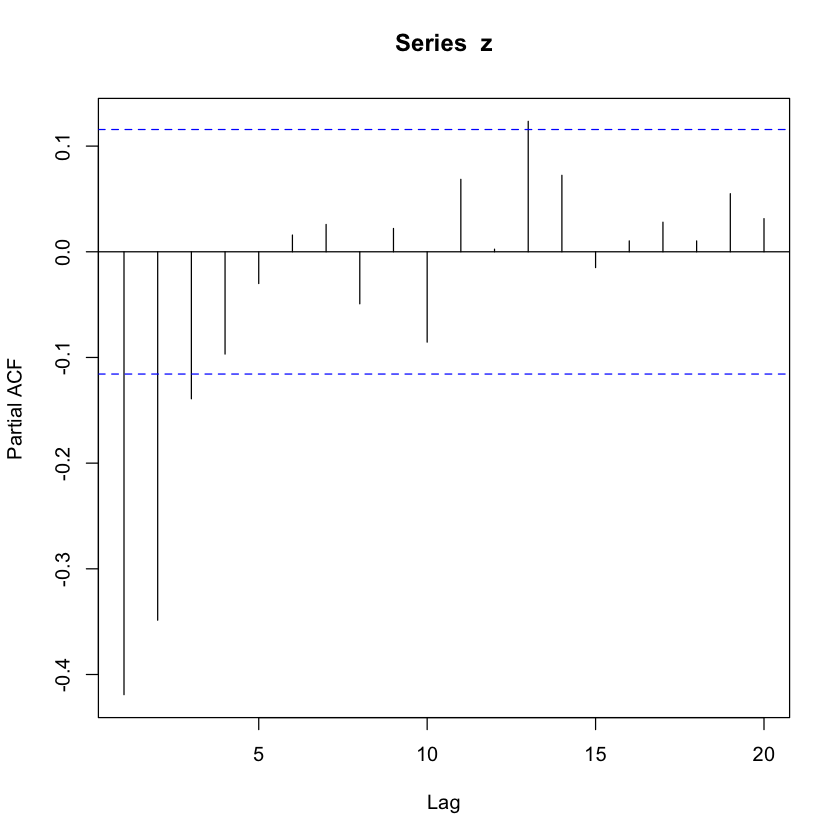

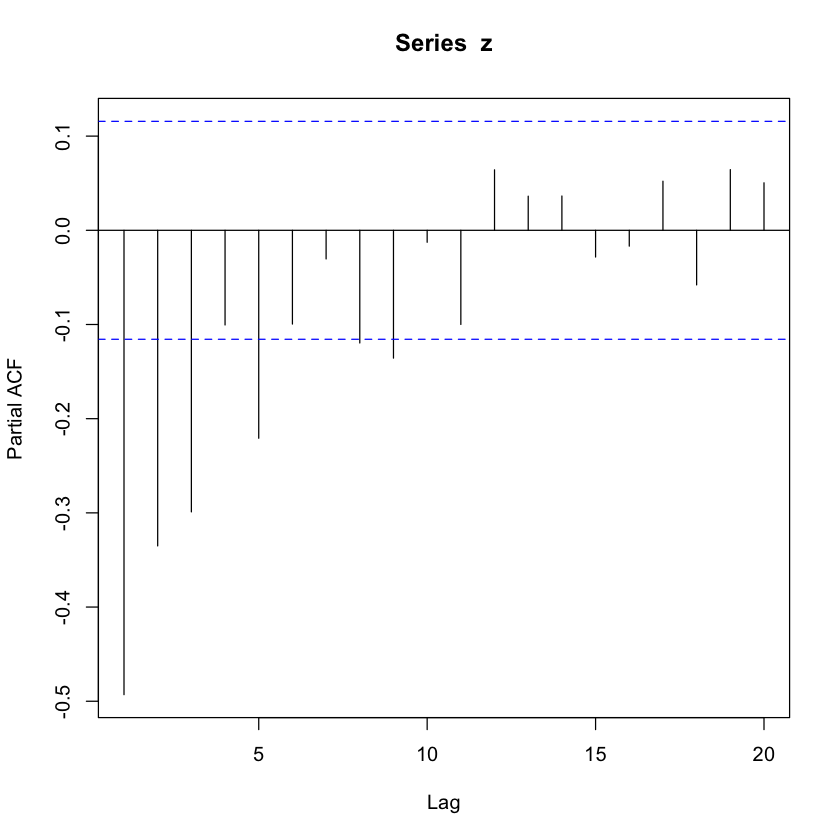

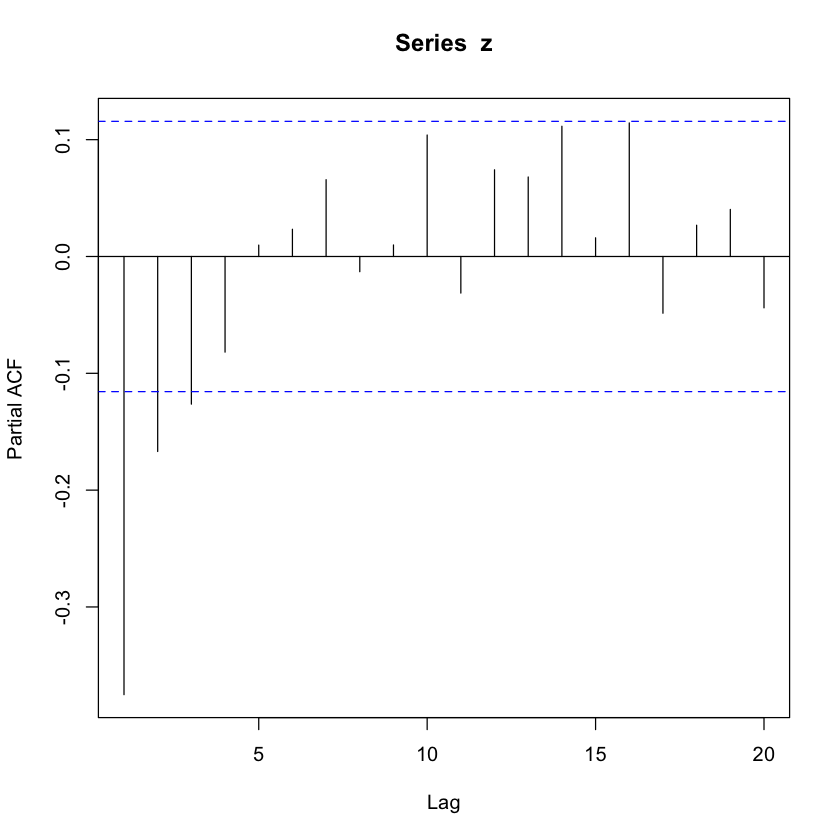

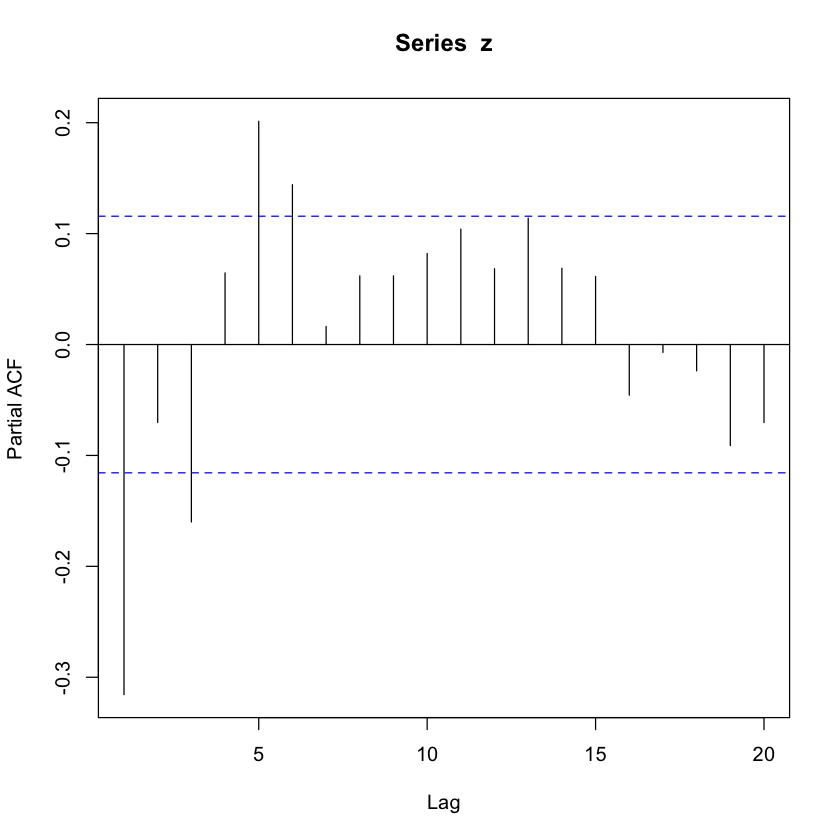

[1] "Neighborhood 4 5"


Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”


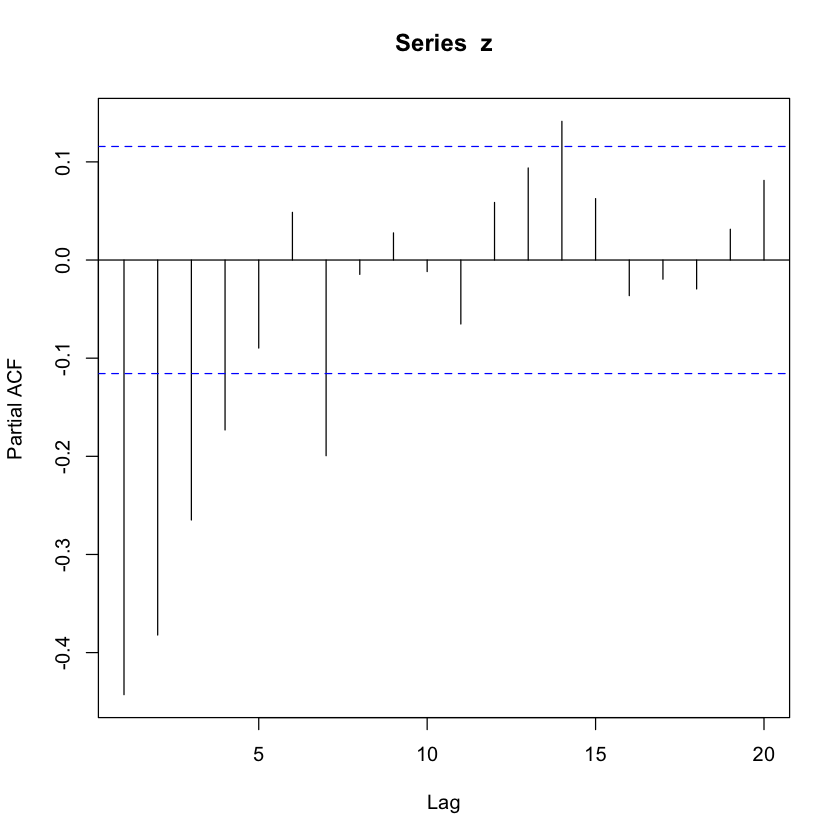

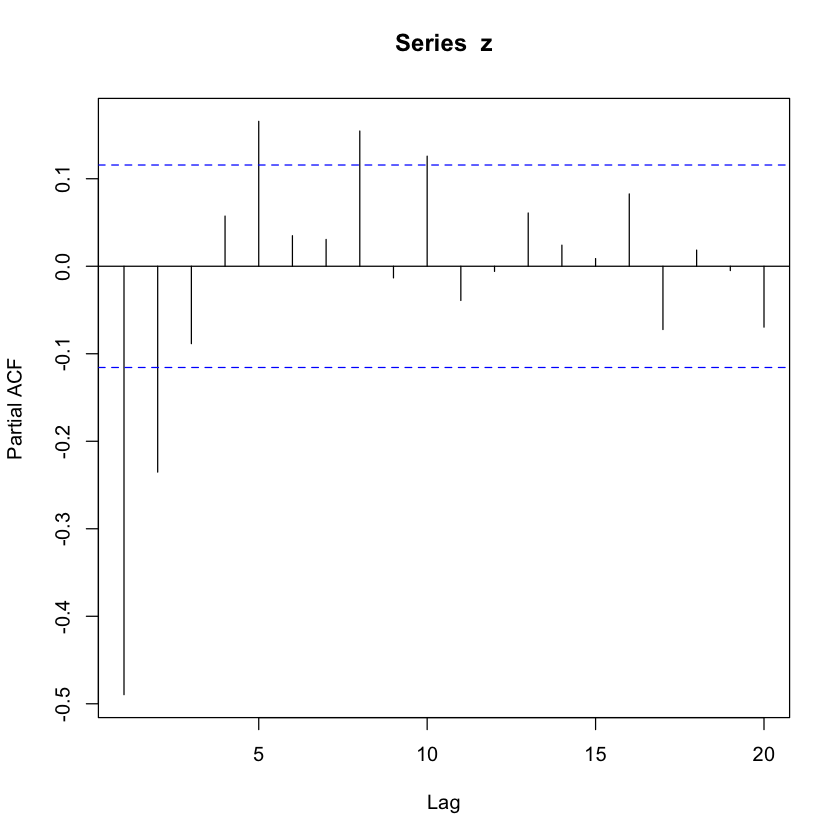

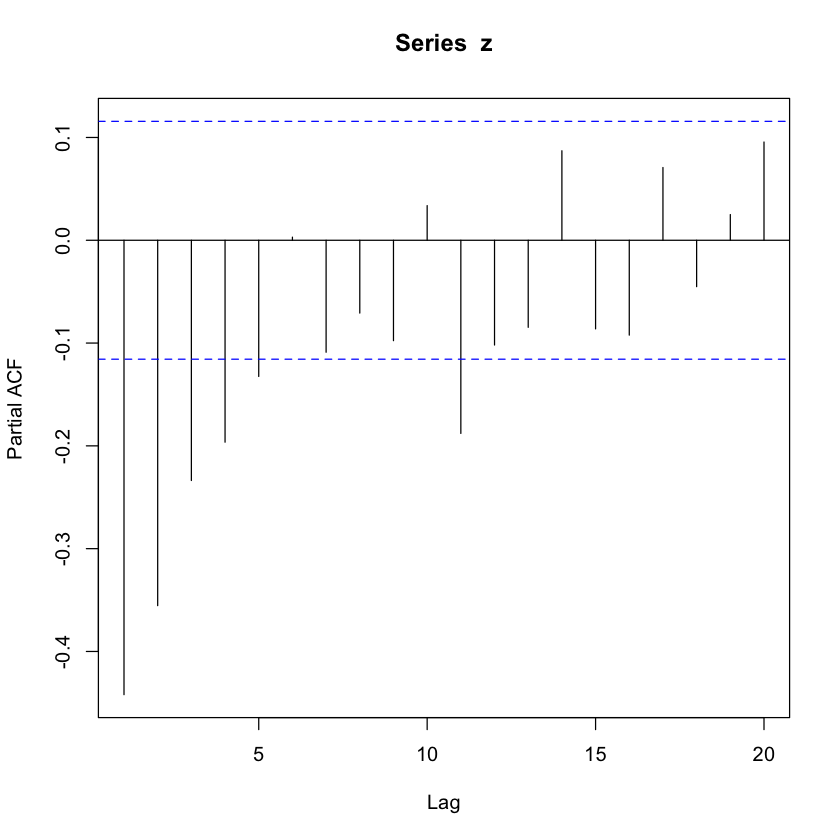

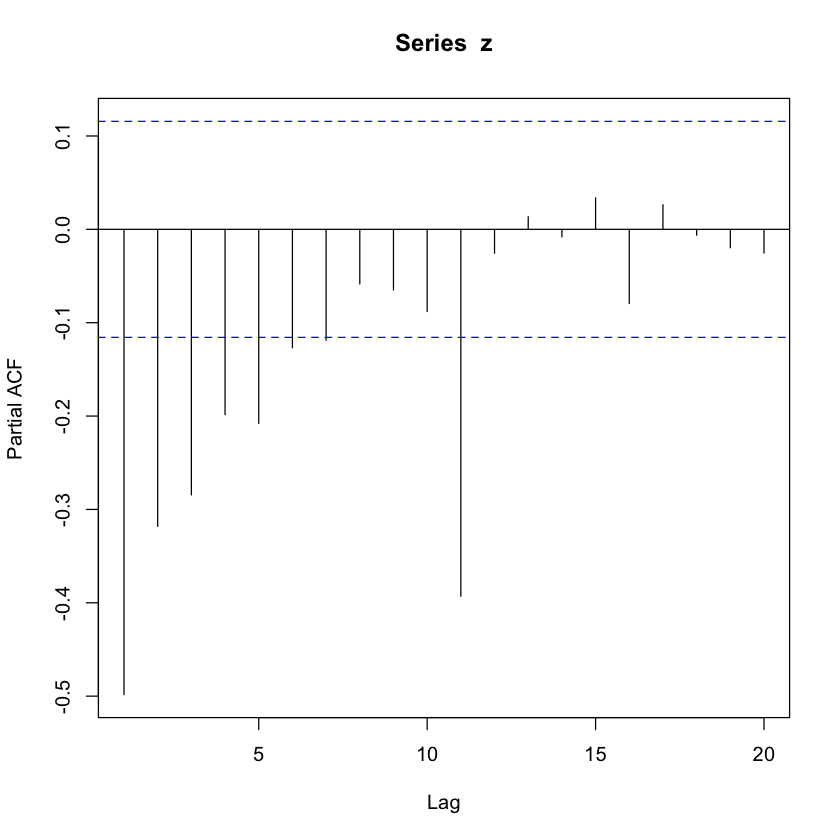

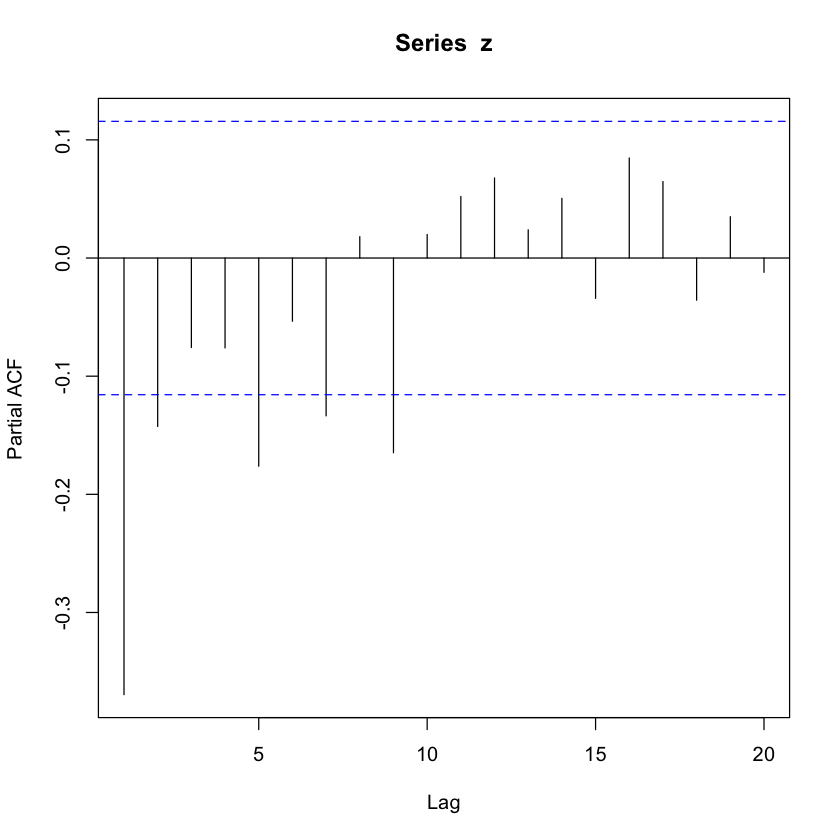

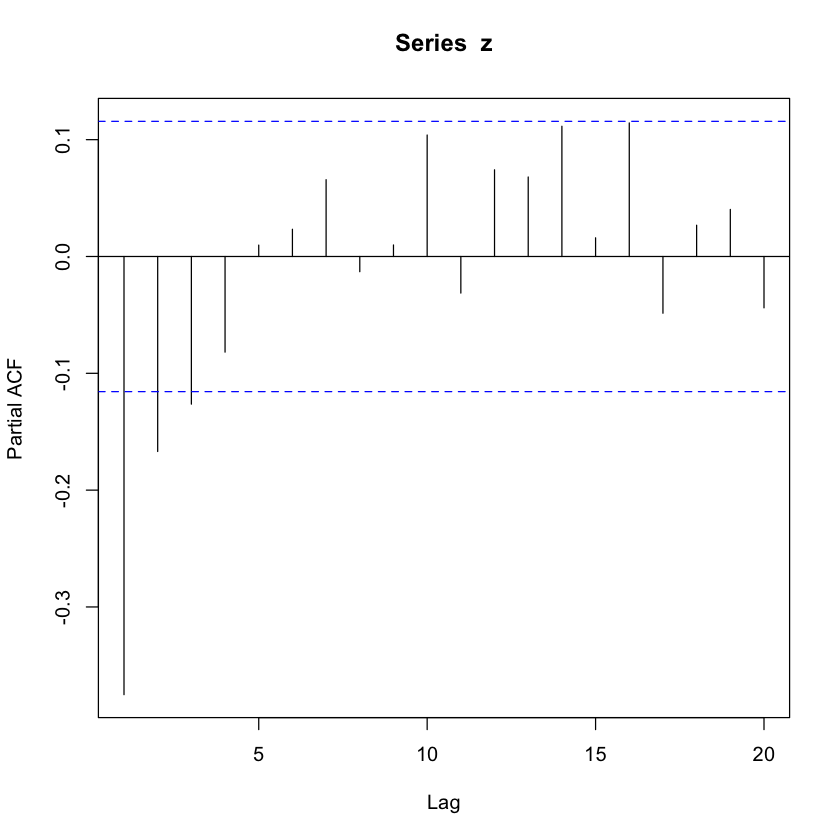

[1] "Office 1 3"


Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”


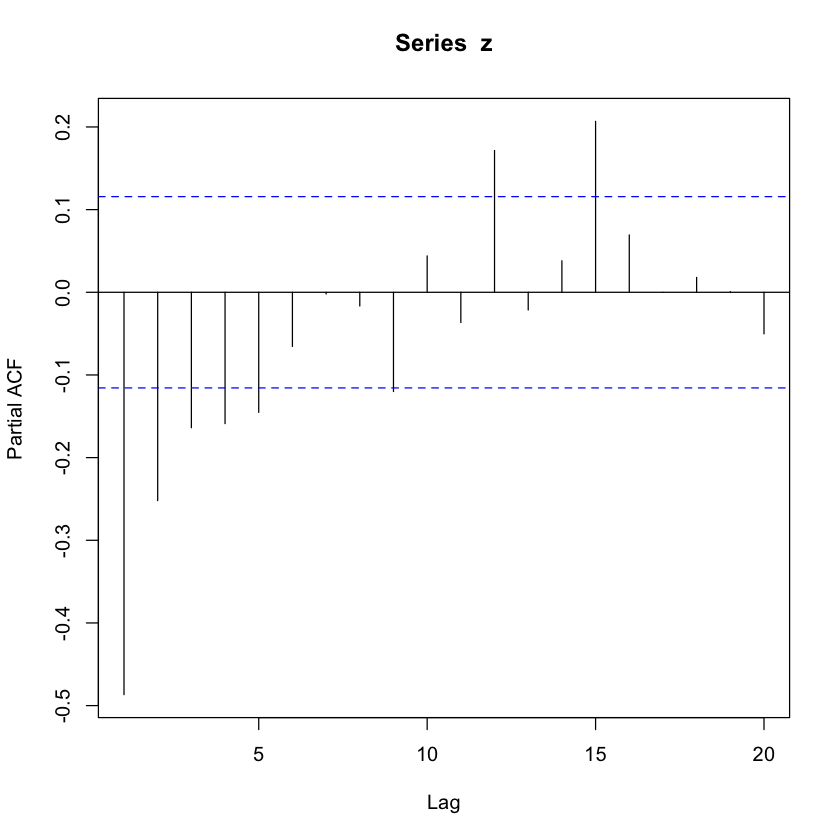

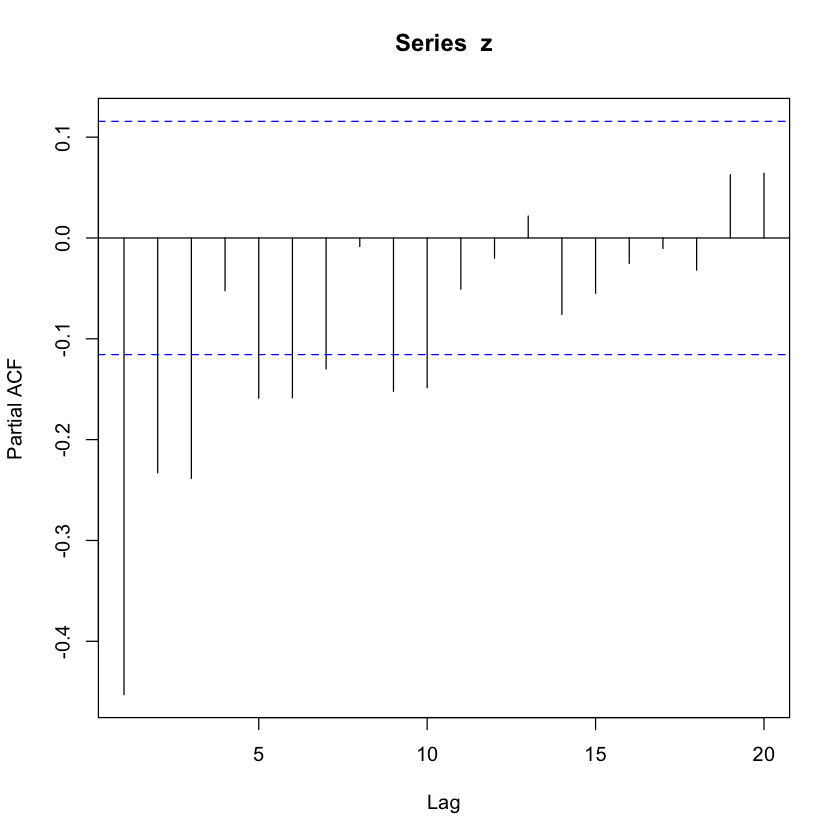

[1] "Outdoor Entertainment 2"


Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”


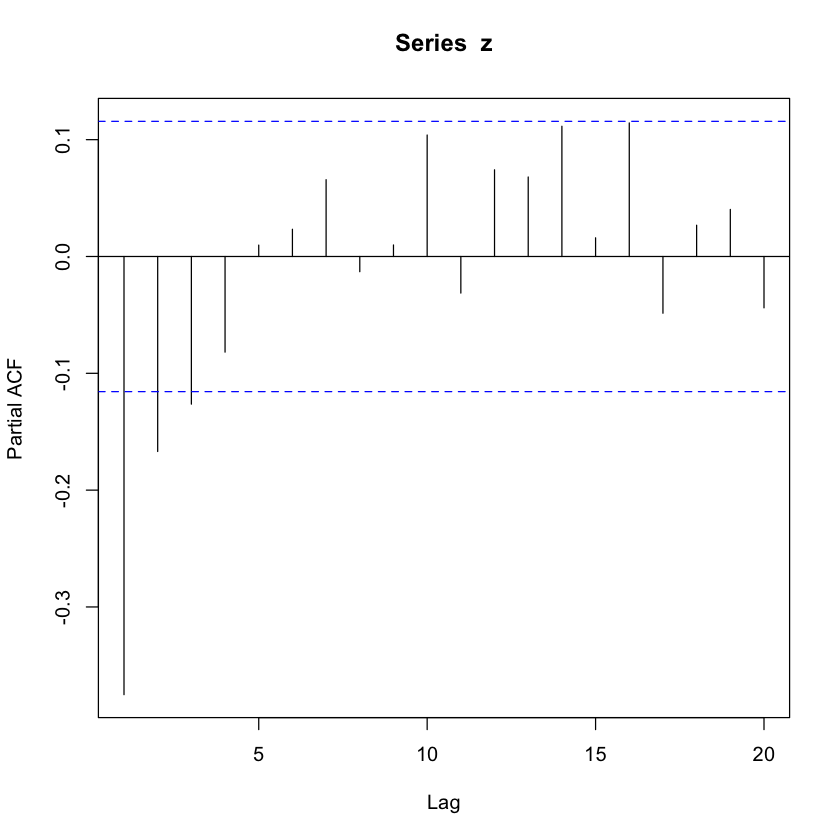

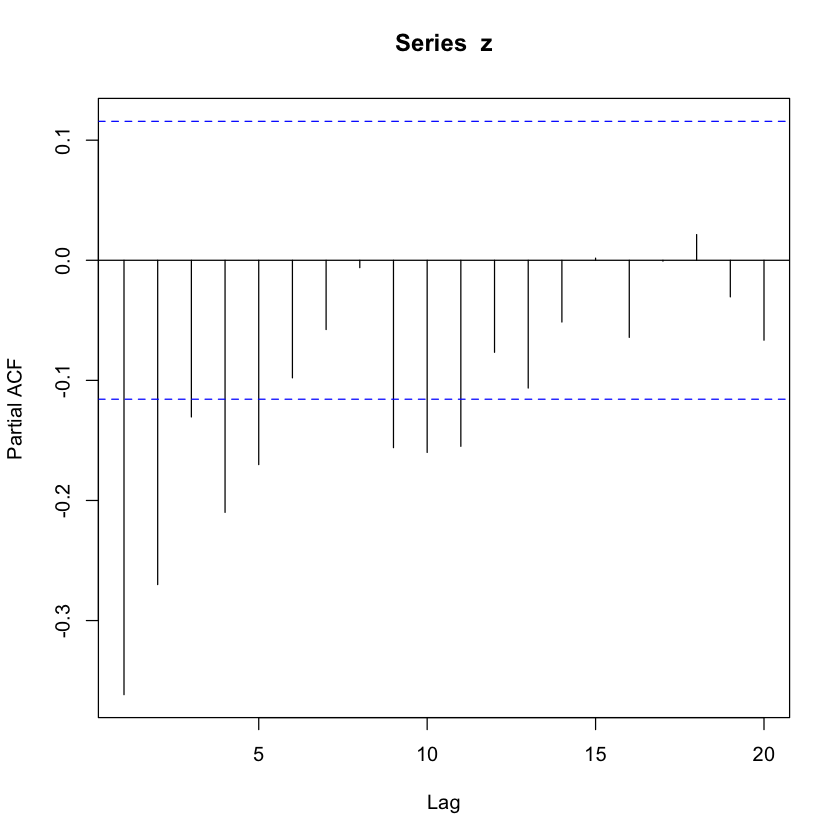

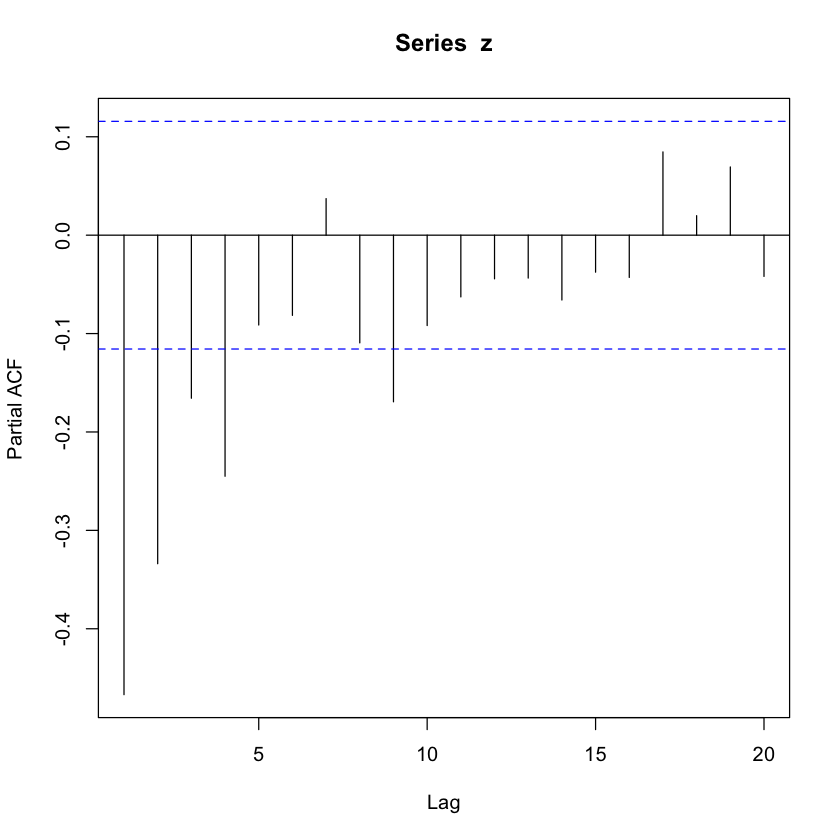

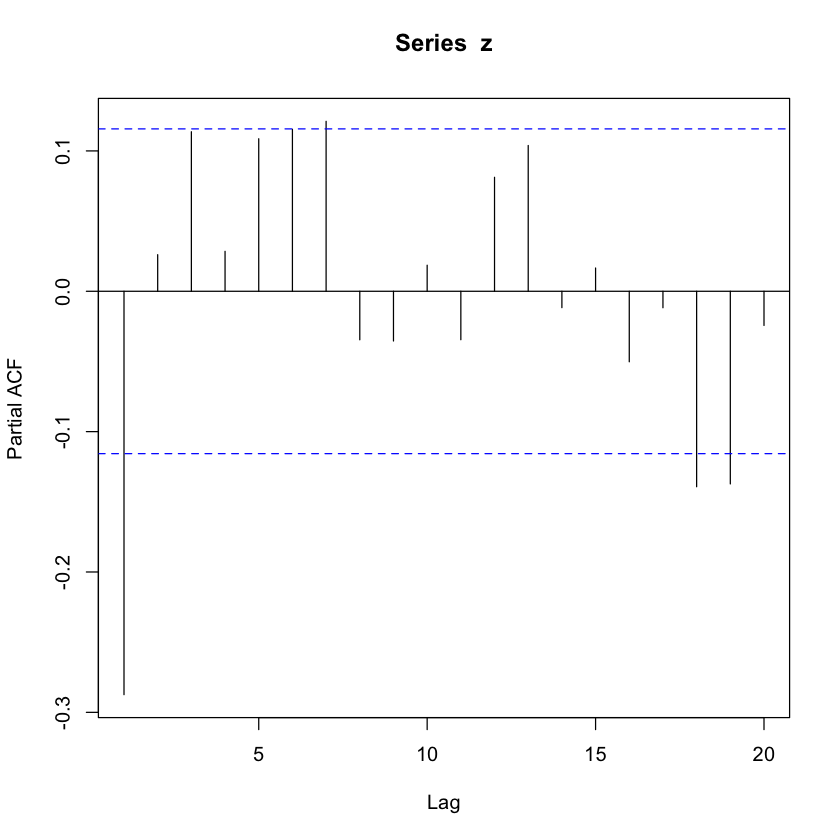

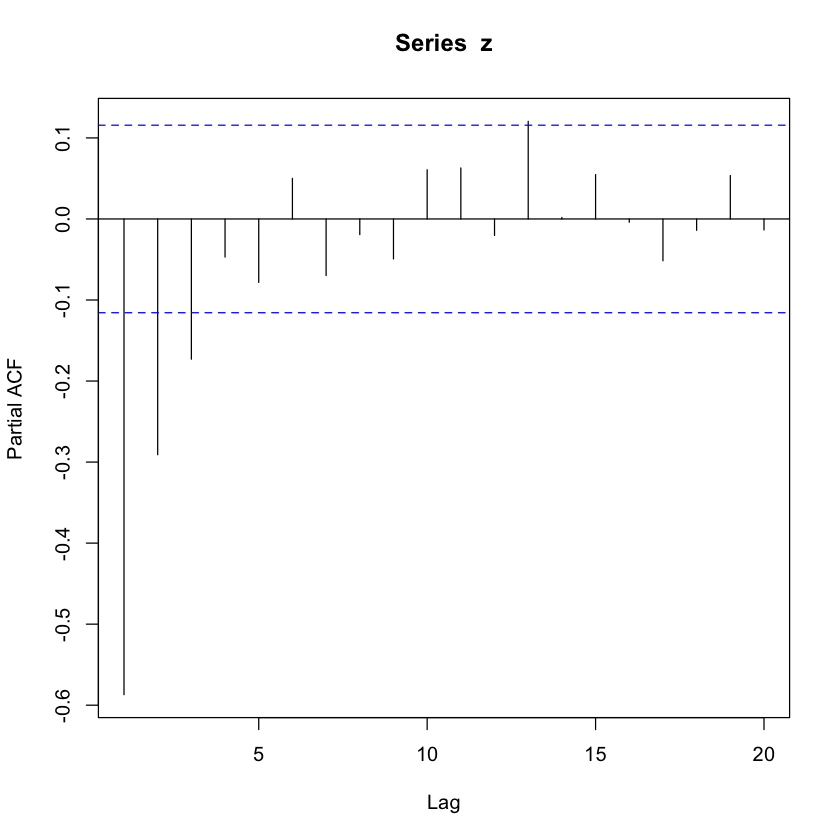

[1] "Place for Sports 4 1"


Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”


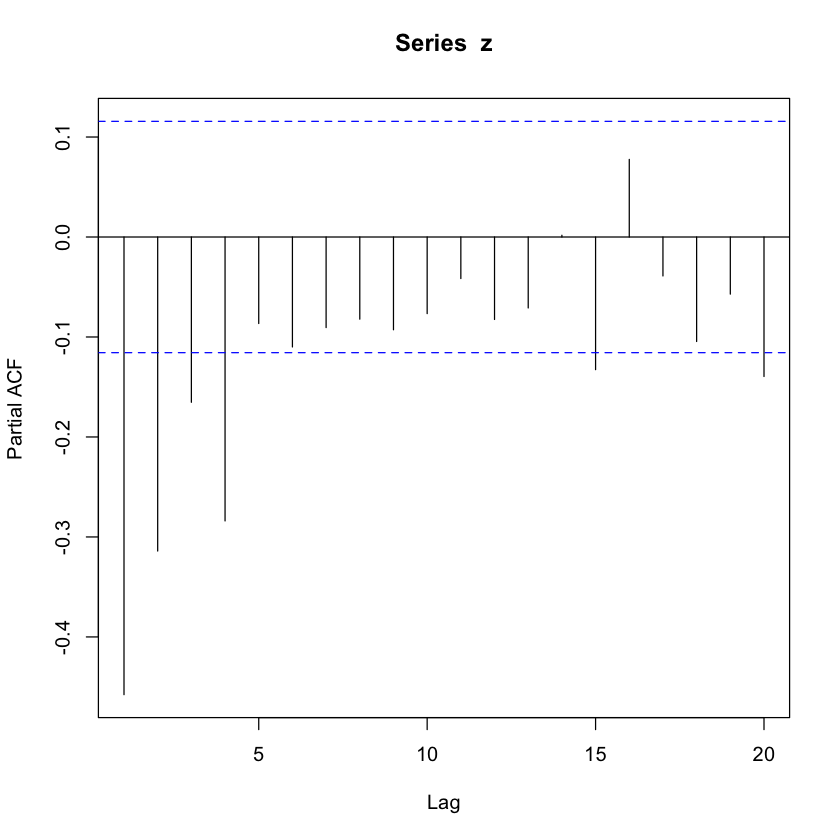

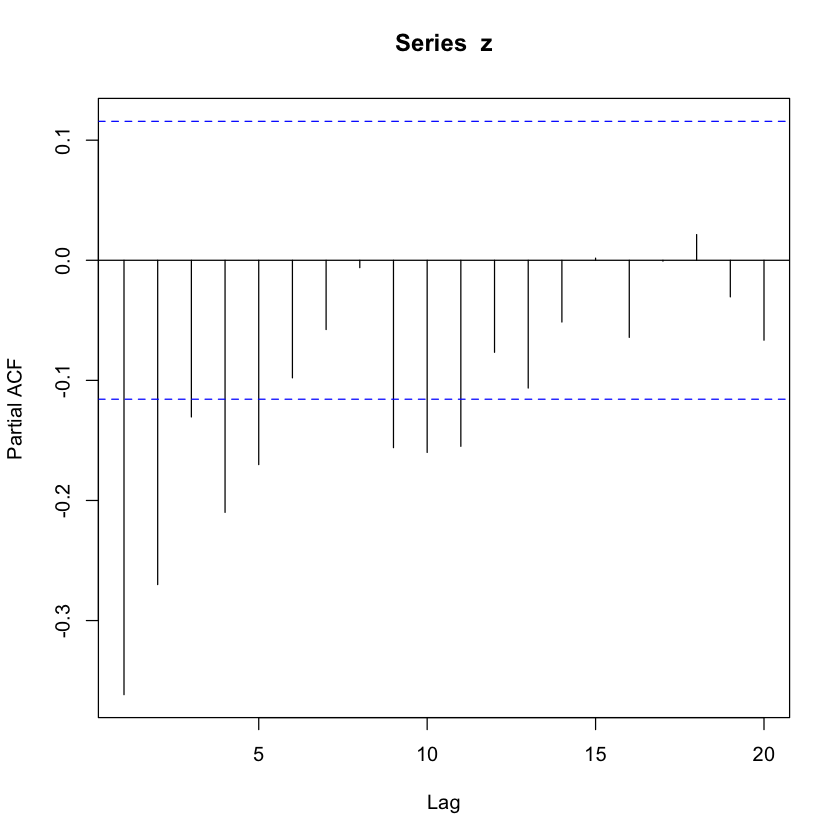

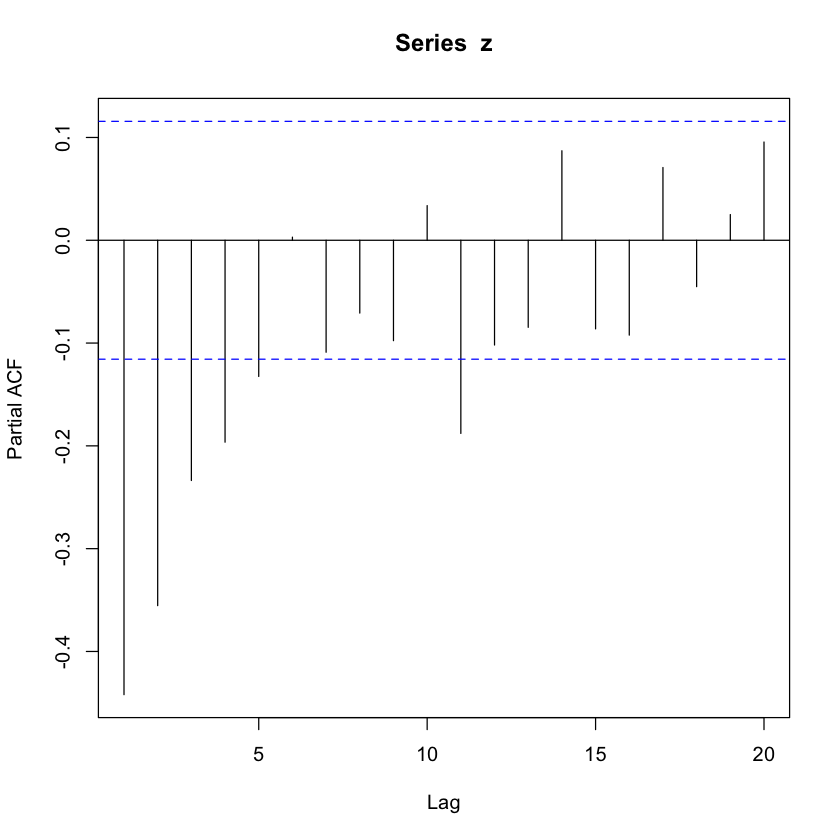

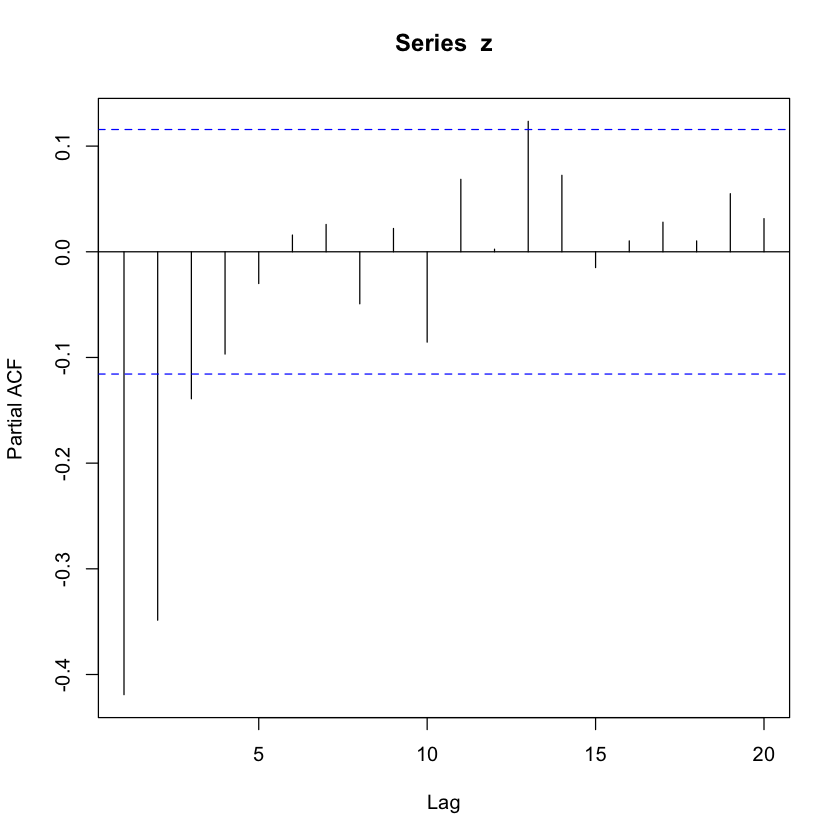

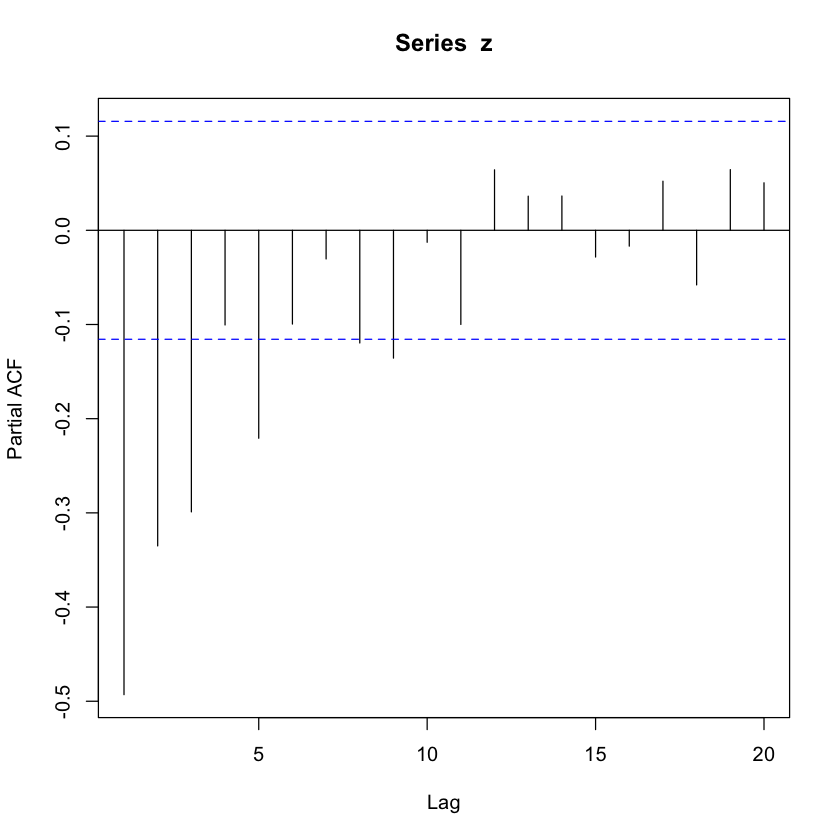

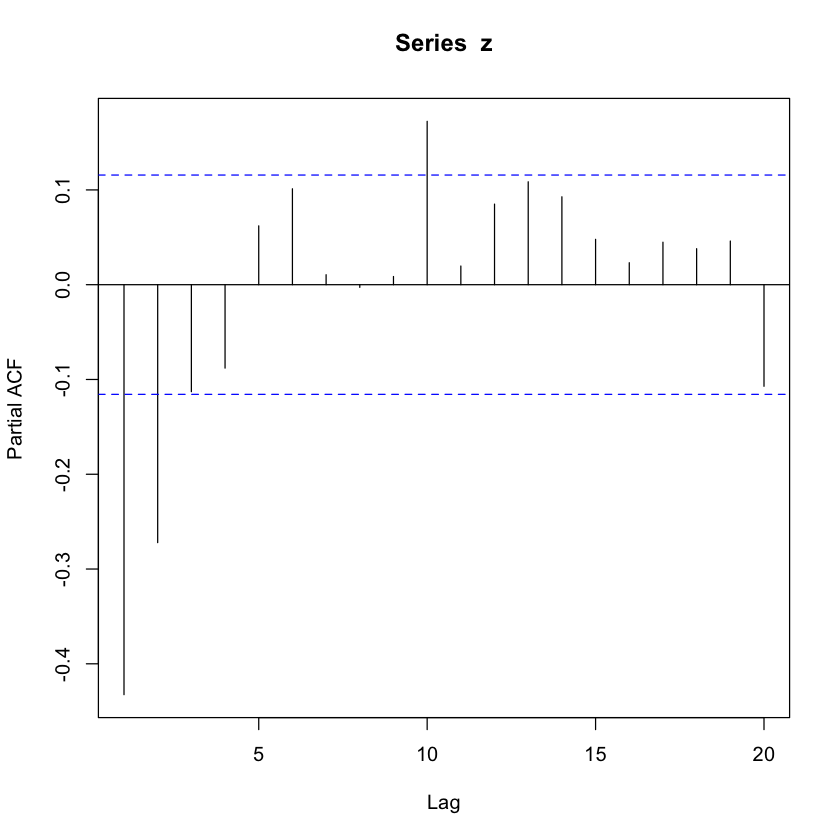

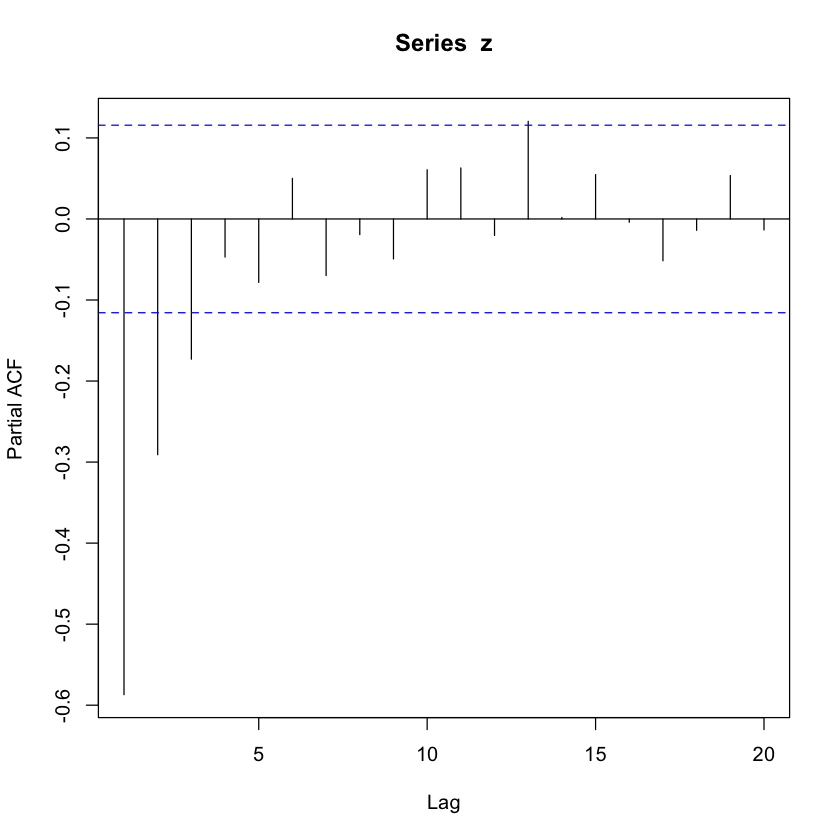

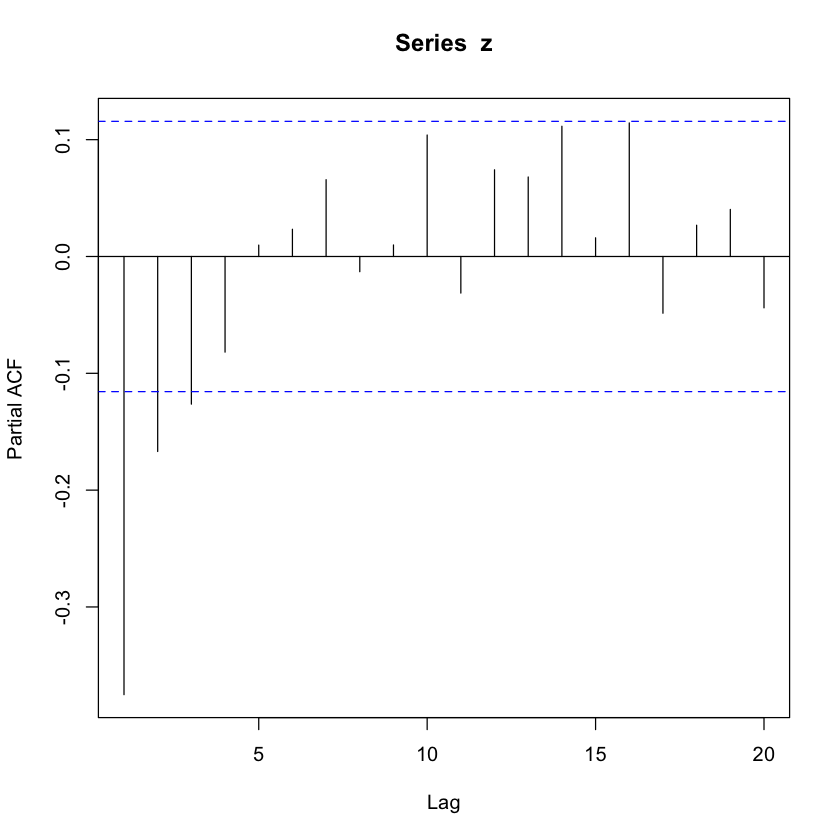

[1] "Residence 4 3 5"


Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”


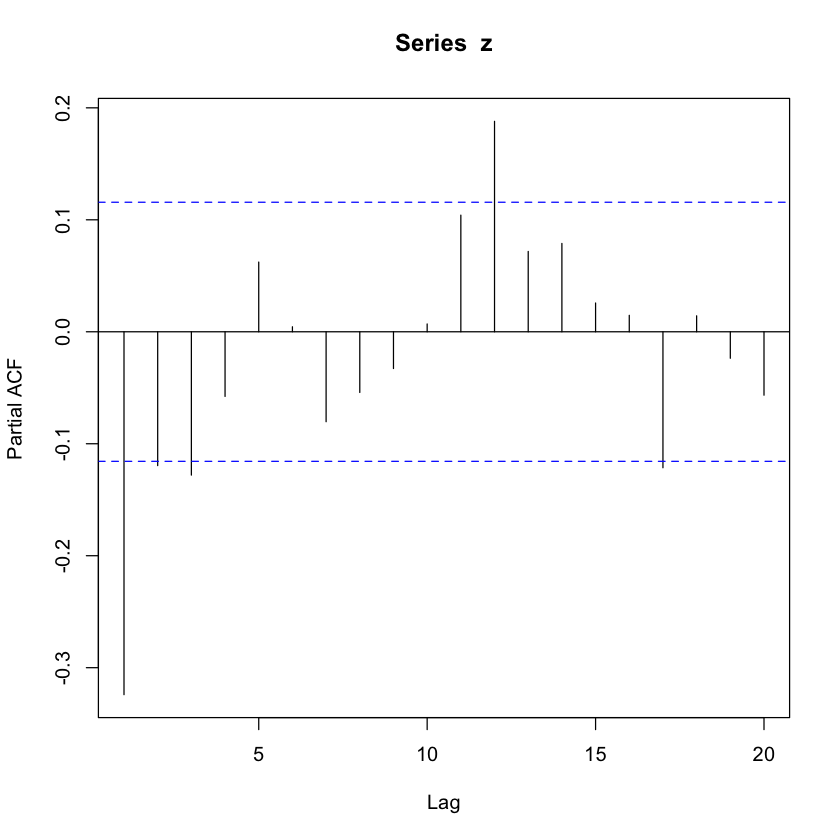

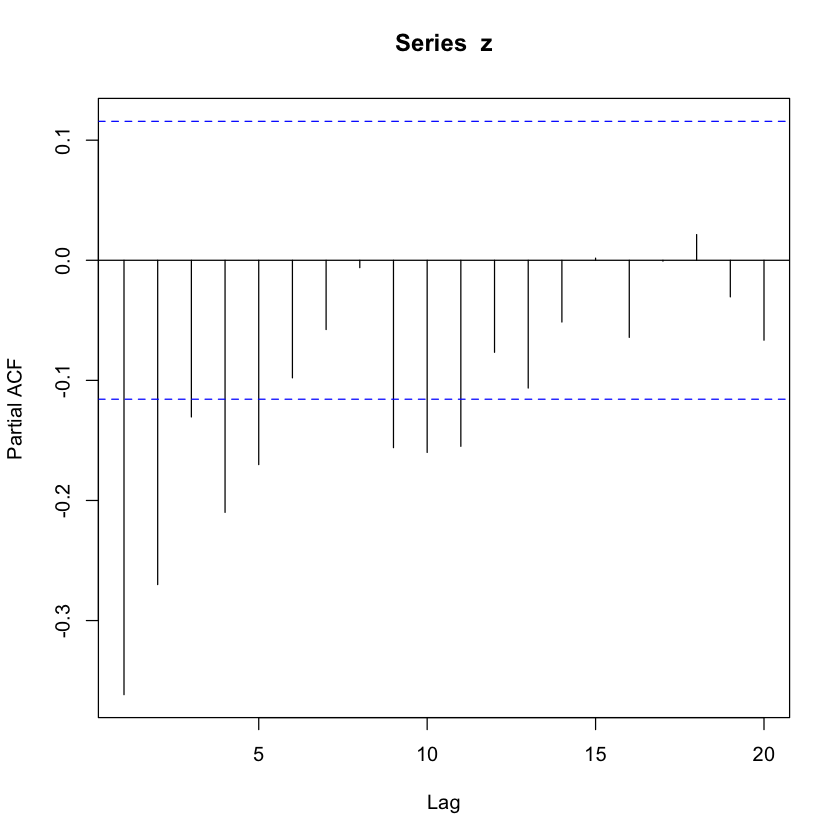

[1] "Rest Area 1"


Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”


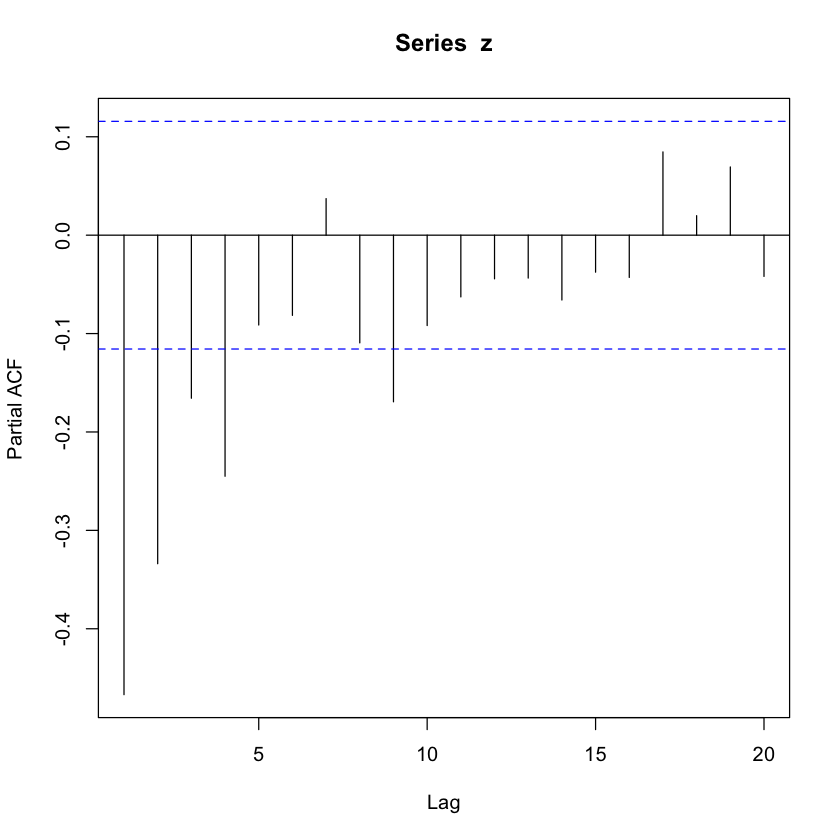

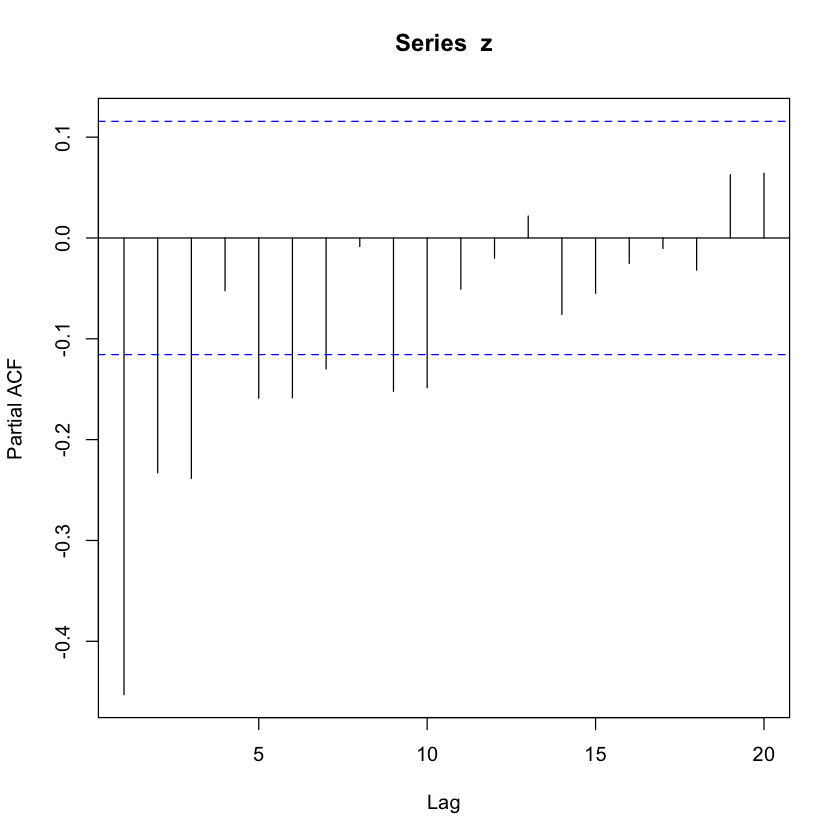

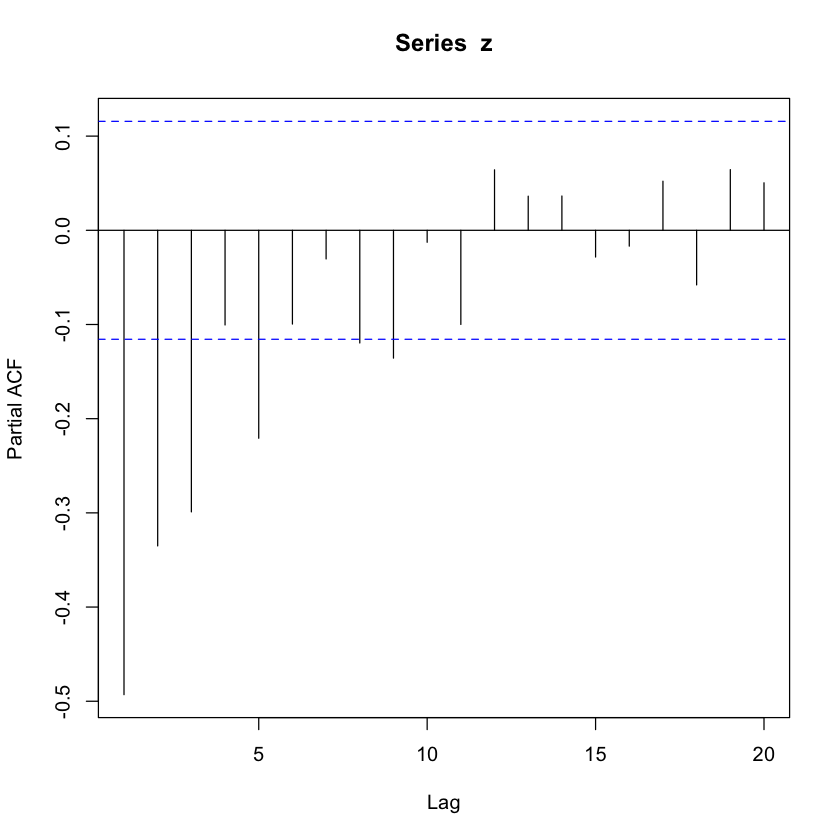

[1] "Restaurant 3"


Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”


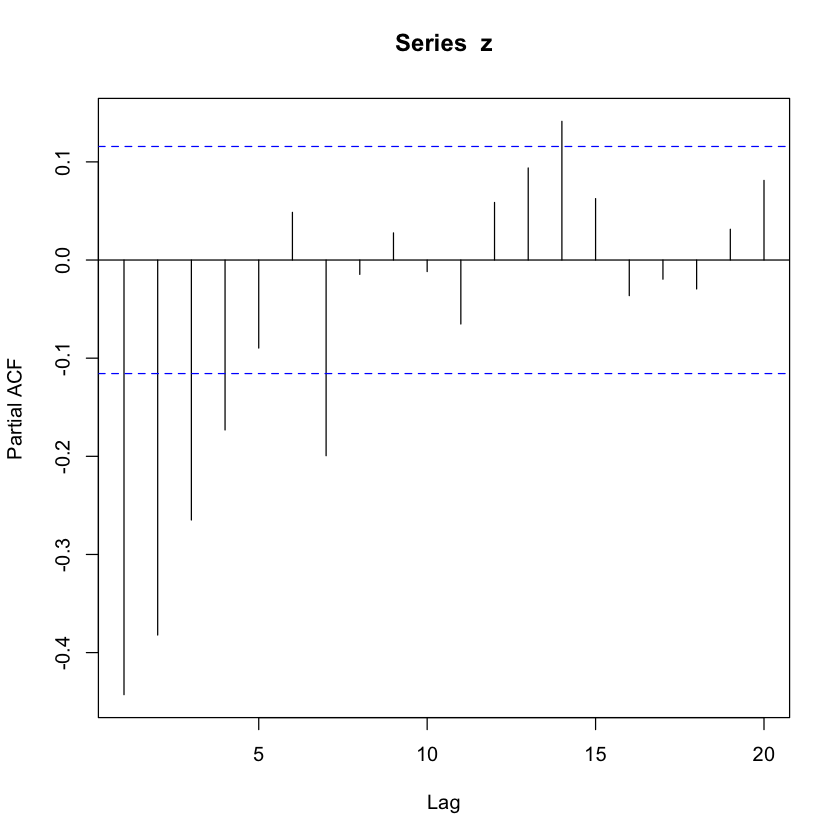

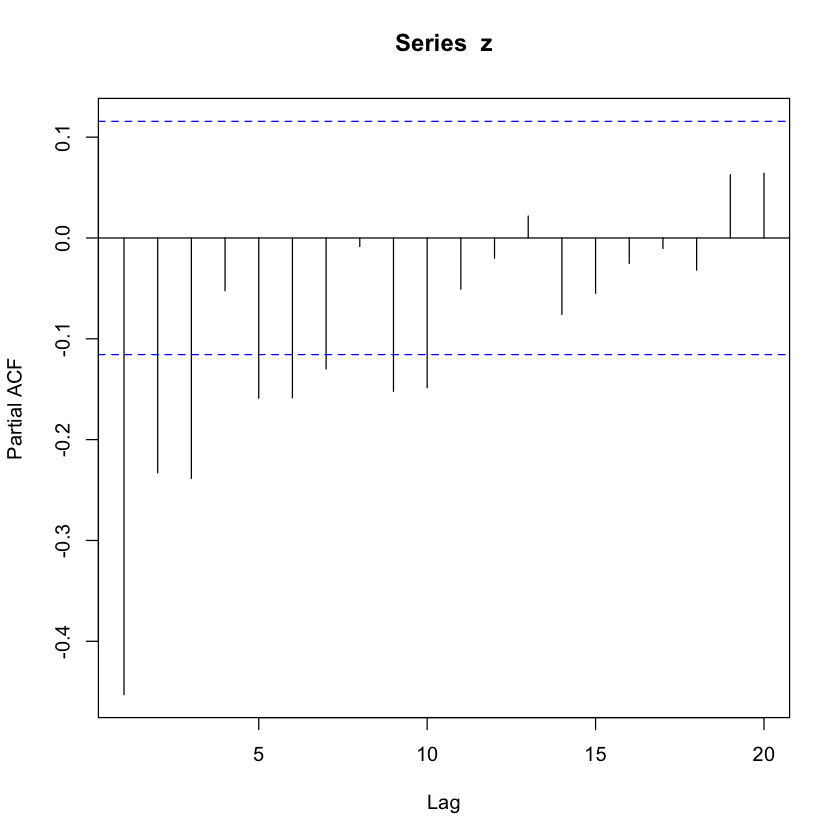

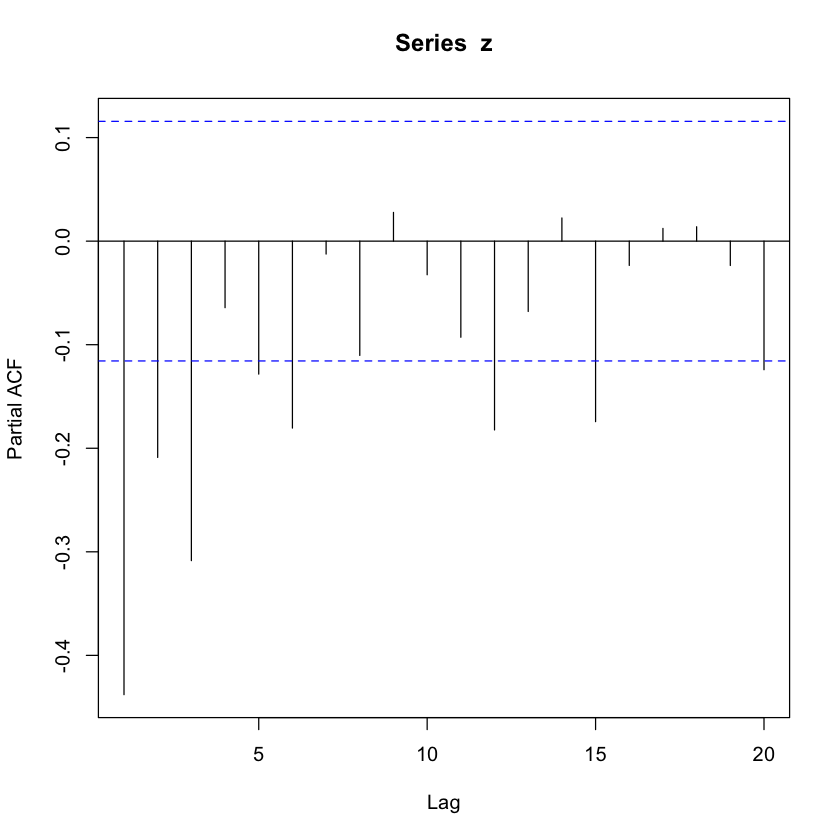

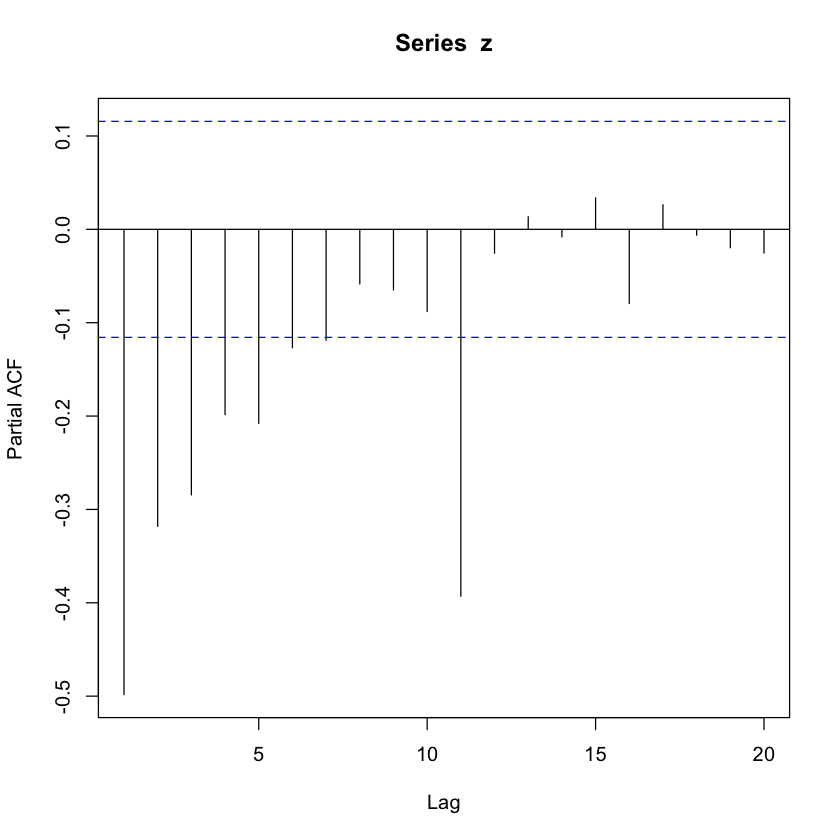

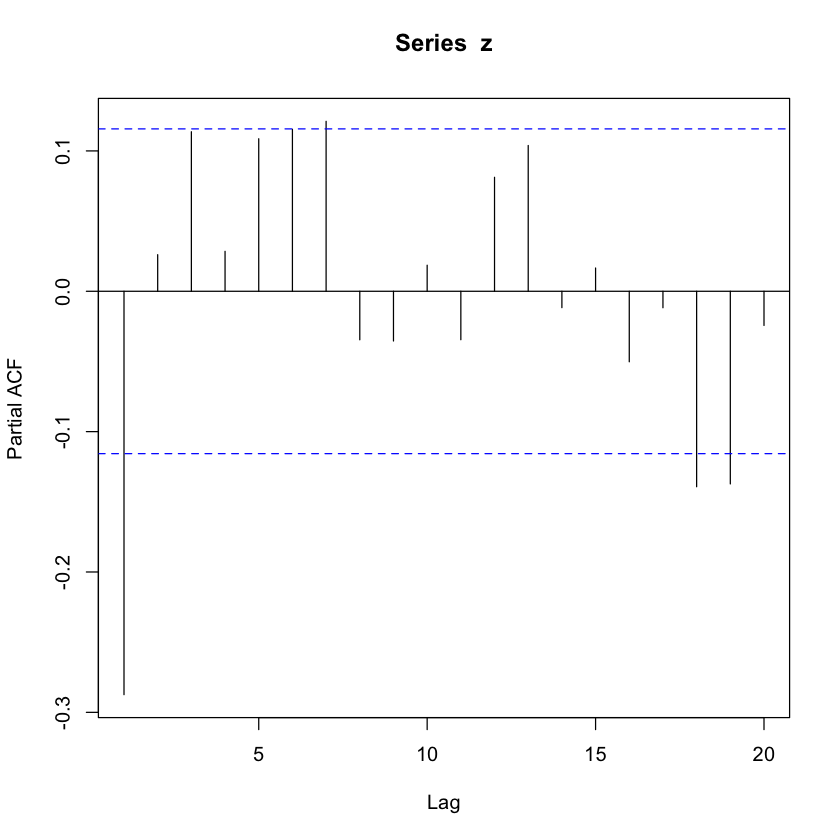

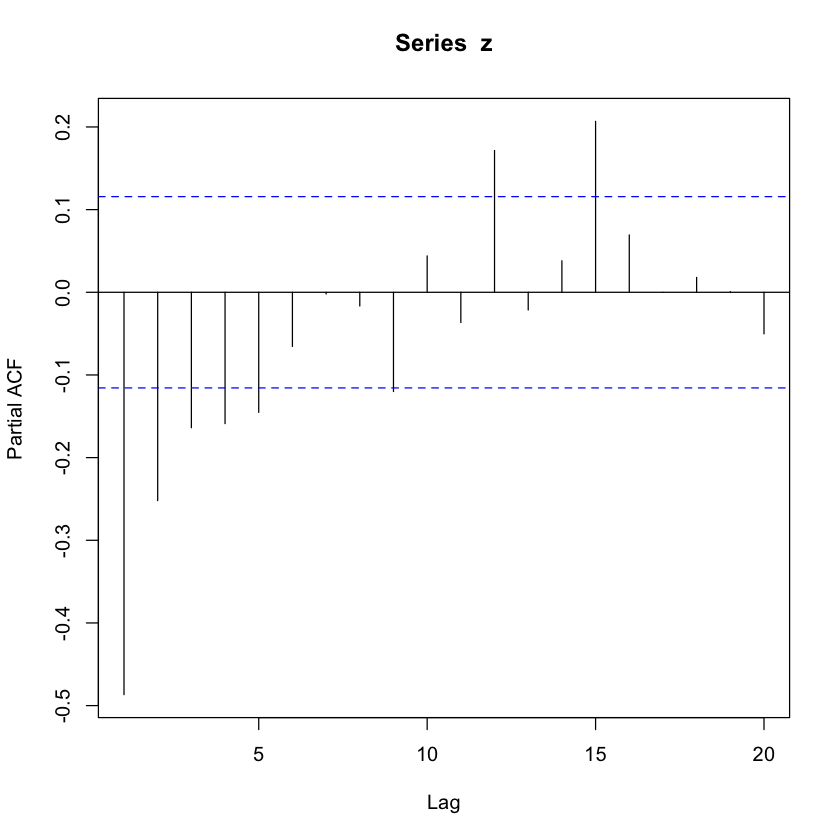

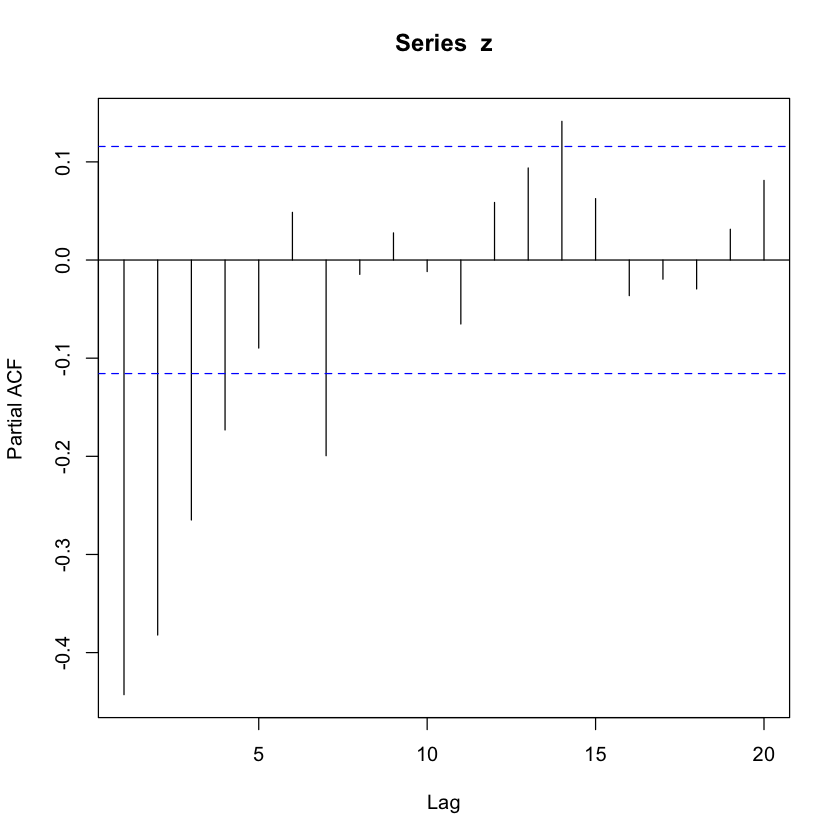

[1] "School 1 2"


Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”


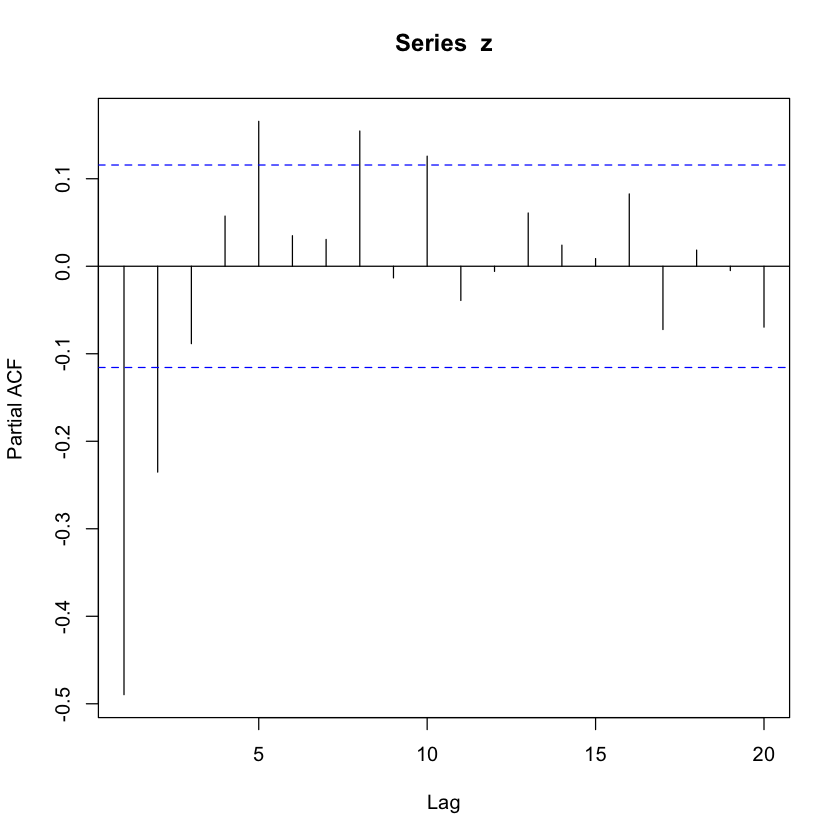

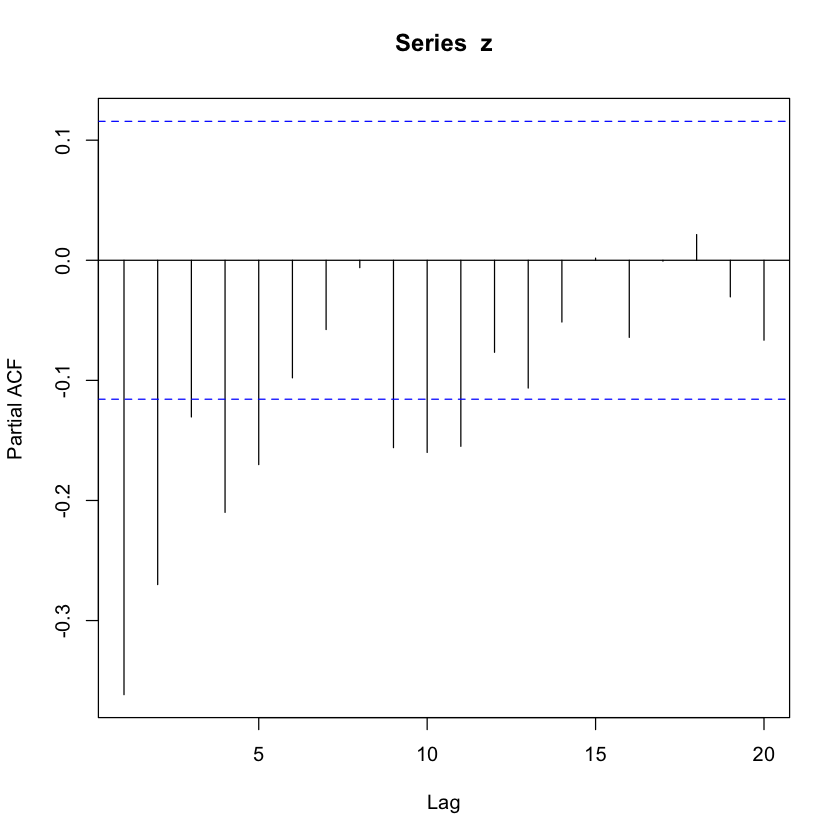

[1] "Smoke Shop 2"


Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”


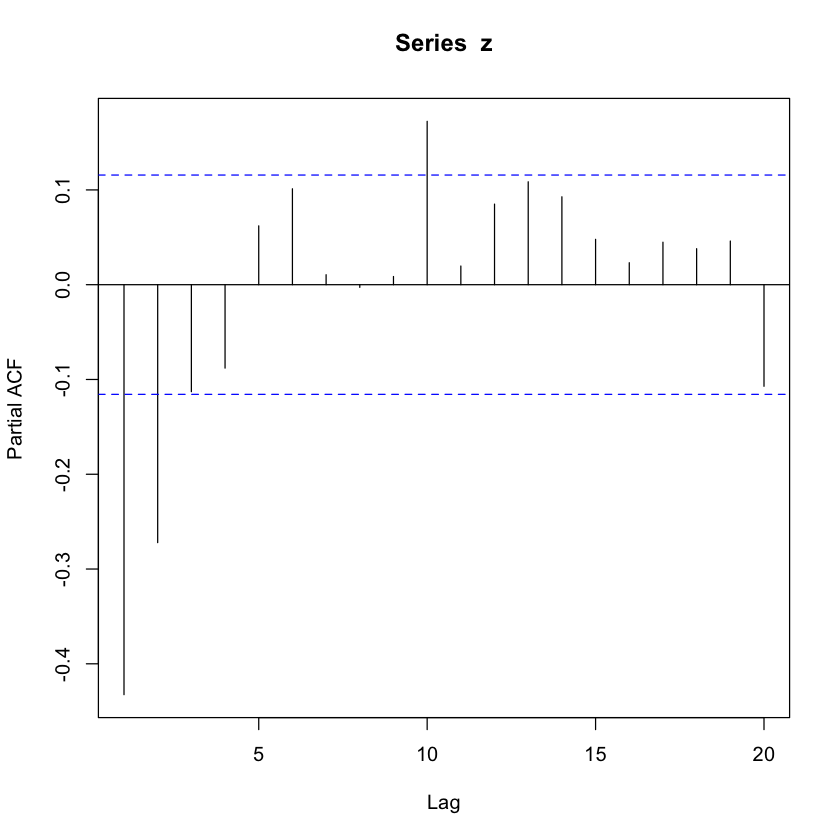

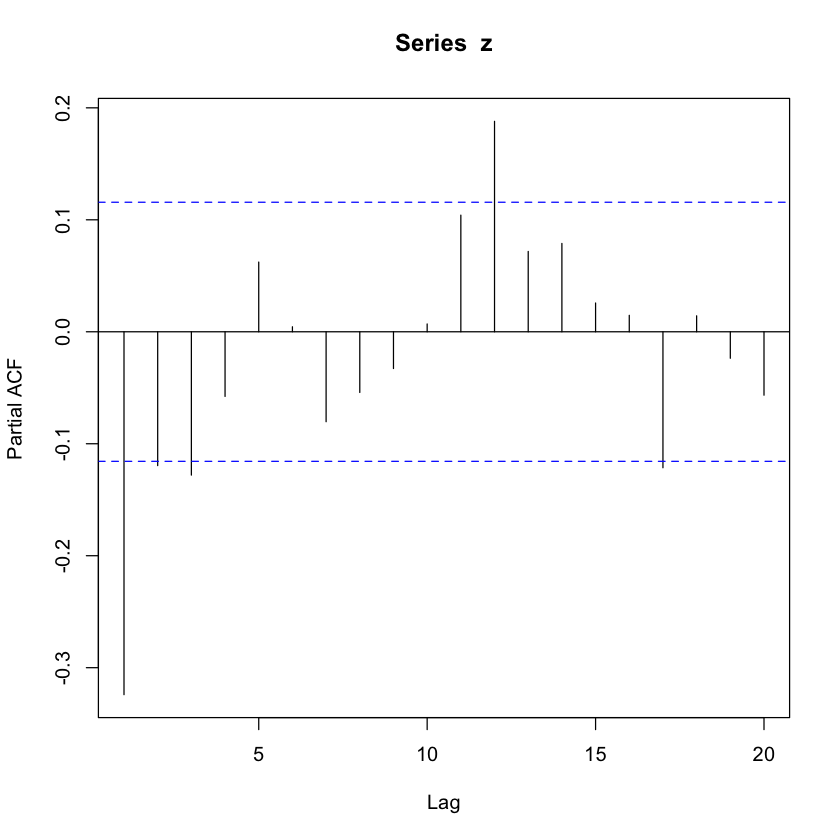

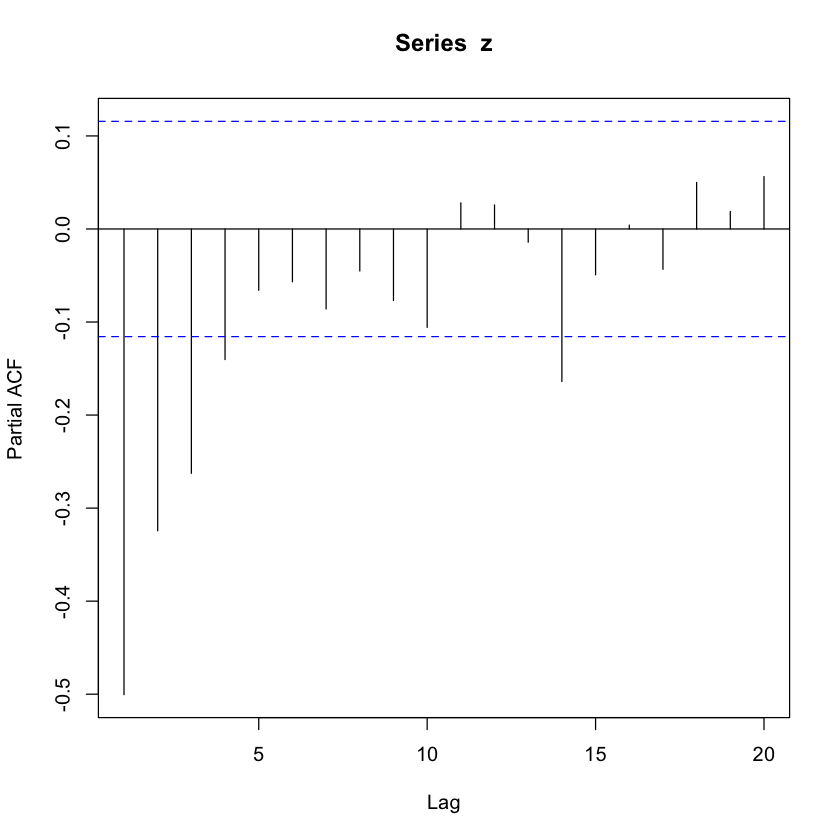

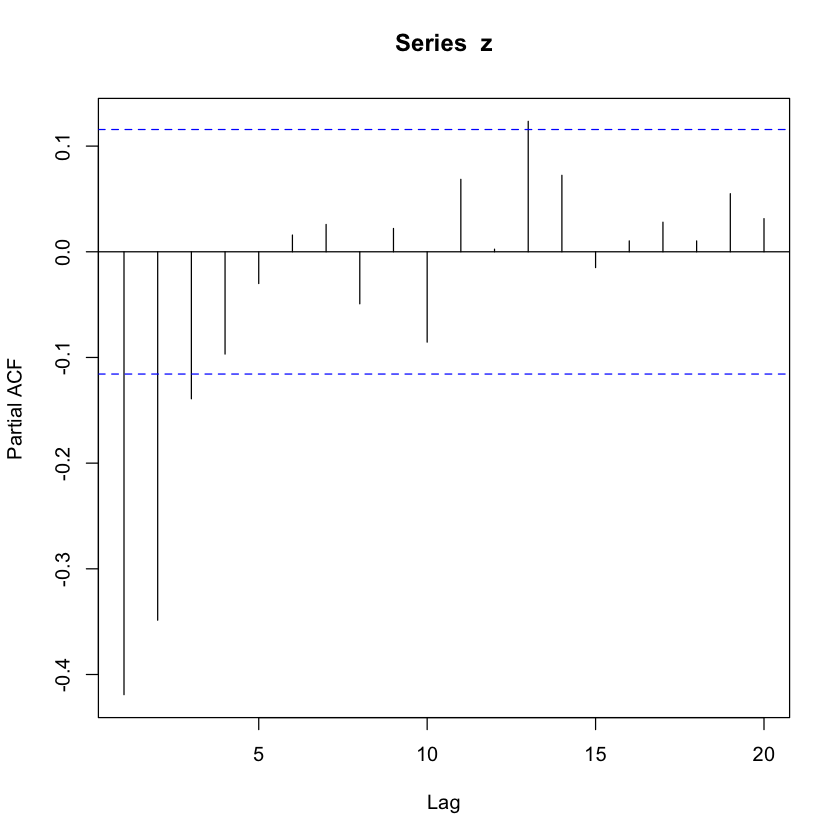

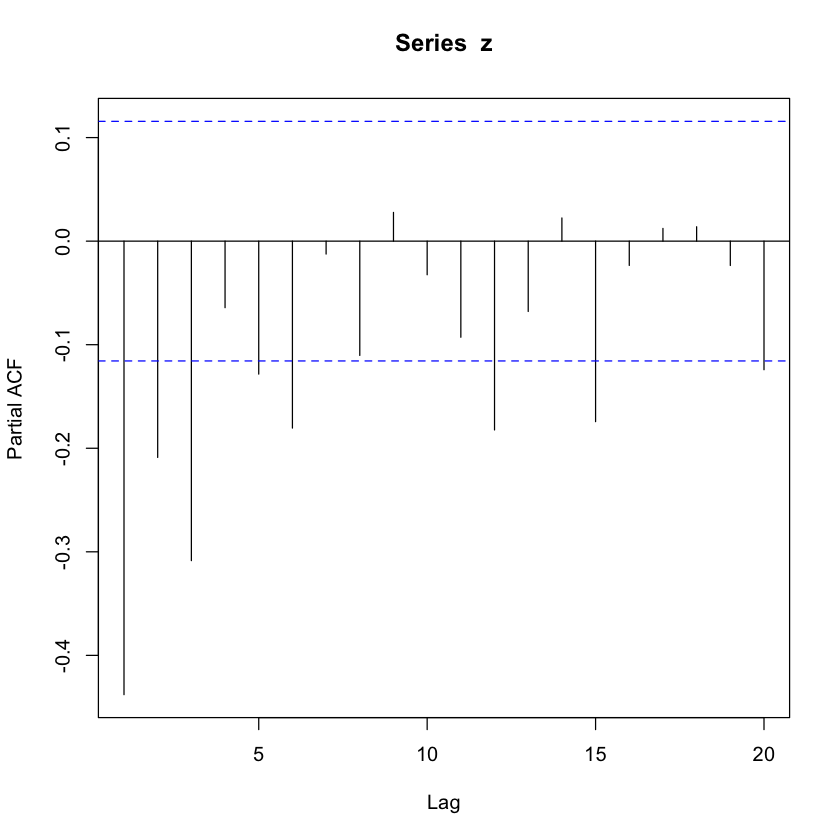

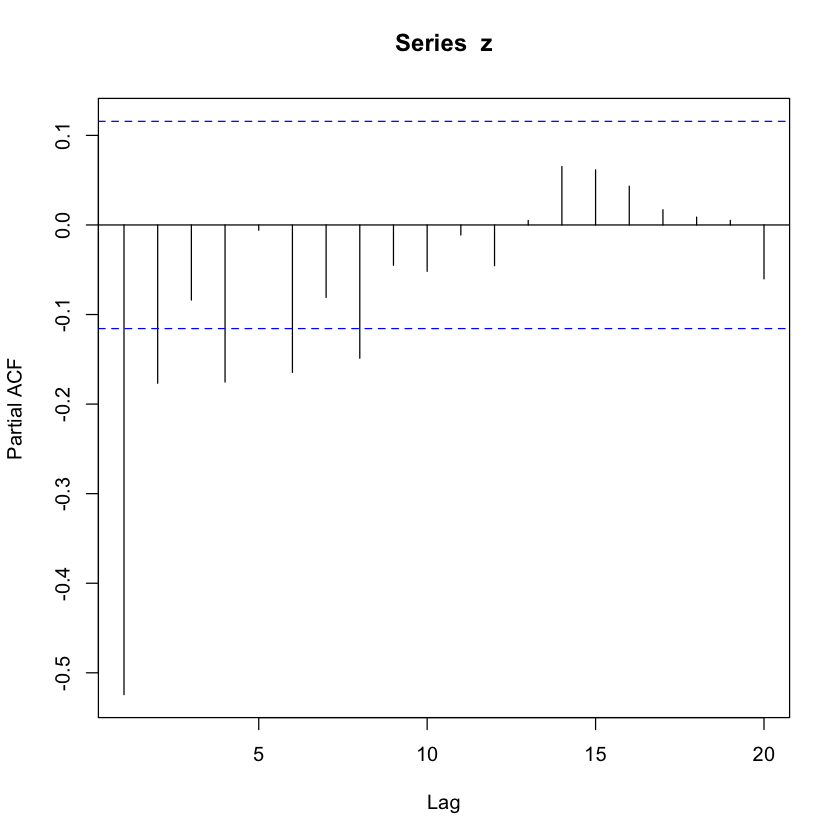

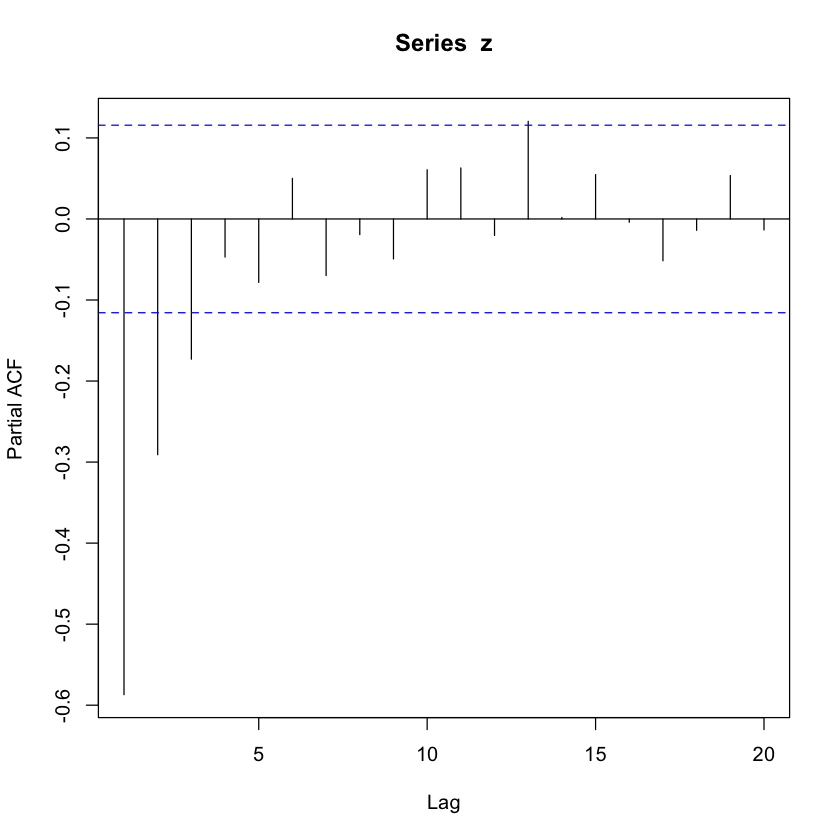

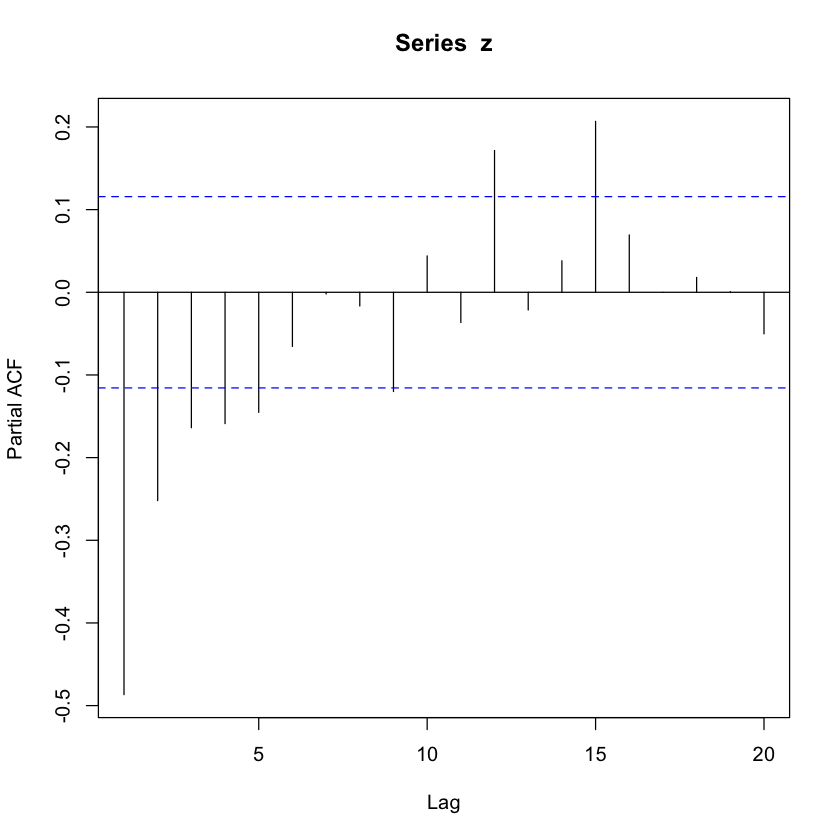

[1] "Store, Market & Fair 5 2 4 3"


Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”


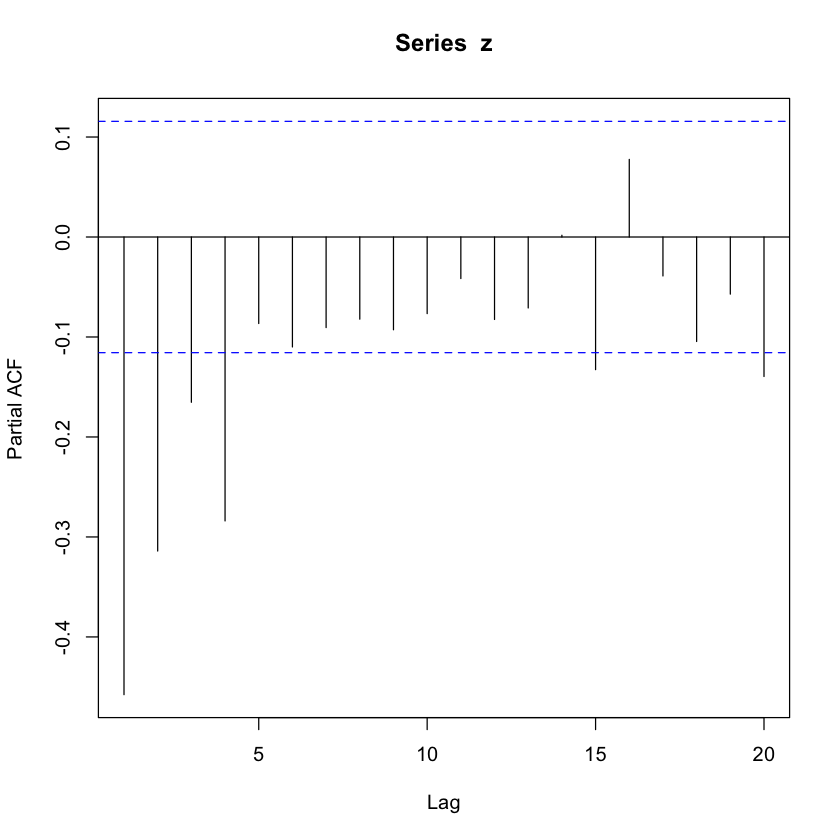

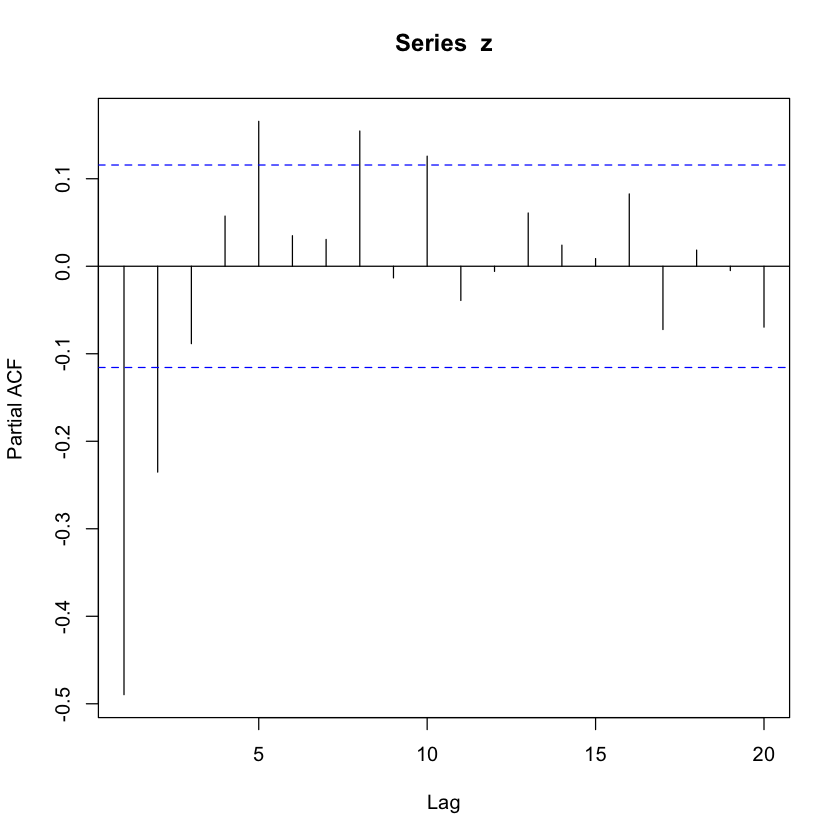

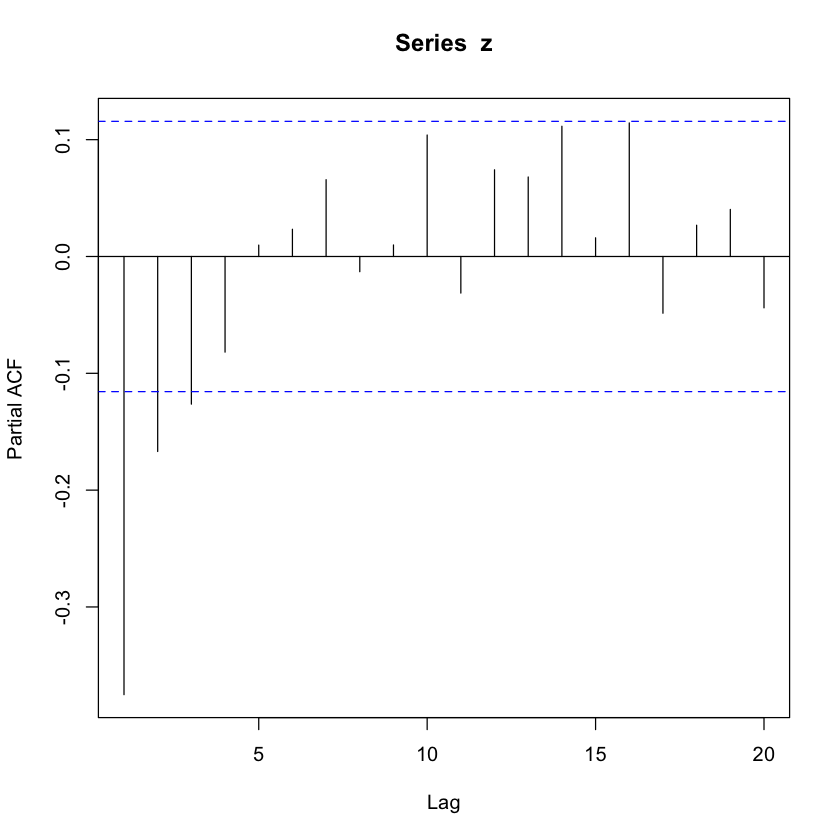

[1] "Transportation 1 2 3"


Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”


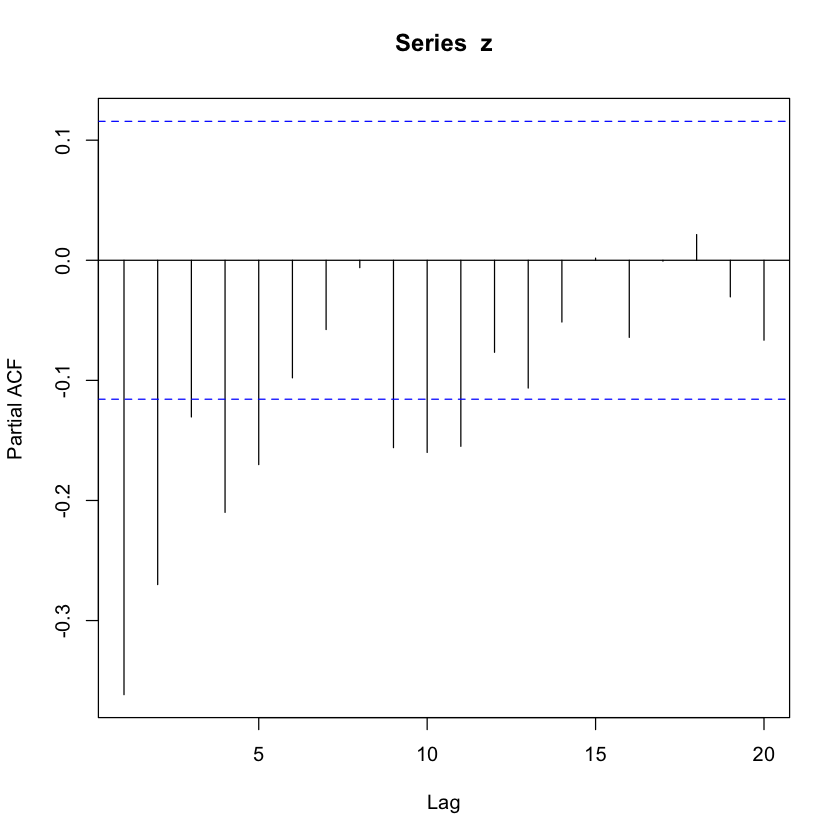

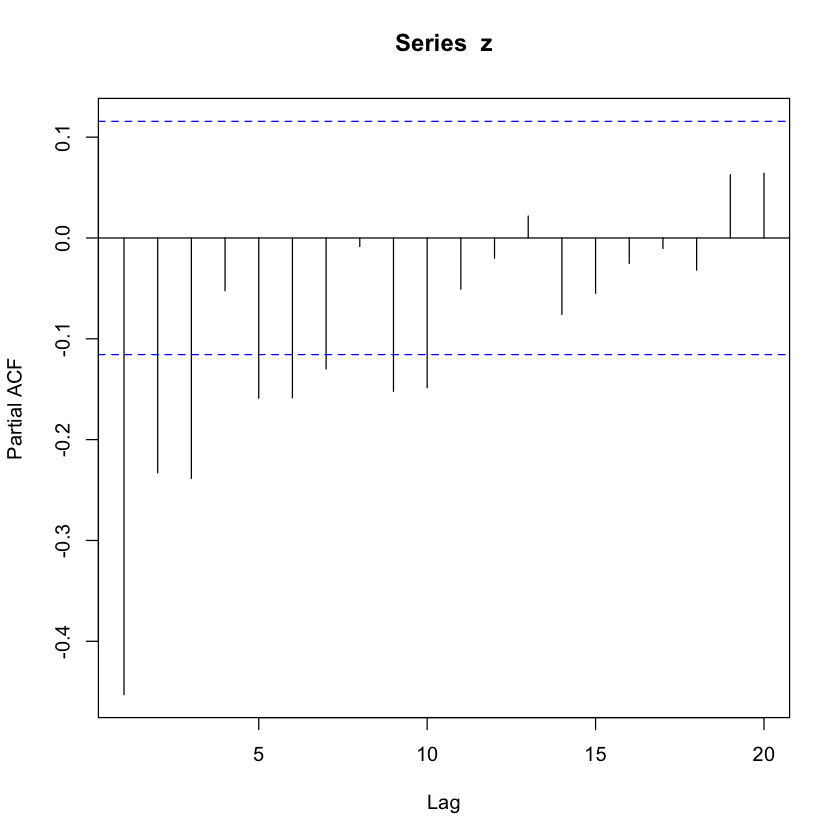

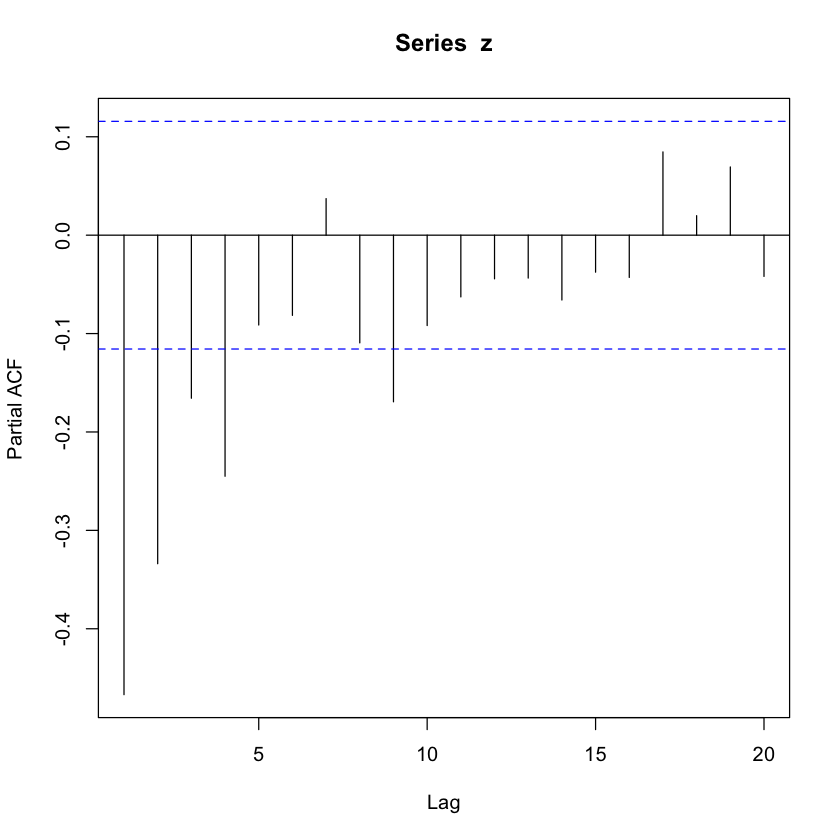

[1] "Travel-Related Place 2"


Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”


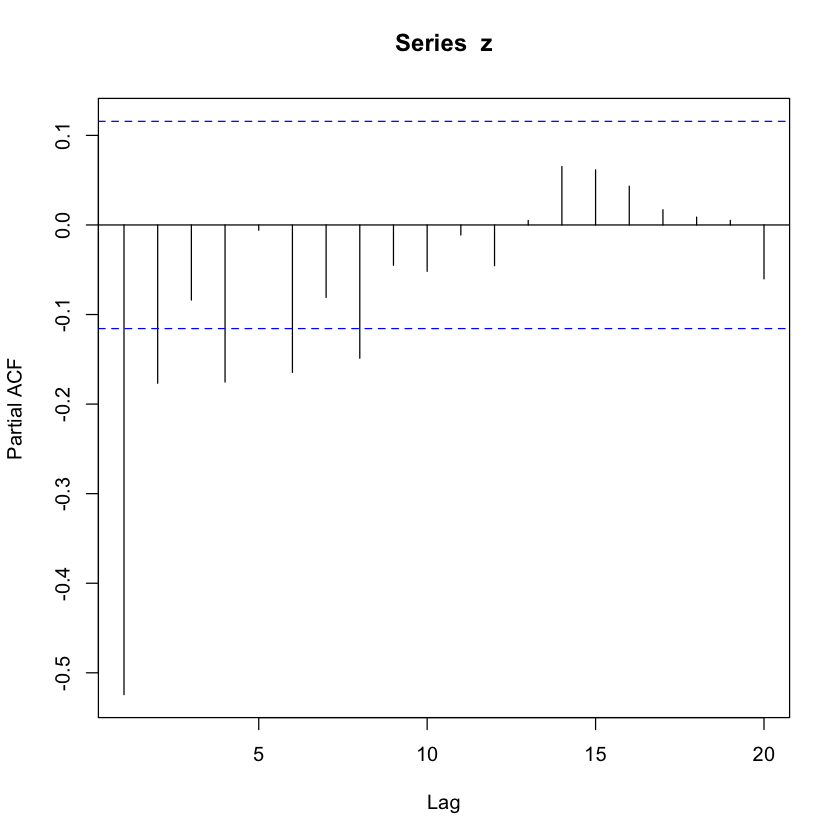

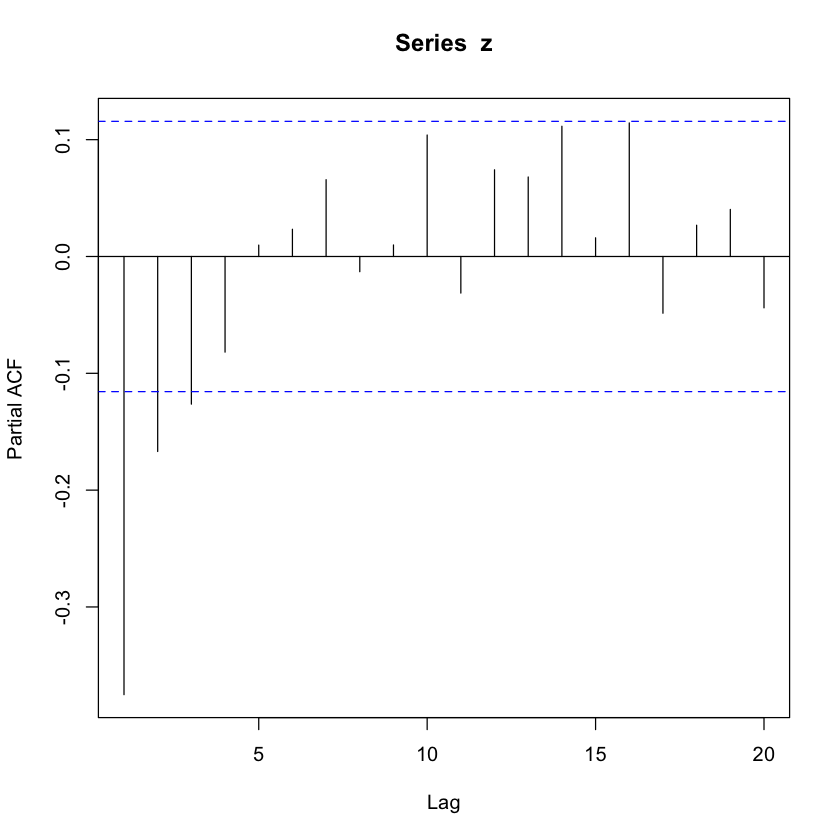

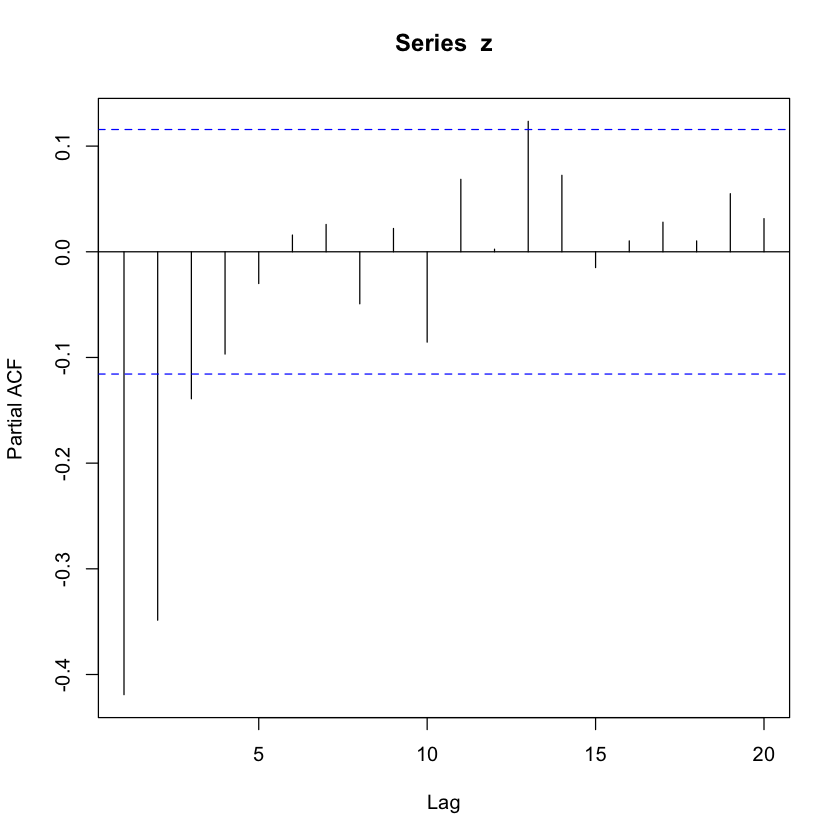

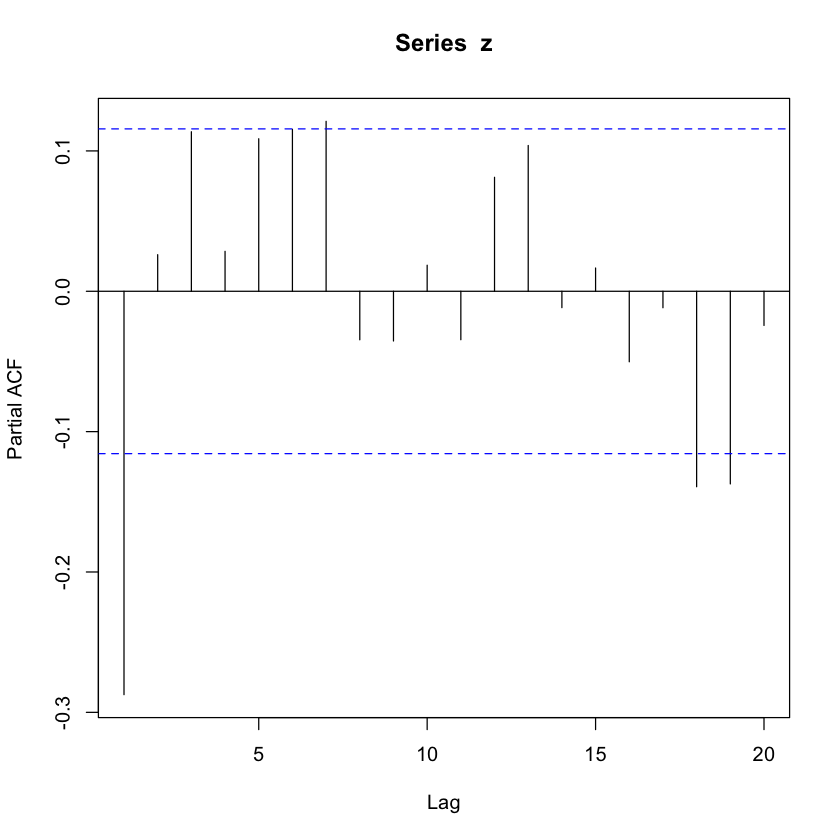

[1] "Vehicle-Related Place 1"


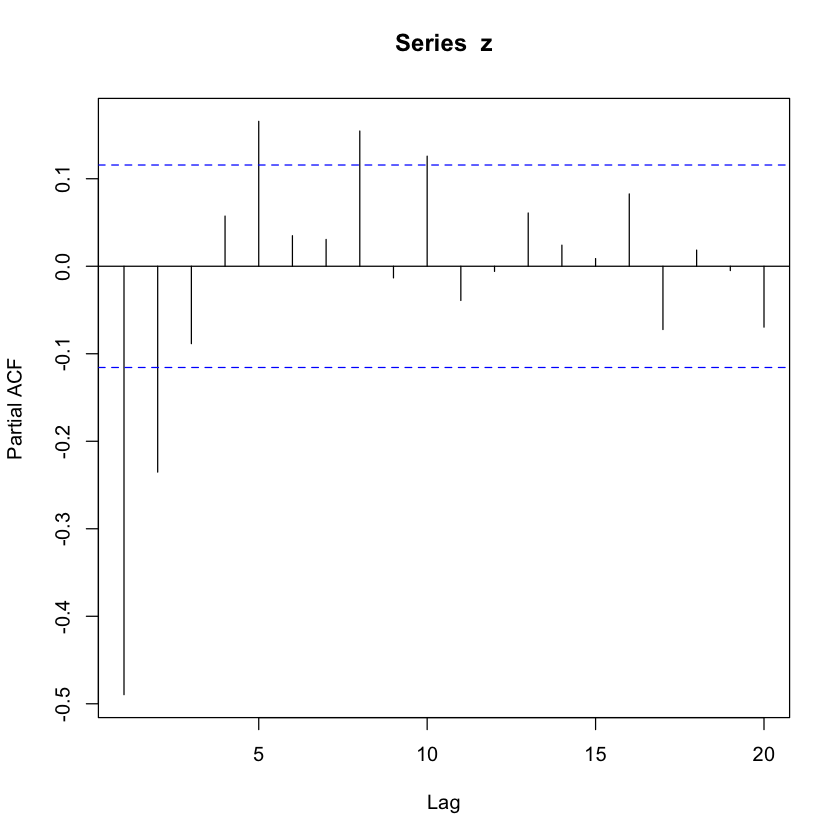

In [44]:
result = ""
for (pattern in patterns){
    a <- "/Users/suhong/Desktop/UROP_Data/UROP/FourSquare/dataset_tsmc2014/"
    c <- ".csv"
    path <- paste(a,pattern,c,sep="")
    data <- read.csv(path)
    data <- data[1:287,-1]
    n <- dim(data)[2]
    X = data[1:287,-n]
    y = data[1:287,n]
    for (i in 1:n){
    p <- adf.test(data[1:287,i])$p.value
    if(p>0.05){
        print(pattern)
        print(i)
        print("oh no!")
    }
}
    if(dim(data)[2]==2){direct=c(1)}
    else{direct <- filter_cause(X,y)}
    s <- concat(pattern,direct)
    print(s)
    result <- paste(result,s,sep=";")

}

In [45]:
result

[1] ";Convention Center 2 3;Electronics 4 2 5;Factory 5;Food & Snack 7 6 3 5;General Education Place 4 5 7;History, Museum & Arts 3 4;Hotel 1;Indoor Entertainment 5;Medical-Related Place 3 4;Neighborhood 4 5;Office 1 3;Outdoor Entertainment 2;Place for Sports 4 1;Residence 4 3 5;Rest Area 1;Restaurant 3;School 1 2;Smoke Shop 2;Store, Market & Fair 5 2 4 3;Transportation 1 2 3;Travel-Related Place 2;Vehicle-Related Place 1"

In [156]:
data <- read.csv("./dataset_tsmc2014/convention_center.csv")
data <- data[1:287,-1]

In [157]:
n <- dim(data)[2]
X = data[1:287,-n]
y = data[1:287,n]

In [21]:
# for (i in 1:n){
#     p <- adf.test(data[1:287,i])$p.value
#     if(p>0.05){
#         print(i)
#         print("oh no!")
#     }
# }

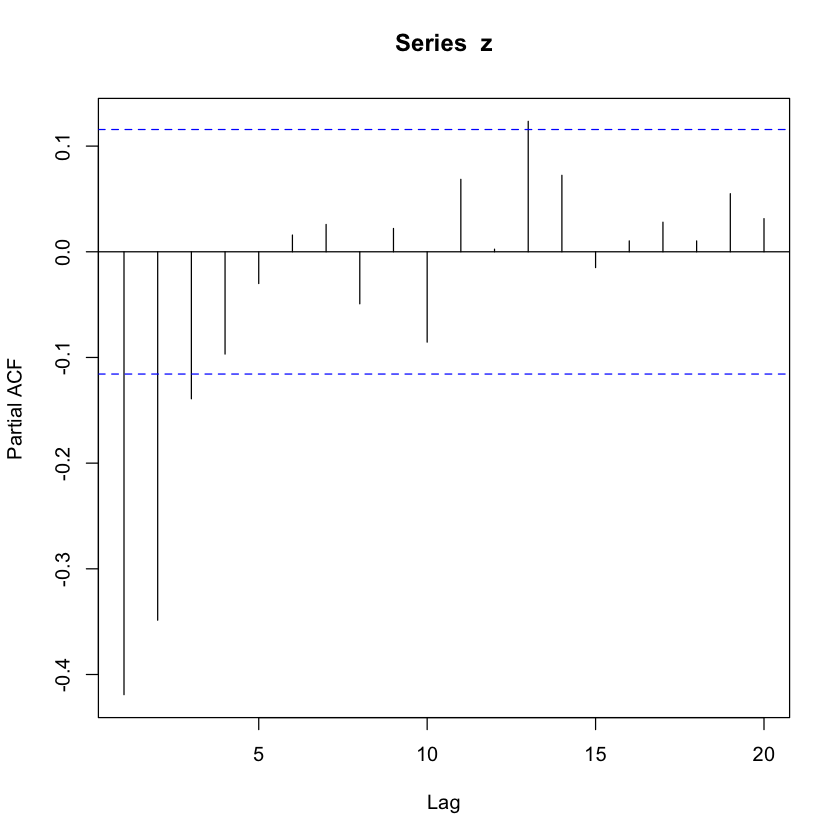

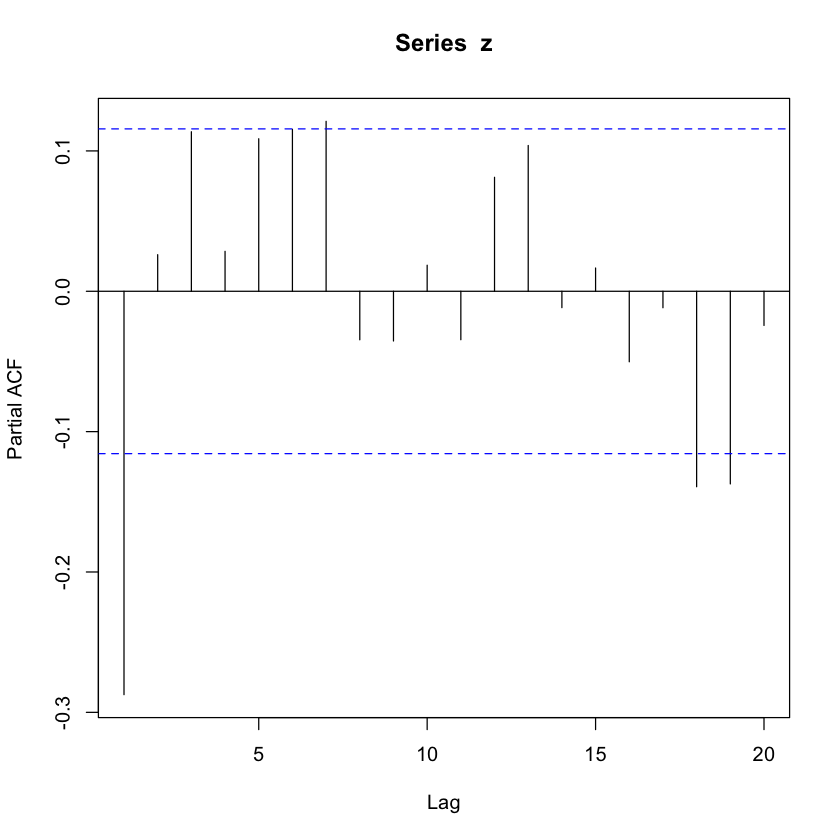

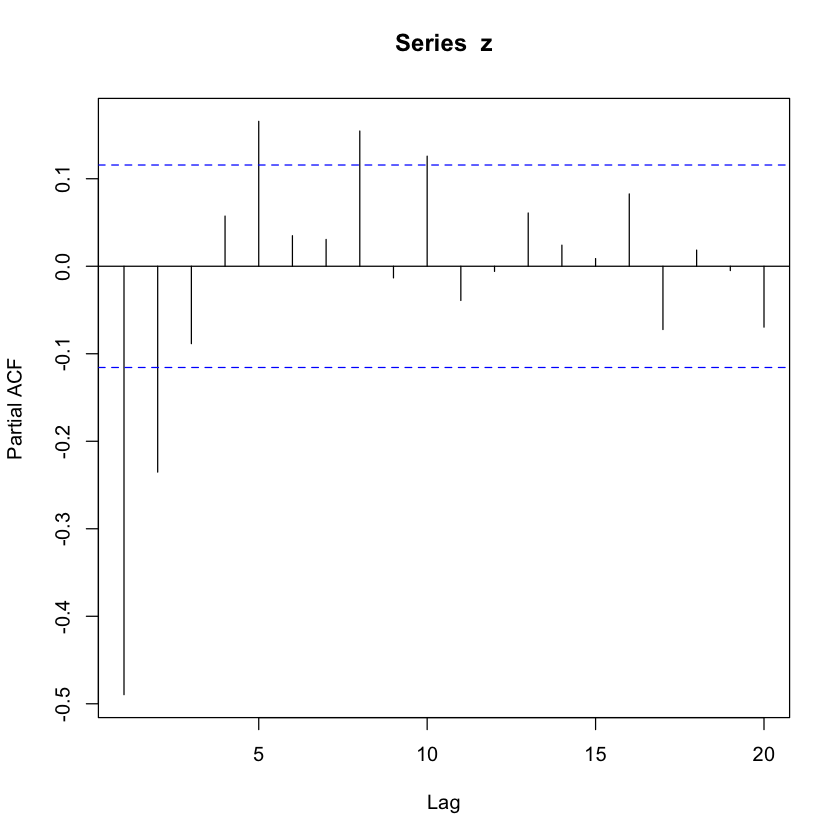

In [159]:
direct <- filter_cause(X,y)

In [160]:
# direct causes for Vehicle-Related Place
direct

[1] 3 1

In [155]:
# direct causes for Travel-Related Place
direct

[1] 2

In [150]:
# direct causes for Transportation
direct

[1] 3 2

In [145]:
# direct causes for Store, Market & Fair
direct

[1] 6 4 5 2 3

In [140]:
# direct causes for Smoke Shop
direct

[1] 1

In [135]:
# direct causes for School
direct

[1] 4 2 1

In [130]:
# direct causes for Restaurant
direct

[1] 2 3

In [125]:
# direct causes for Rest Area
direct

[1] 2

In [120]:
# direct causes for Residenc
direct

[1] 5 3

In [115]:
# direct causes for Place for Sports
direct

[1] 4 1

In [110]:
# direct causes for Outdoor Entertainment
direct

[1] 2

In [105]:
# direct causes for Office
direct

[1] 4 1

In [100]:
# direct causes for Neighborhood
direct

[1] 6 5

In [93]:
# direct causes for Medical-Related Place
direct

[1] 2 4

In [86]:
# direct causes for Indoor Entertainment
direct

[1] 2

In [ ]:
# direct causes for Hotel: factory

In [79]:
# direct causes for History, Museum & Arts
direct

[1] 4 3

In [72]:
# direct causes for General Education Place
direct

[1] 2 5 7

In [65]:
# direct causes for Food & Snack
direct

[1] 6 7 3 5

In [58]:
# direct causes for Factory
direct

[1] 2

In [51]:
# direct causes for eletronics
direct

[1] 3 4 2 5

In [44]:
# direct causes for convention center
direct

[1] 5 3

In [22]:
a <- cat("a","b")
a

a b

NULL

In [26]:
concat <- function(x,causes){
    for (i in causes){
        x <- paste(x,toString(i),sep = " ")
    }
    return (x)
}

In [27]:
b = c(1,2,3)
a = "haha"
concat(a,b)

[1] "haha 1 2 3"

In [43]:
pattern = "Hotel"
a <- "/Users/suhong/Desktop/UROP_Data/UROP/FourSquare/dataset_tsmc2014/"
    c <- ".csv"
    path <- paste(a,pattern,c,sep="")
    data <- read.csv(path)
    data <- data[1:287,-1]
    n <- dim(data)[2]
    X = data[1:287,-n]
    y = data[1:287,n]
    for (i in 1:n){
    p <- adf.test(data[1:287,i])$p.value
    if(p>0.05){
        print(pattern)
        print(i)
        print("oh no!")
    }
}
X
#     if(dim(X)[2]==1){direct=c(1)}
#     else{direct <- filter_cause(X,y)}
#     s <- concat(pattern,direct)
#     print(s)
#     result <- paste(result,s,sep=";")

Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”
Warning message in adf.test(data[1:287, i]):
“p-value smaller than printed p-value”


[1]  0 -1  0  0  1 -1  0  0  0  0  1  0 -1  0  0  0  0  0  0  0  0  0  0  0  0
 [26]  0  1  0 -1  0  0  0  0  0  0  0  0  1  0 -1  0  1  0 -1  0  1 -1  0  0  0
 [51]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1 -1  0  0  0  0
 [76]  0  0  0  0  1 -1  0  1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
[101]  0  0  0  0  0  0  0  0  1 -1  0  0  0  0  1 -1  0  2 -2  0  0  0  0  1 -1
[126]  1 -1  1  0  1  0 -2  0  2 -2  0  1 -1  0  1 -1  2  6 -5 -3  3 -2  3 -4  1
[151]  0  0  0  0 -1  2 -2  0  0  3 -3  1 -1  0  0  0  0  1 -1  1  0  0 -1  1  0
[176]  0 -1  0  1  0  1 -1 -1  1 -1  1 -1  2 -1  0 -1  0  0  0  0  0  0  0  0  0
[201]  0  0  0  1  0  0 -1  0  0  0  2 -1 -1  1  0 -1  0  0  2 -2  1 -1  0  1 -1
[226]  0  0  0  0  0  0  0  0  0  0  0  1  0 -1  1 -1  0  2 -2  1 -1  0  1 -1  0
[251]  0  0  0  1 -1  0  1  0 -1  2 -1 -1  0  0  0  0  2 -2  0  0  1  0 -1  0  0
[276]  0  1 -1  0  0  0  0  0  0  0  0  1

In [41]:
head(data)

X Factory Hotel
1 0  0       0   
2 1 -1       3   
3 2  0      -3   
4 3  0       7   
5 4  1      -6   
6 5 -1       5